# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas **durante el análisis:**

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



# 0.1 Aproximación

*Los precios de venta pueden ser considerados en base a los ambientes que tenga, metros totales, metros cuadrados cubiertos, la zona donde esta ubicada, si es un barrio cerrado, si se pagan expensas o no en el caso de ser un edificio o complejo. **


aunque se podría considerar tambien por los años de la propiedad? *segun eso se pagan mas o menos impuestos ej de rentas, y municipales. las zonas aledañas tambien pueden ser consideradas? por ejemplo, si está mas cerca o no del centro, en el caso de bsas a cuantos km de la capital por ejemplo, no se si se podria considerar si esta mas cerca o no de un barrio inseguro si influye en algo el precio. **

0. Importa las librerías necesarias para trabajar en la consigna.

In [ ]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sea
import matplotlib.pyplot as plt

import gc 


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DataScience/SPRINT 1 /DATOS.csv')


## 1.1 Análisis exploratorio

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
print('Cuantas filas y columnas tiene:')
data.shape 

Cuantas filas y columnas tiene:


(146660, 19)

In [ ]:
data.head()

start_date    end_date  ... property_type  operation_type
0  2019-10-17  2019-12-23  ...  Departamento           Venta
1  2019-10-17  2019-11-21  ...            PH           Venta
2  2019-10-17  2019-11-01  ...            PH           Venta
3  2019-10-17  2019-12-23  ...            PH           Venta
4  2019-10-17  2020-03-11  ...            PH           Venta

[5 rows x 19 columns]

In [ ]:
import pandas as pd
data.size #cant de muestras
data #cant columnas y filas  ':'zona','13':'barrio',
#data.columns
data.rename(columns={'start_date':'entrada', 'end_date':'salida', 'created_on':'creado en', 'l1':'pais', 'l2':'zona', 'l3':'barrio'
     }, inplace = True )
data.head()   

entrada      salida  ... property_type  operation_type
0  2019-10-17  2019-12-23  ...  Departamento           Venta
1  2019-10-17  2019-11-21  ...            PH           Venta
2  2019-10-17  2019-11-01  ...            PH           Venta
3  2019-10-17  2019-12-23  ...            PH           Venta
4  2019-10-17  2020-03-11  ...            PH           Venta

[5 rows x 19 columns]

In [ ]:
data.drop(columns=['entrada', 'salida','currency','creado en', 'pais'],inplace=True)
data.head()

lat        lon  ... property_type operation_type
0 -34.605880 -58.384949  ...  Departamento          Venta
1 -34.624056 -58.412110  ...            PH          Venta
2 -34.593569 -58.427474  ...            PH          Venta
3 -34.581294 -58.436754  ...            PH          Venta
4 -34.914194 -57.938219  ...            PH          Venta

[5 rows x 14 columns]

## 1.1.1 Limpieza DataFrame

Empiezo con la limpieza del dataframe , eliminando las columnas que no voy a utilizar y lo guardo. Elimino el pais, porque se sabe que son todos en Argentina, el currency porque todos los precios son en dolares, y el resto de las otras entradas porque considero que no son relevantes. 

In [ ]:
data[data['operation_type']== 'Alquiler']


Empty DataFrame
Columns: [lat, lon, zona, barrio, rooms, bedrooms, bathrooms, surface_total, surface_covered, price, title, description, property_type, operation_type]
Index: []

Elimino la columna de operation_type porque todas las operaciones son para venta. Lo mismo para el precio porque todos los valores son en dólares. Y le cambio los nombres que faltan.

In [ ]:
data.drop(columns=['operation_type'],inplace=True)
data.head()

lat  ...  property_type
0 -34.605880  ...   Departamento
1 -34.624056  ...             PH
2 -34.593569  ...             PH
3 -34.581294  ...             PH
4 -34.914194  ...             PH

[5 rows x 13 columns]

In [ ]:
data.rename(columns={'surface_total':'sup_tot', 'surface_covered': 'sup_cub','property_type':'tipo', 'l1':'pais','l2':'zona','l3':'barrio'
     }, inplace = True )
data.head()

lat  ...          tipo
0 -34.605880  ...  Departamento
1 -34.624056  ...            PH
2 -34.593569  ...            PH
3 -34.581294  ...            PH
4 -34.914194  ...            PH

[5 rows x 13 columns]

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
#cuantos tipos de prop. publicados, 
print('Nombres de las columnas:')
print()
pd.unique(data['tipo']) 

Nombres de las columnas:



array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [ ]:
print('Cant. total valores x columna segun tipo de prop.')
data.groupby(['tipo']).size().reset_index(name='total_prop')

Cant. total valores x columna segun tipo de prop.


tipo  total_prop
0             Casa       21521
1    Casa de campo         322
2          Cochera         259
3     Departamento      107326
4         Depósito         265
5  Local comercial         325
6             Lote        1312
7          Oficina         658
8             Otro         374
9               PH       14298

La cantidad de valores nulos o faltantes por columna indican la cantidad total de instancias(casos) de valores nulos por variable. Es decir, la cantidad de casos por variables de los cuales no hay registro. Generalmente representado por ``NaN``. Así como observamos a continuación, las variables dentro de las cuales hay valores nulos son la latitud = ``lat``, longitud=``lon``, la superficie total = ``sup_tot`` y la superficie cubierta = ``sup_cub``. 

In [ ]:
print('Cant. valores nulos/faltantes por columna:')
print()
df=data.isna().sum()
df

Cant. valores nulos/faltantes por columna:



lat             9925
lon             9959
zona               0
barrio             0
rooms              0
bedrooms           0
bathrooms       5957
sup_tot        20527
sup_cub        21614
price              0
title              0
description        0
tipo               0
dtype: int64

Comenzamos con una primera aproximación a nivel general de los datos, en este caso observando las medidas estándares para el análisis descriptivo. Comenzamos con la función ``.describe()``. ESto nos muestra los la cantidad de valores o ``features`` por columna, en ``count``; el promedio para cada columna en ``mean``, la Desviación Estandar en ``std``, los valores mínimos y máximos en ``min`` y ``max`` respectivamente. Y los cuartiles Q1=``25%``, Q2=``50%`` y Q3=``75%``, el Q4 que representaría el ``100%`` de los casos. 


De lo siguiente se puede observar que el 75% o menos se ubica en el caso de los rooms de 4 o menos habitaciones, en el caso de los bedrooms de 3 dormitorios o menos, los baños de 2 o menos y las superficies de 140m2 totales o menos y las cubiertas de 108m2 o menos. 

Lo que significa que los valores extremos que se encuentran por encima de estos valores podrían significar que son outliers, que podrian ser producto de algun tipo de error de tipeo.
En la sección de histogramas veremos sus distribuciones.

In [ ]:
data.describe()

lat            lon  ...        sup_cub         price
count  136735.000000  136701.000000  ...  125046.000000  1.466600e+05
mean      -34.604896     -58.465304  ...     112.818011  2.412211e+05
std         0.468428       0.486190  ...     916.857584  3.185195e+05
min       -35.318457    -180.000000  ...       1.000000  5.500000e+03
25%       -34.627667     -58.504012  ...      47.000000  1.110000e+05
50%       -34.600943     -58.443262  ...      68.000000  1.660000e+05
75%       -34.574600     -58.407586  ...     108.000000  2.650000e+05
max        85.051129     -57.805832  ...  126062.000000  3.243423e+07

[8 rows x 8 columns]

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Cantidad de instancias/casos almacenados en el dataset = ``total_prop`` según tipo de propiedad = ``tipo``.

In [ ]:
#cuantas tipos de prop. hay, cuantas instancias hay de cada uno
data.groupby(['tipo']).size().reset_index(name='total_prop')


tipo  total_prop
0             Casa       21521
1    Casa de campo         322
2          Cochera         259
3     Departamento      107326
4         Depósito         265
5  Local comercial         325
6             Lote        1312
7          Oficina         658
8             Otro         374
9               PH       14298

A continuación se observa lo descrito anteriormente de manera gráfica. Para esto utilice un gráfico de barras ``sea.countplot``, evidencia la cantidad de instancias publicadas según el tipo de propiedad. Se observa entonces que la mayor cantidad de tipos de propiedad publicadas son en primer lugar los ``Departamentos``, seguido por las ``Casas`` y los ``PH``.

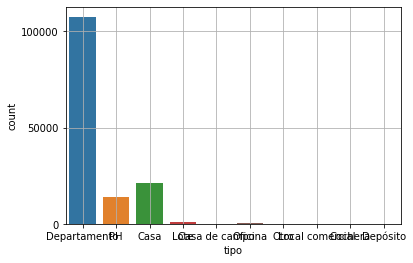

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sea
import matplotlib.pyplot as plt

sea.countplot(data = data, x = 'tipo')
sea.set_context("notebook", font_scale=2, rc={"lines.linewidth":2.5})
plt.rcParams['figure.figsize']=25,50
plt.grid(True)

A continuación observamos las distribuciones del precio según el tipo de propiedad.

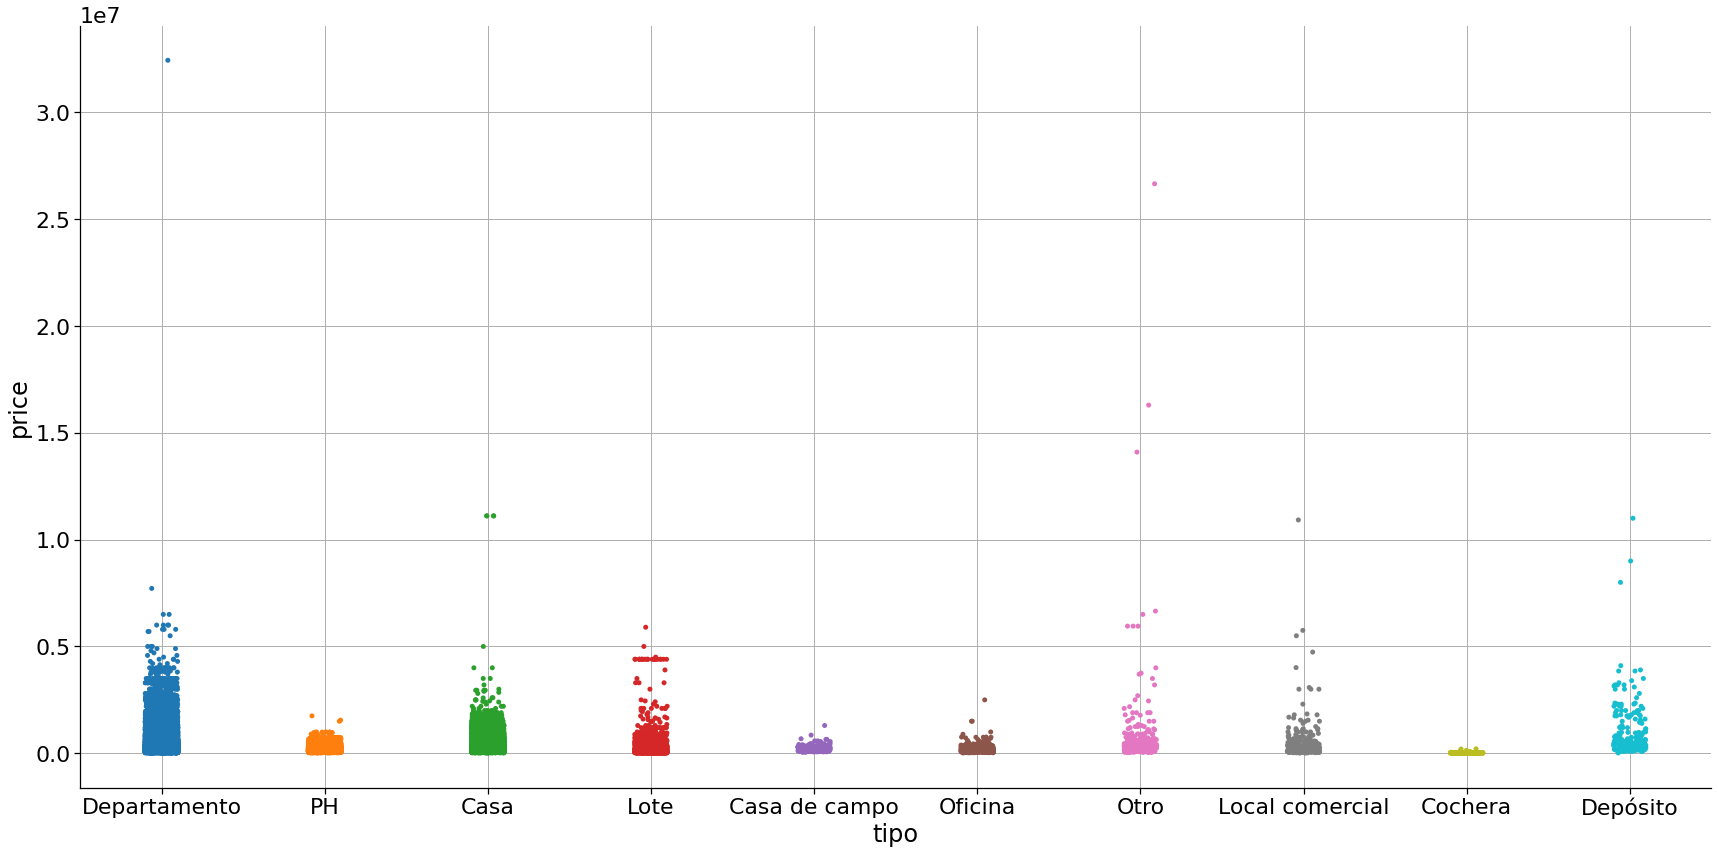

In [ ]:
sea.catplot(x='tipo', y='price', data=data, height =12, aspect=2) 
sea.set_context("notebook", font_scale=2, rc={"lines.linewidth":2.5})
plt.grid(True)
plt.rcParams['figure.figsize']=50,50


###corregir precio limite eje y 

Hecho en un grafico de Seaborn, se observa lo mismo que en el caso de arriba. En donde la mayor cantidad de propiedades publicadas, a nivel general en el dataset son en primer lugar los departamentos, seguido de las casas, y por ultimo los penthouses. 

A su vez también se observa, en comparación los precios de los departamenos son los más altos en comparación a los PH, las Casas de Campo, y las Cocheras. Entre los de mayor precio se encuentran los Departamentos, los Lotes, los Depósitos y las Casas.

Si compararamos según el grupo de mayores propiedades publicadas (``Departamentos``, ``Casas`` y ``PH``), se observa que los precios de los Departamentos son de los más altos, seguido por las Casas y los PH.



A continuación se grafican boxplots para cada variable segun tipo de propiedad. Se observa para tener una primera aproximación de la cantidad de datos atípicos por variables(cuantitativas). No tomamos las variables de ``lat`` y ``lon`` por ser valores únicos y negativos.

<Figure size 28800x7200 with 0 Axes>

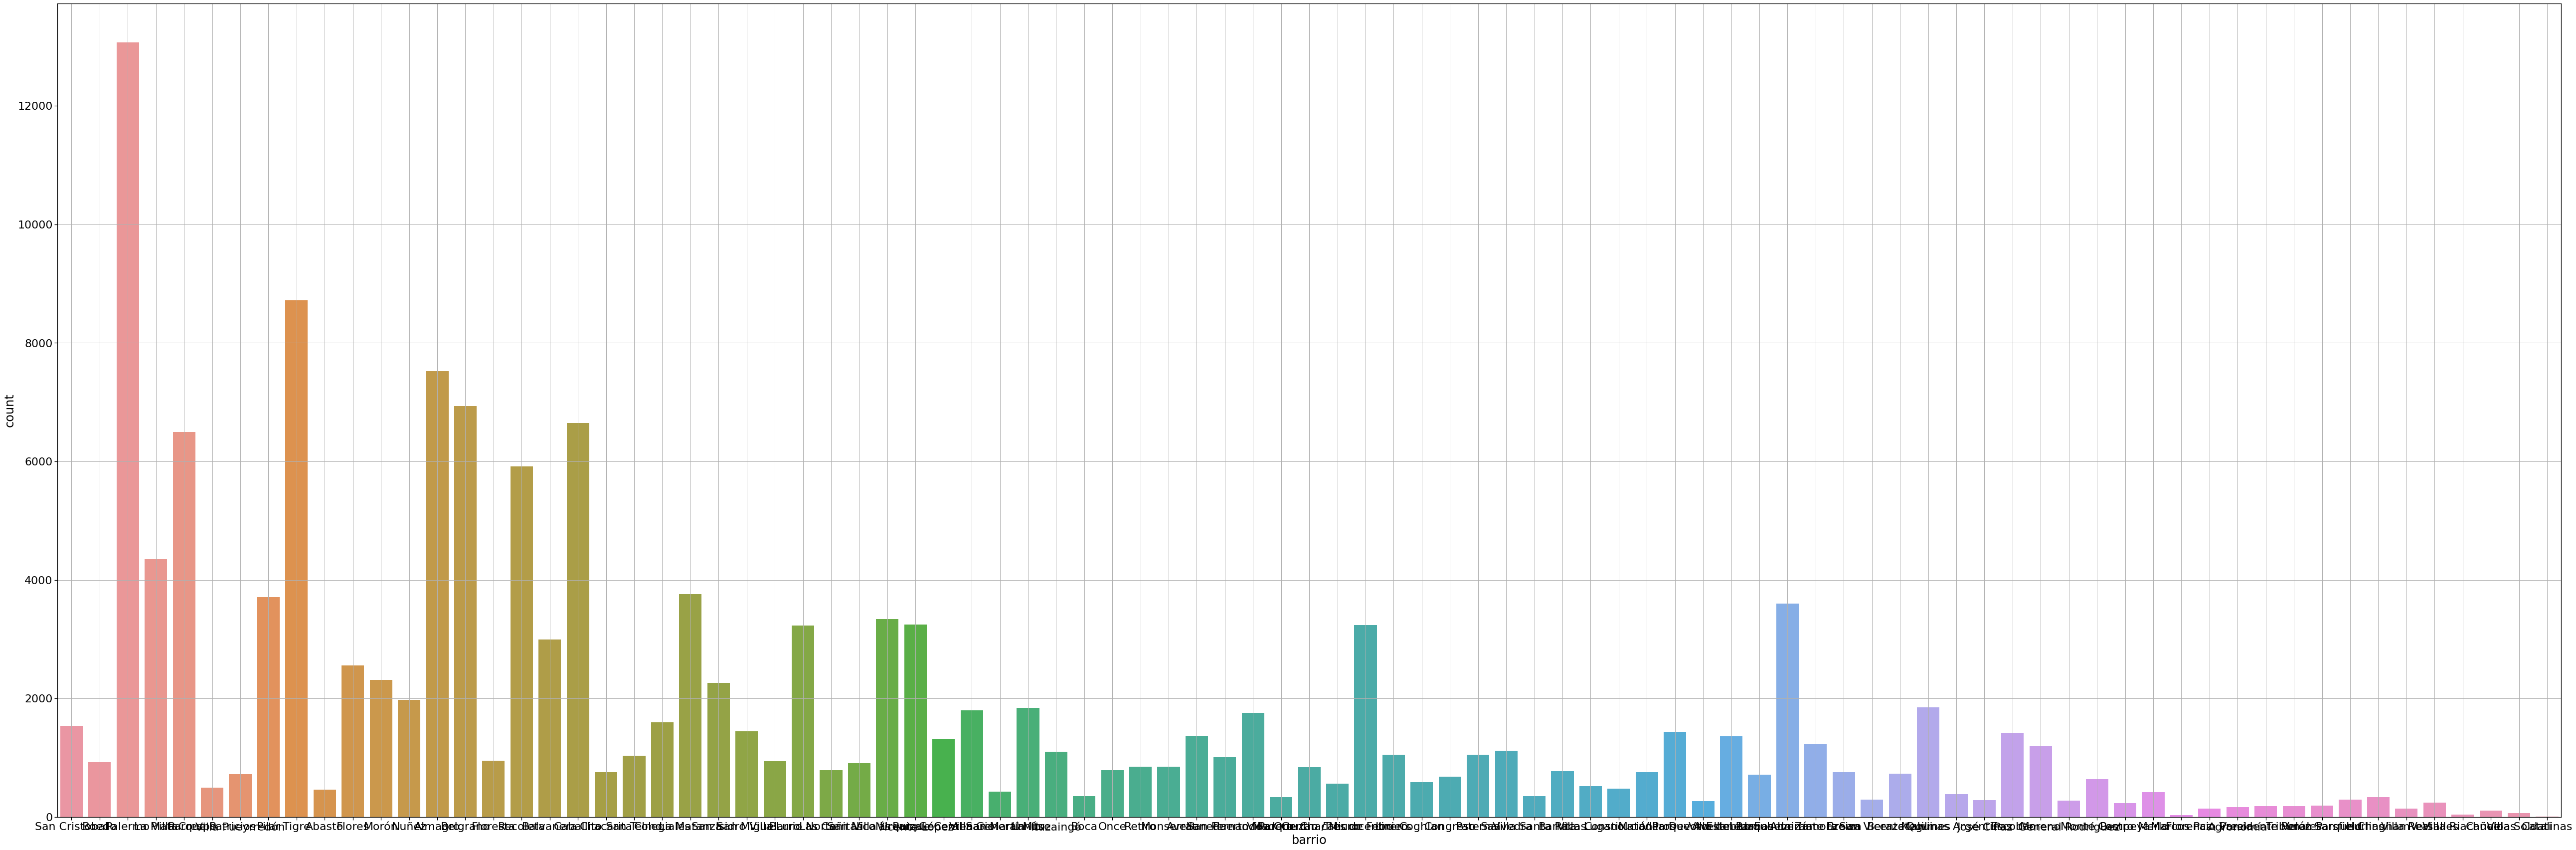

In [ ]:
plt.figure(figsize=(400,100))
plt.rcParams['figure.figsize']= 90,30
fig6,ax6=plt.subplots()
ax6 = sea.countplot(data = data, x = 'barrio')
ax6 = sea.set_context("notebook", font_scale=2, rc={"lines.linewidth":250})

plt.grid(True)

<Figure size 720x720 with 0 Axes>

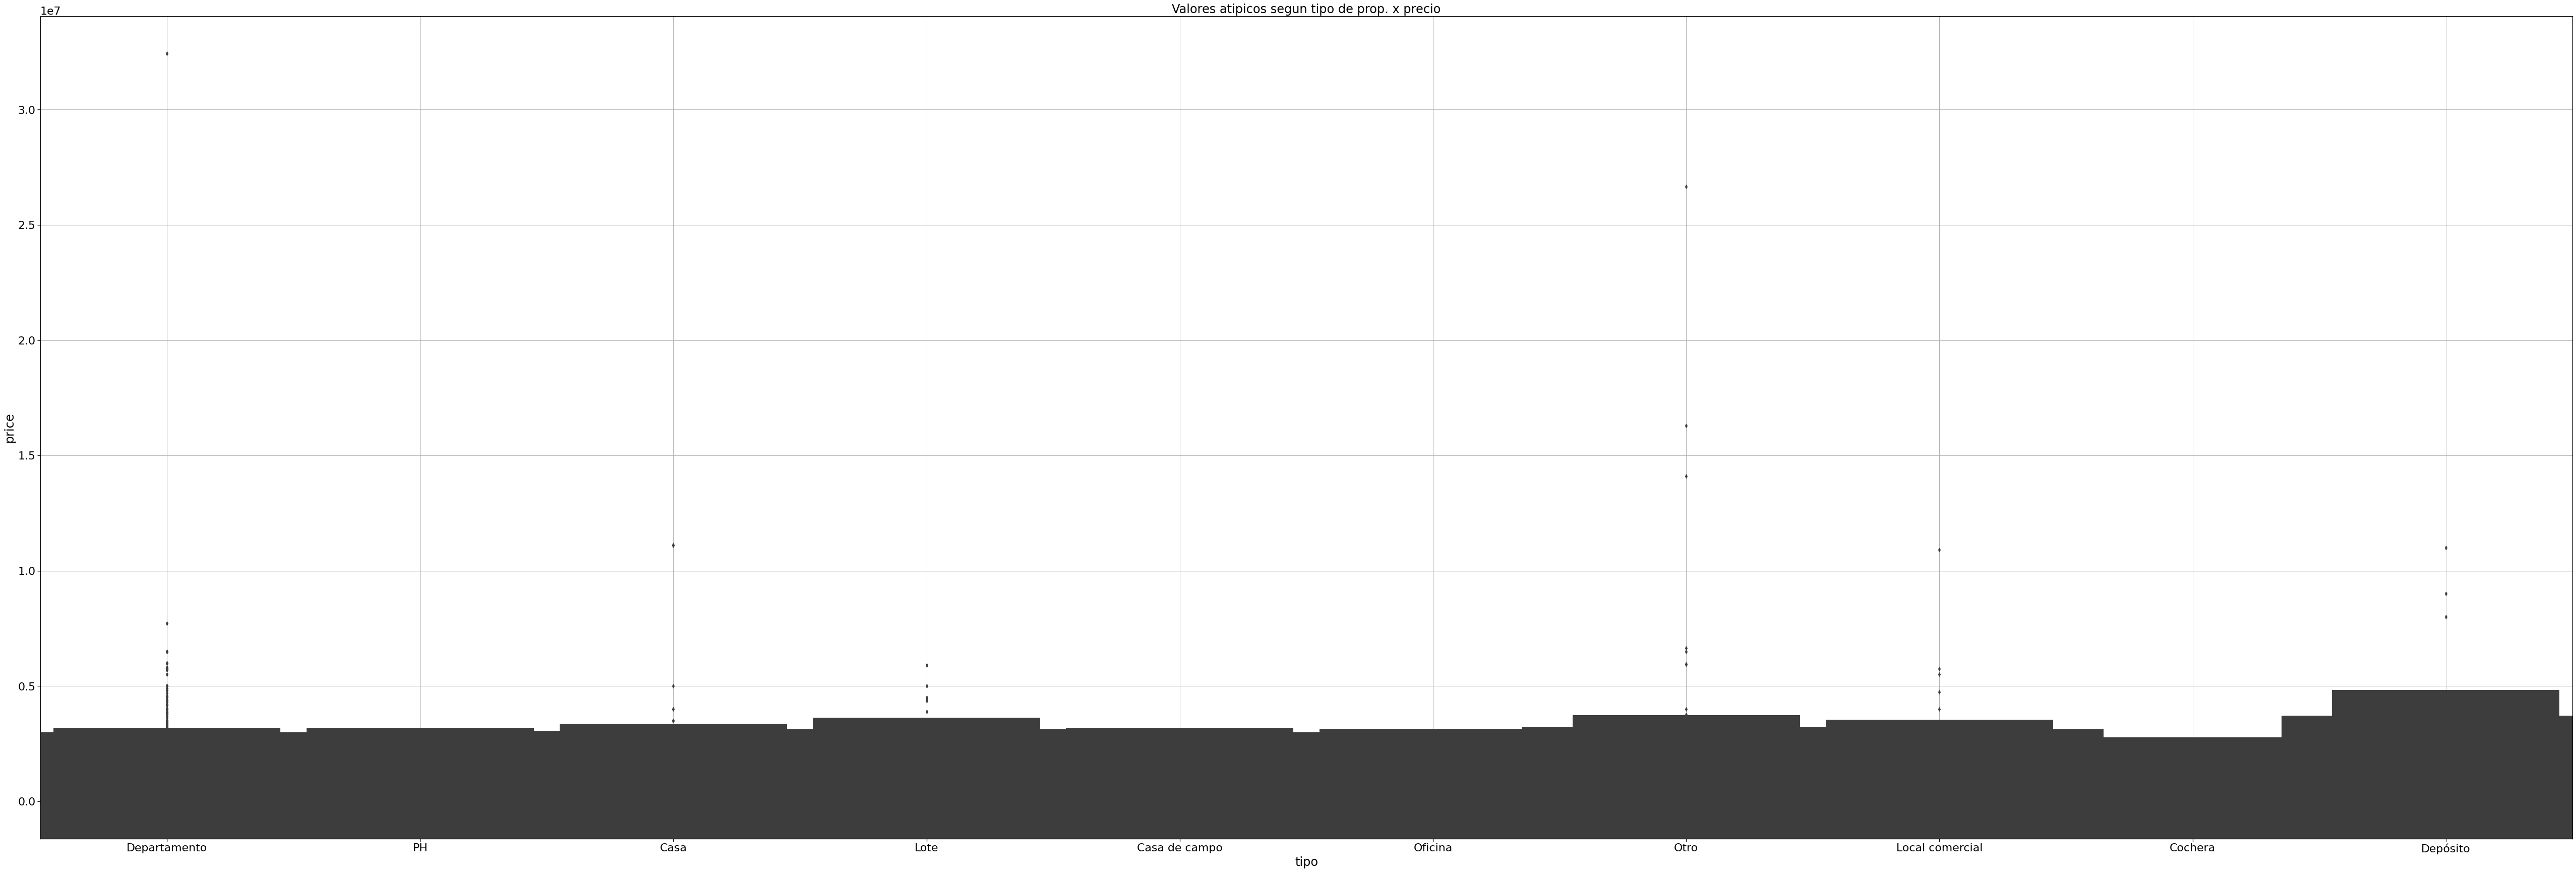

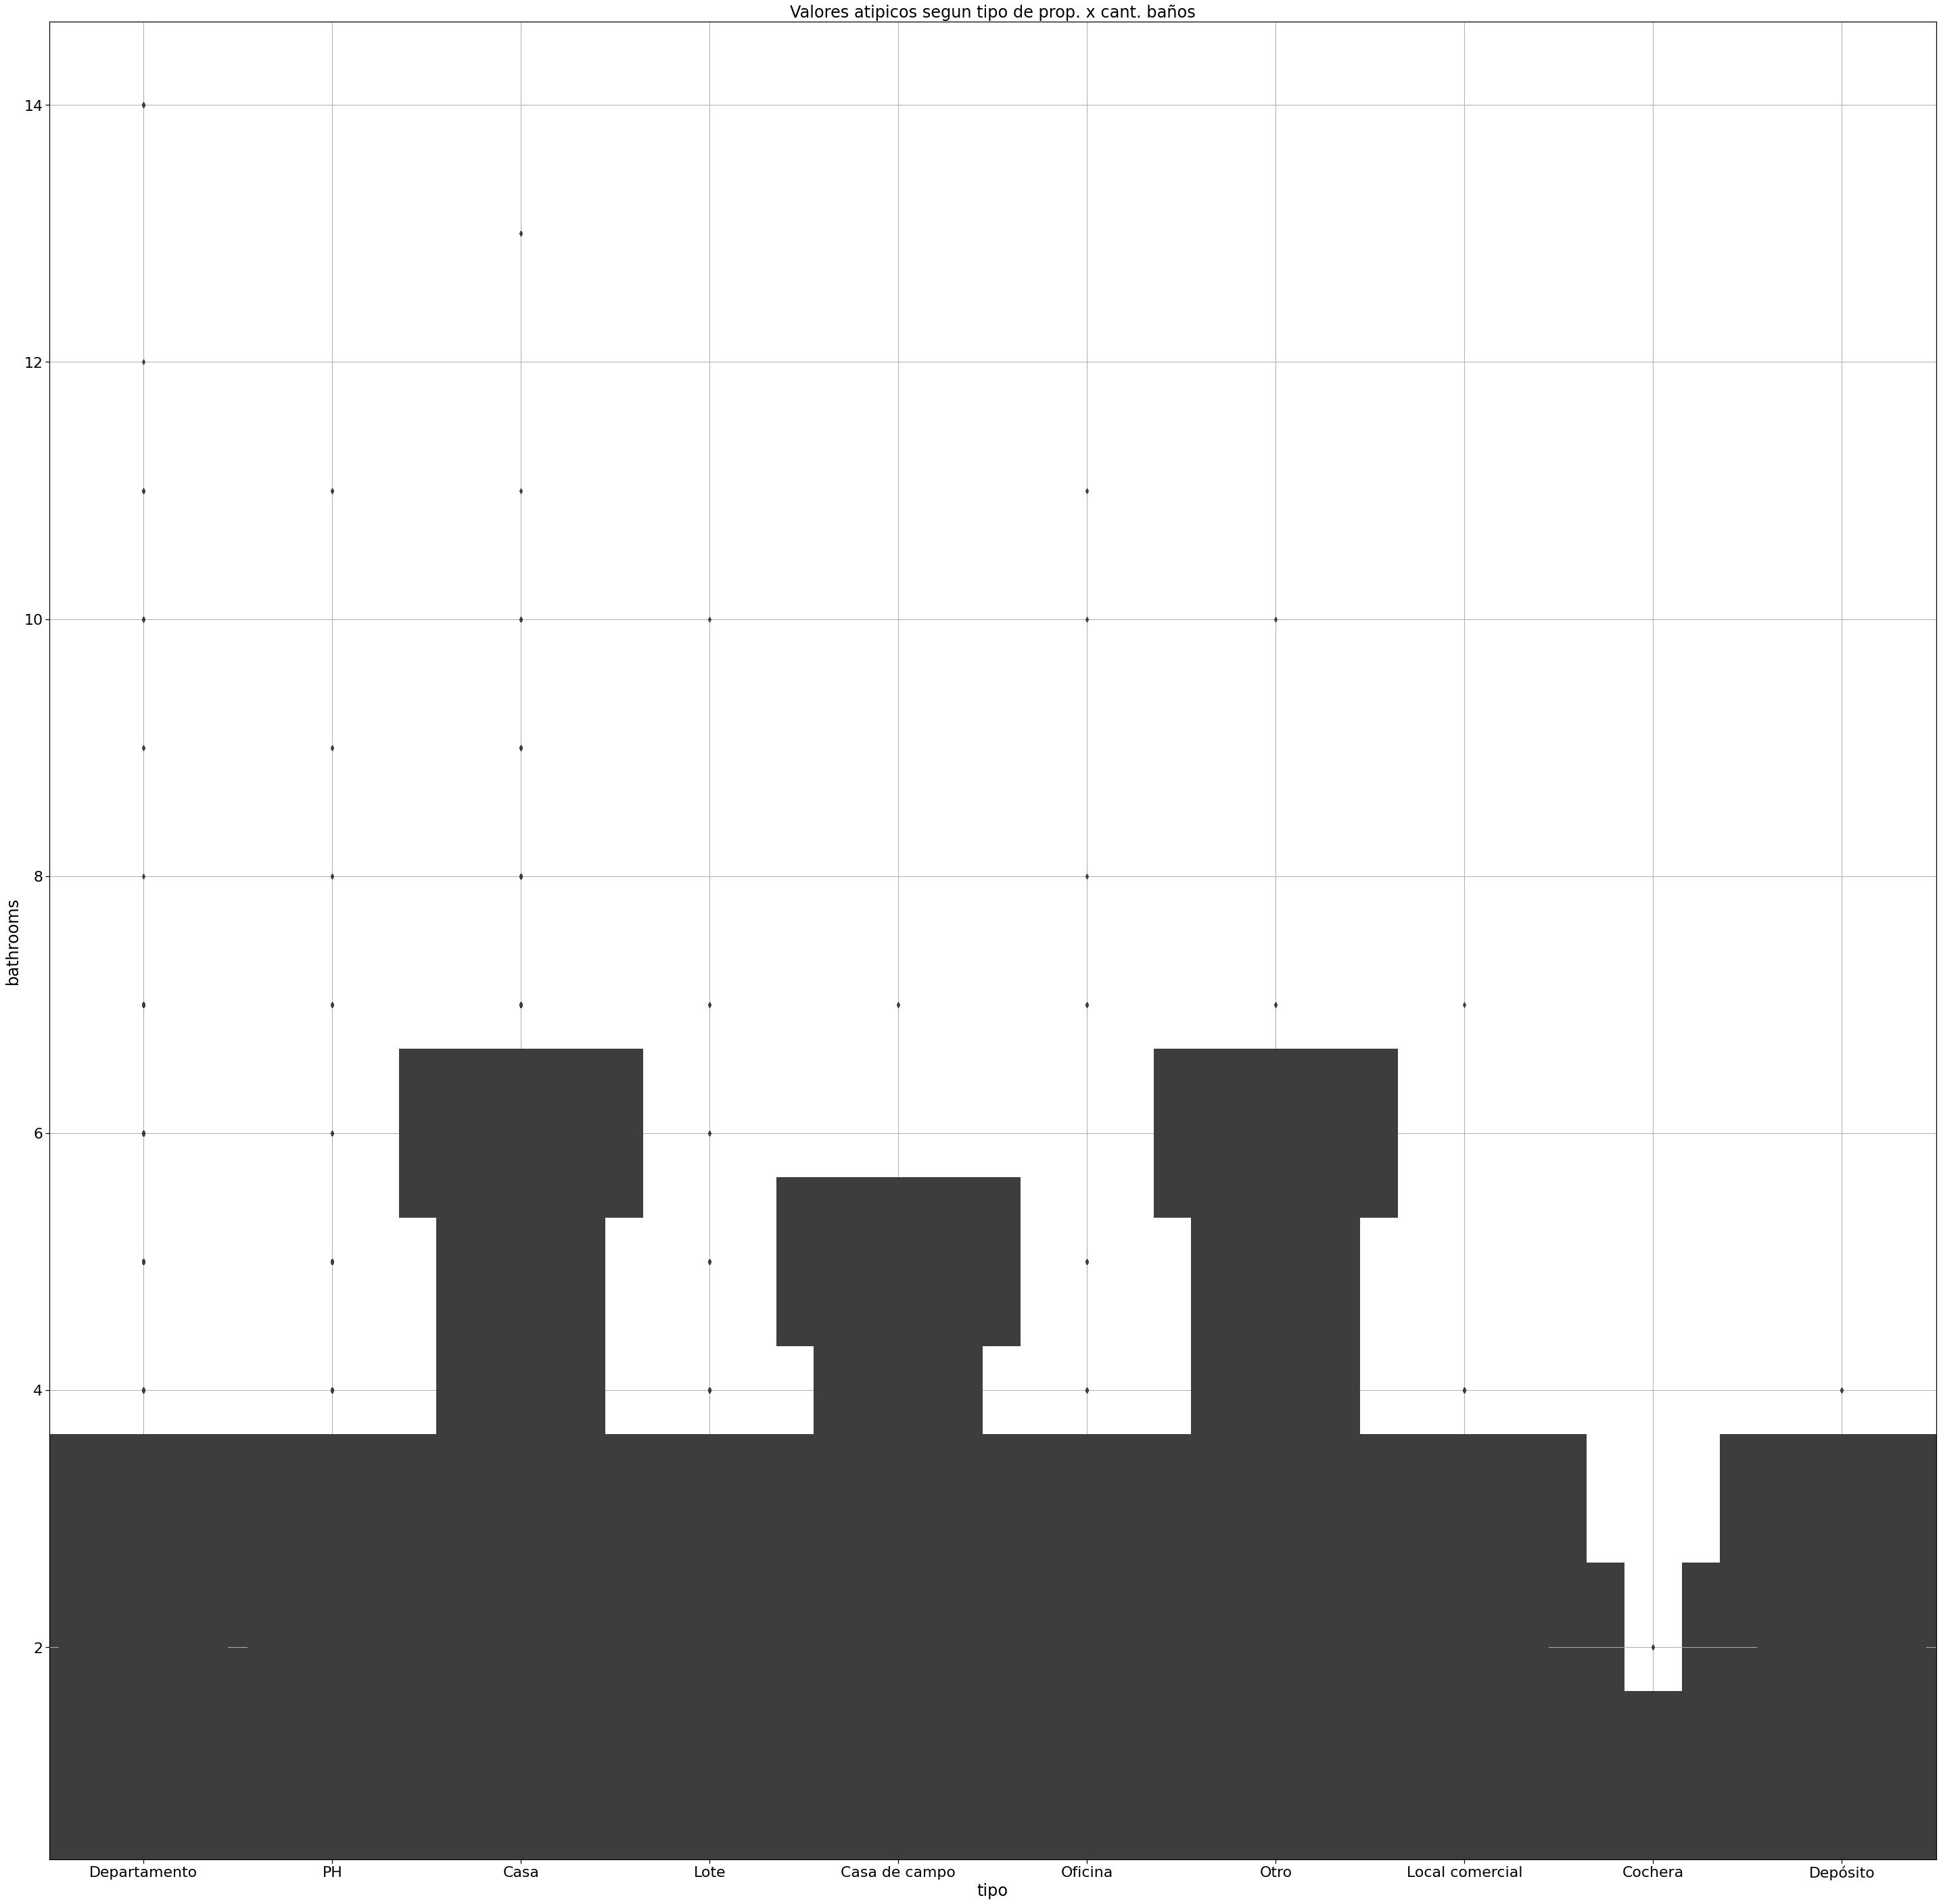

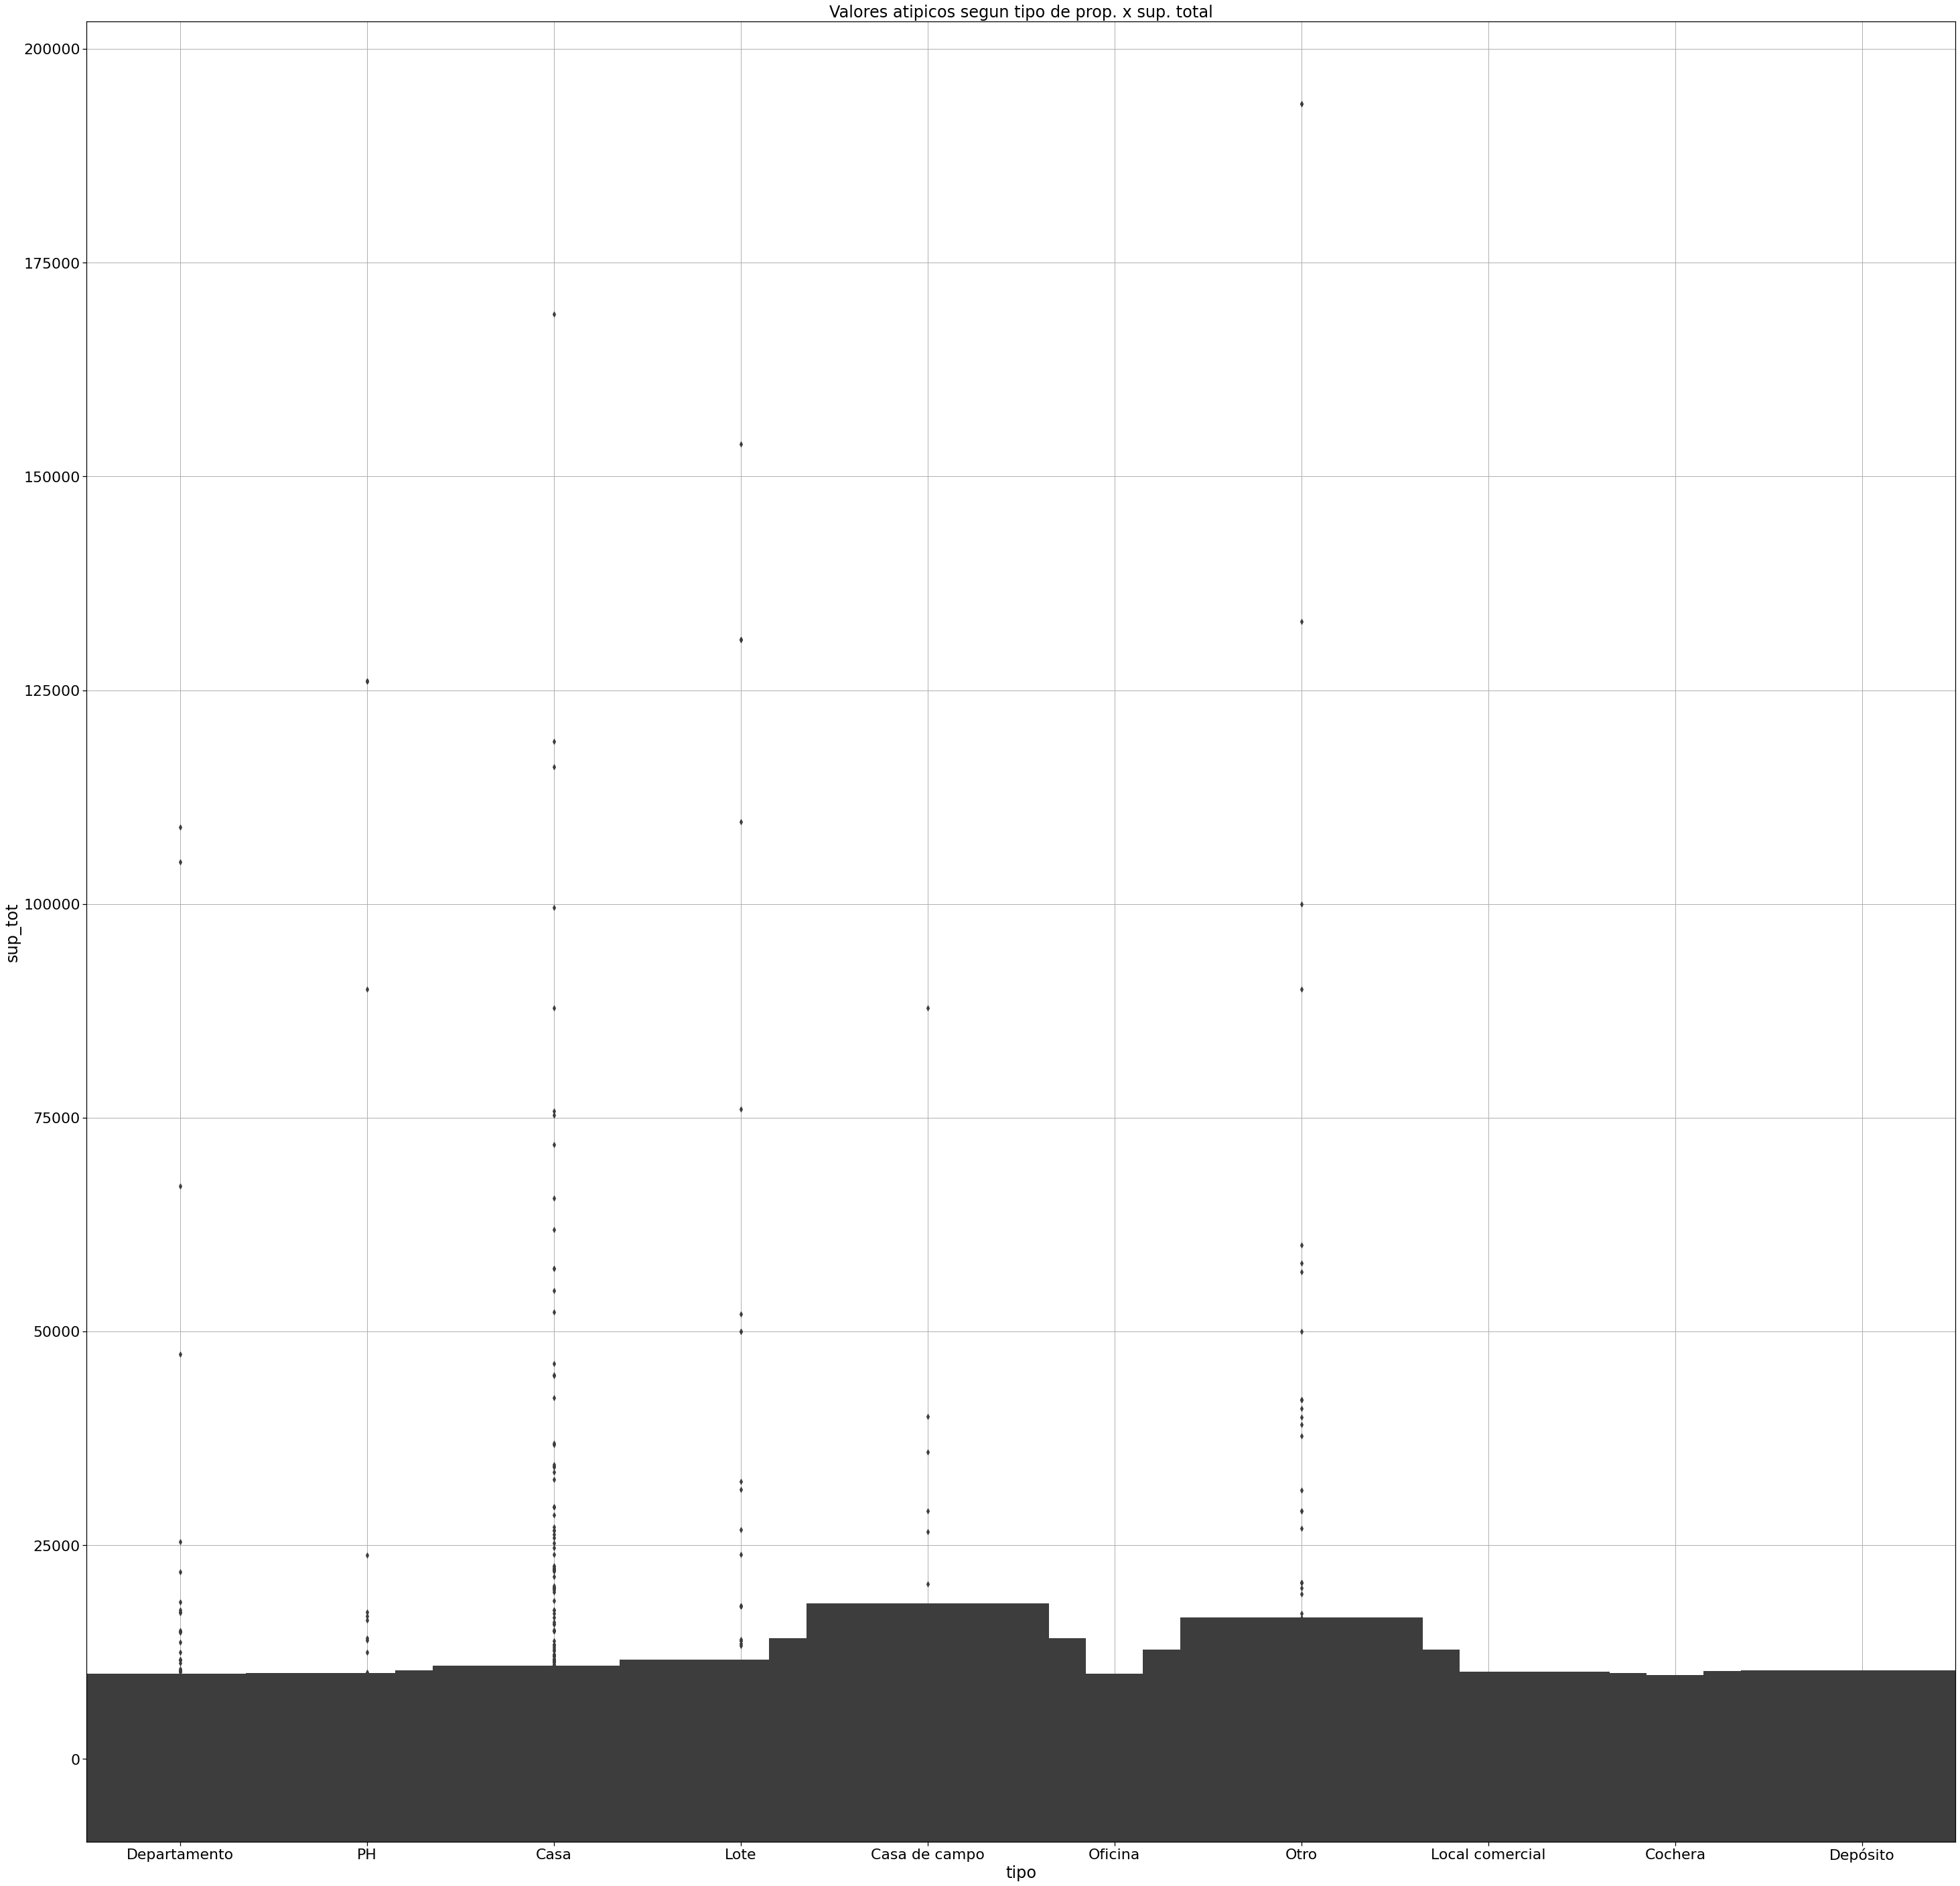

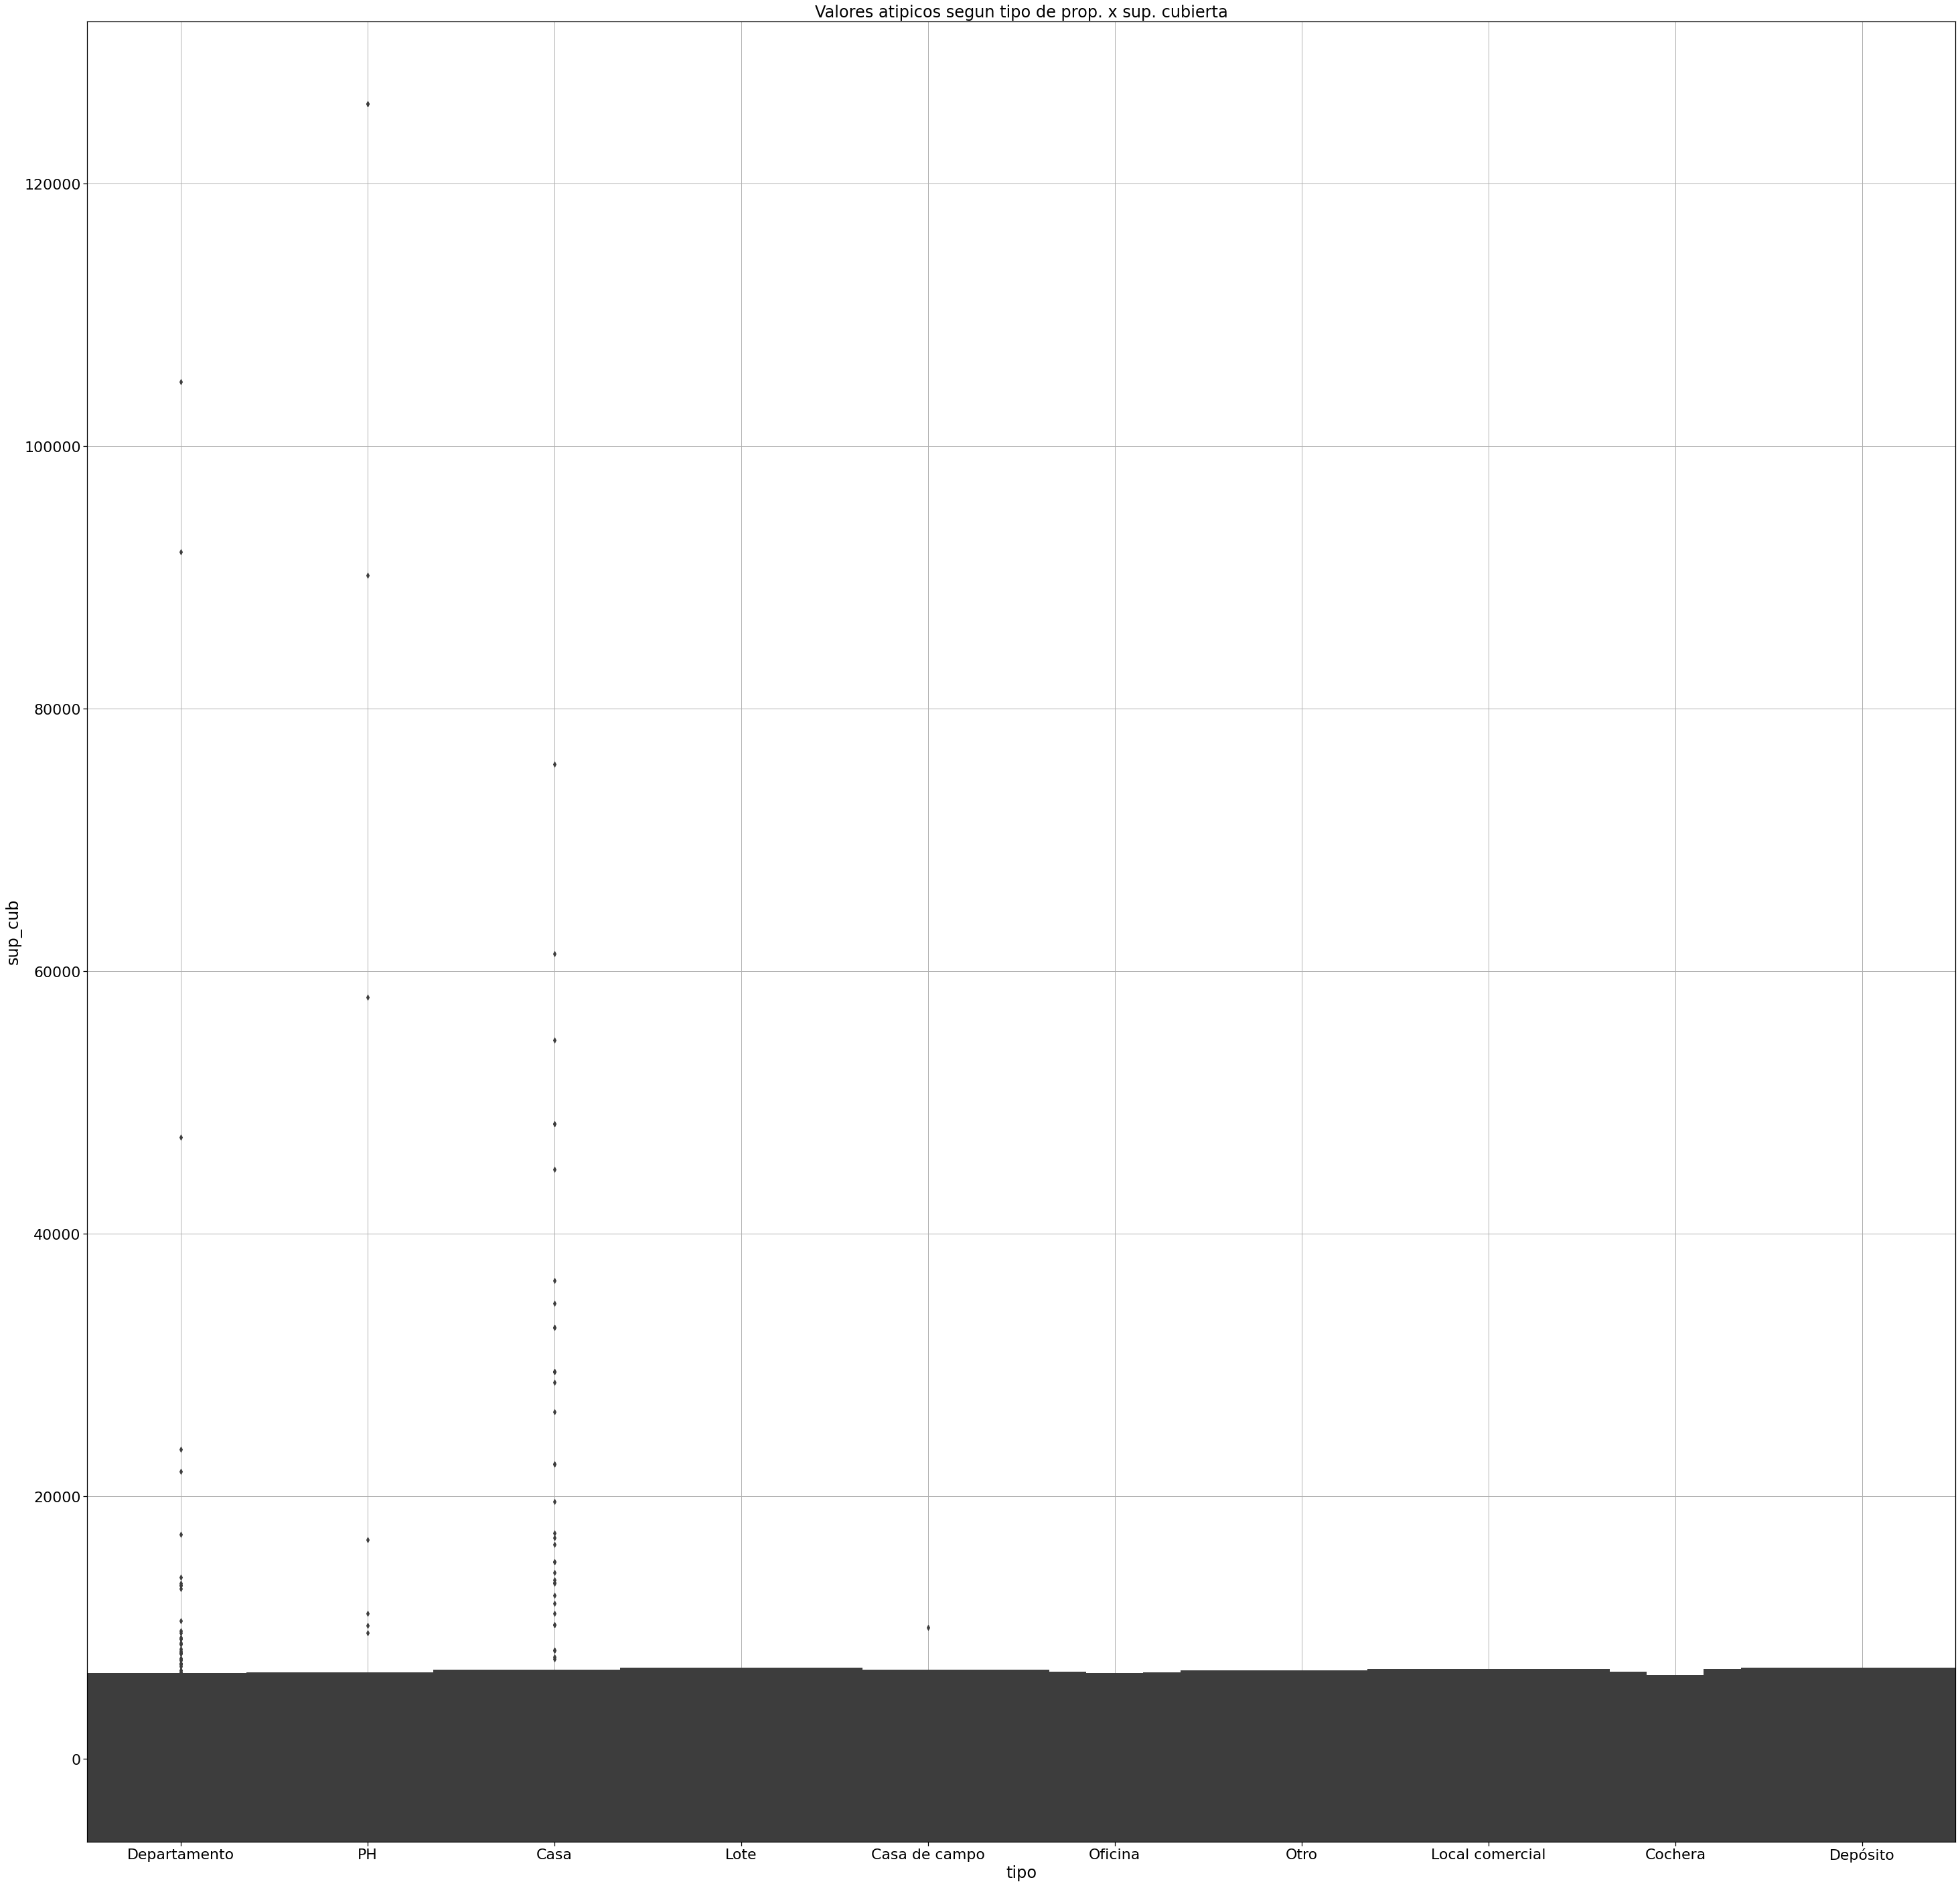

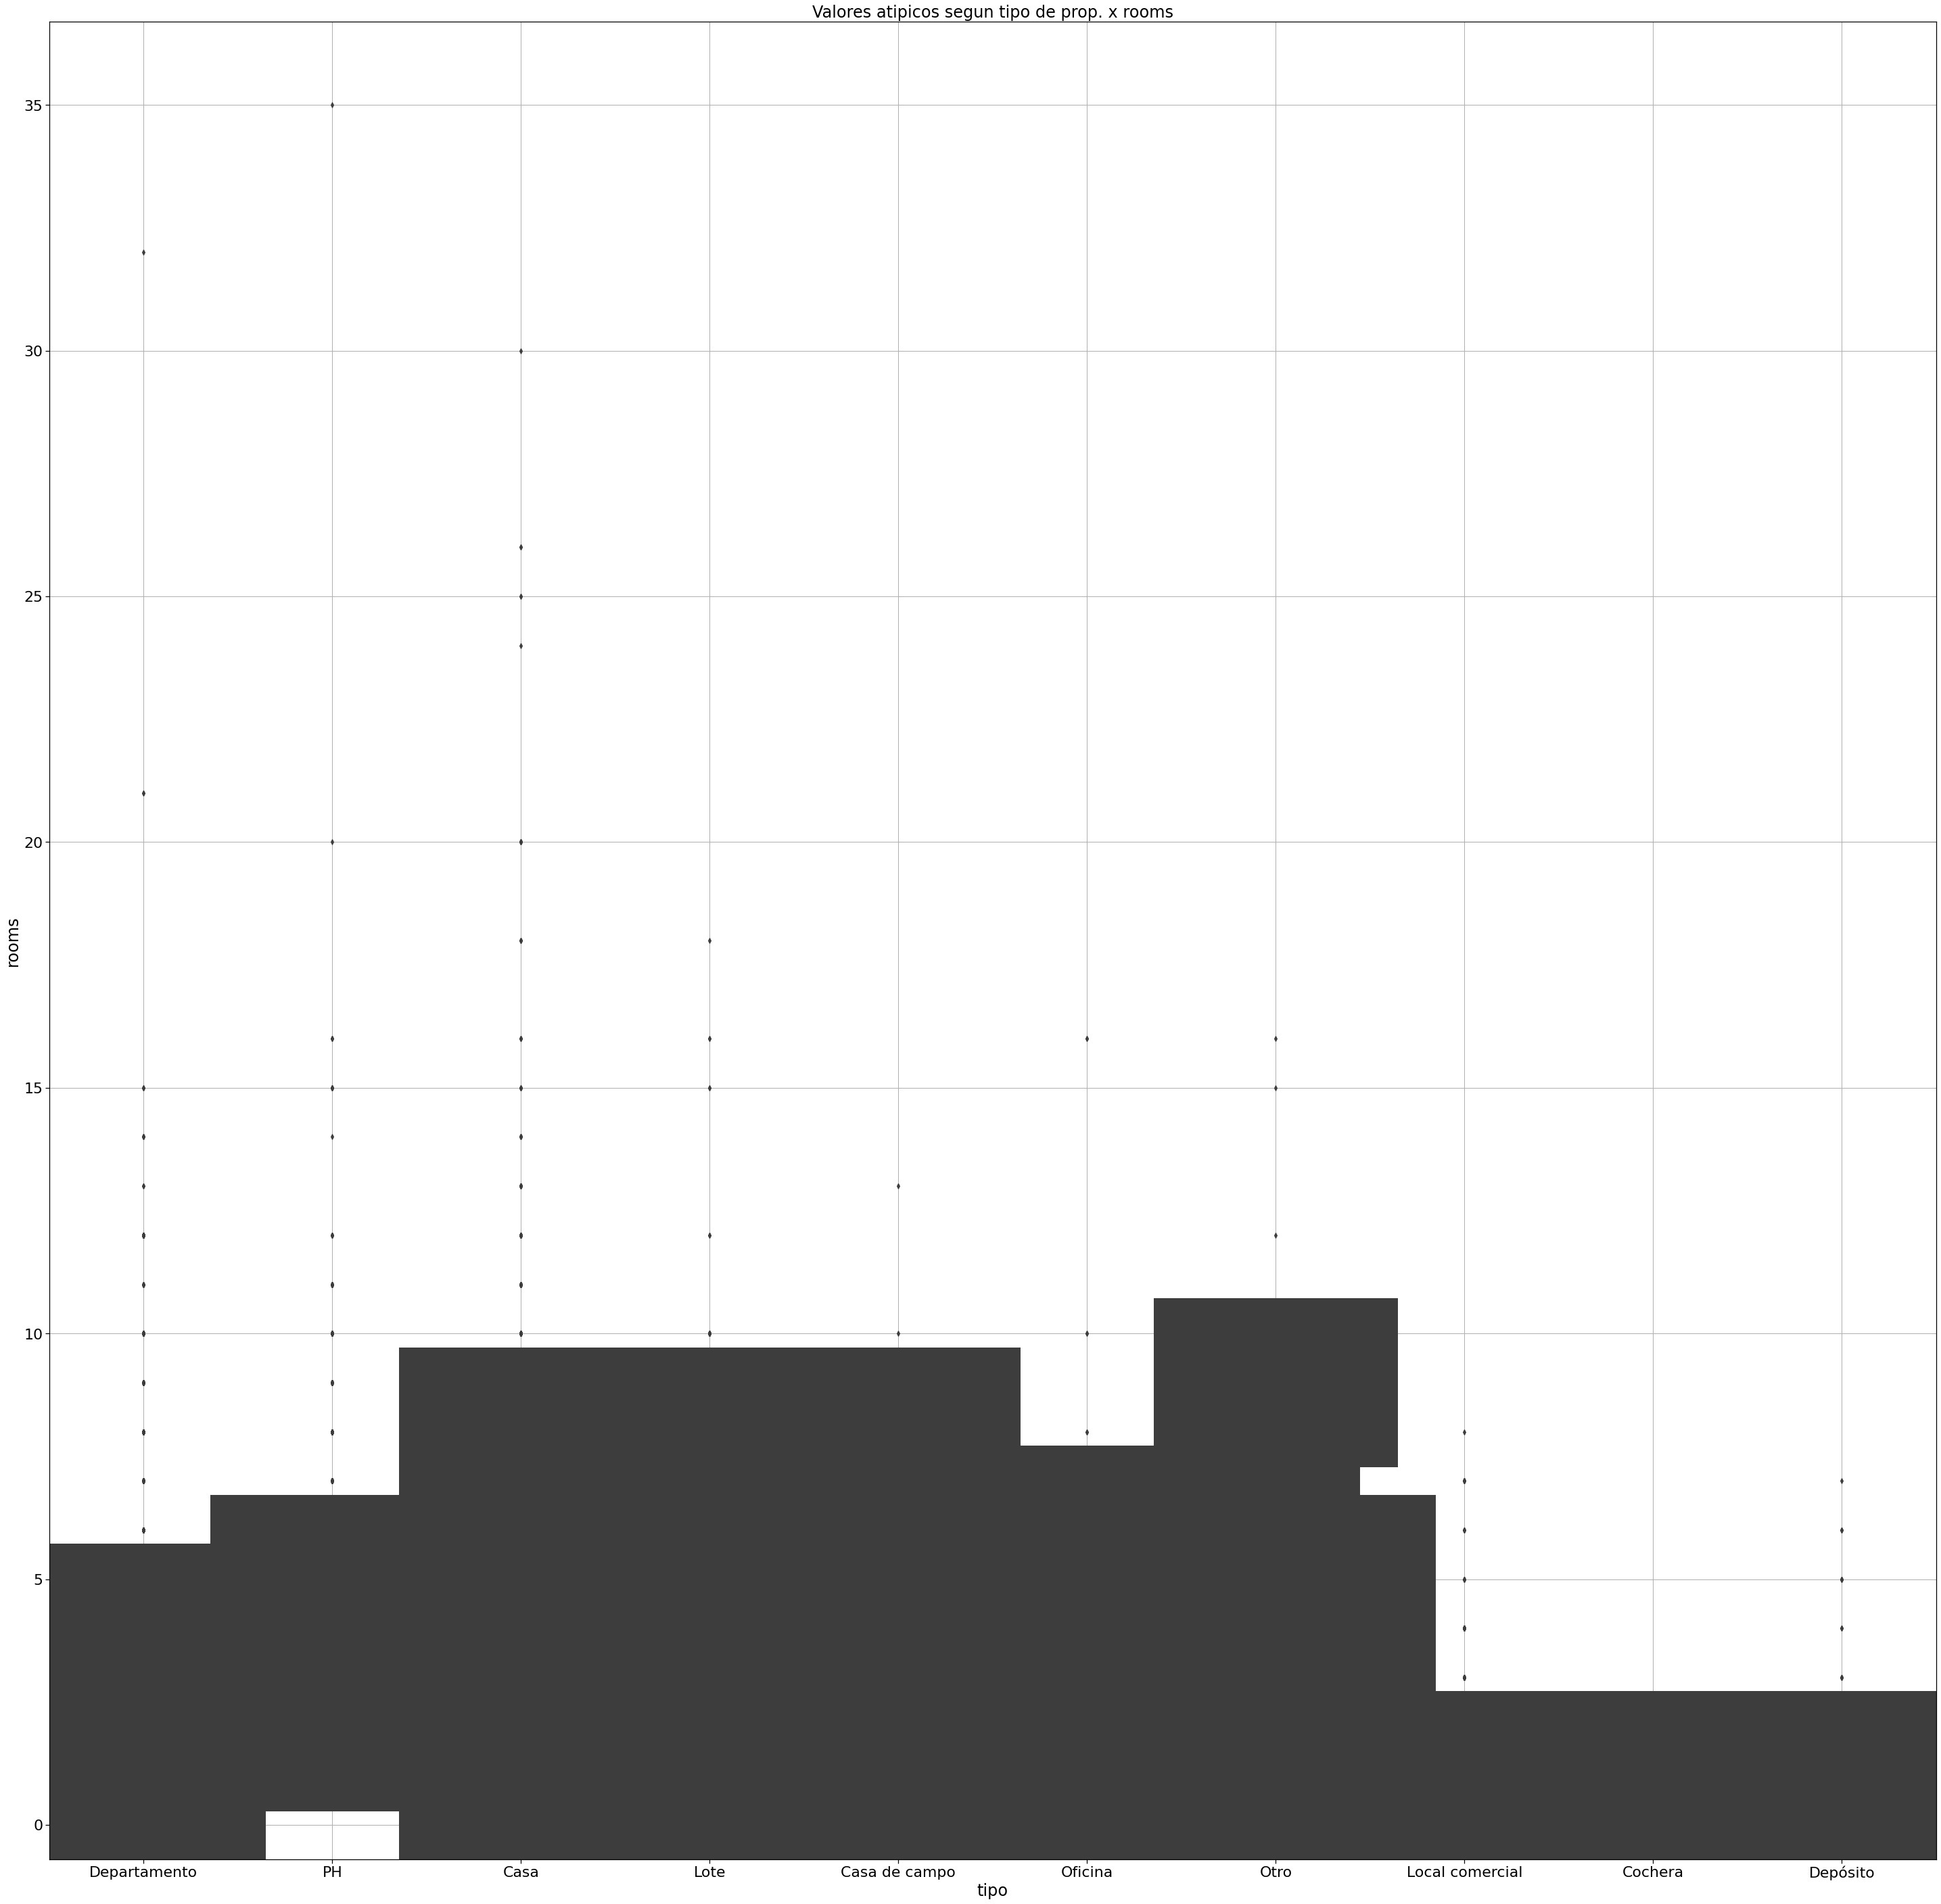

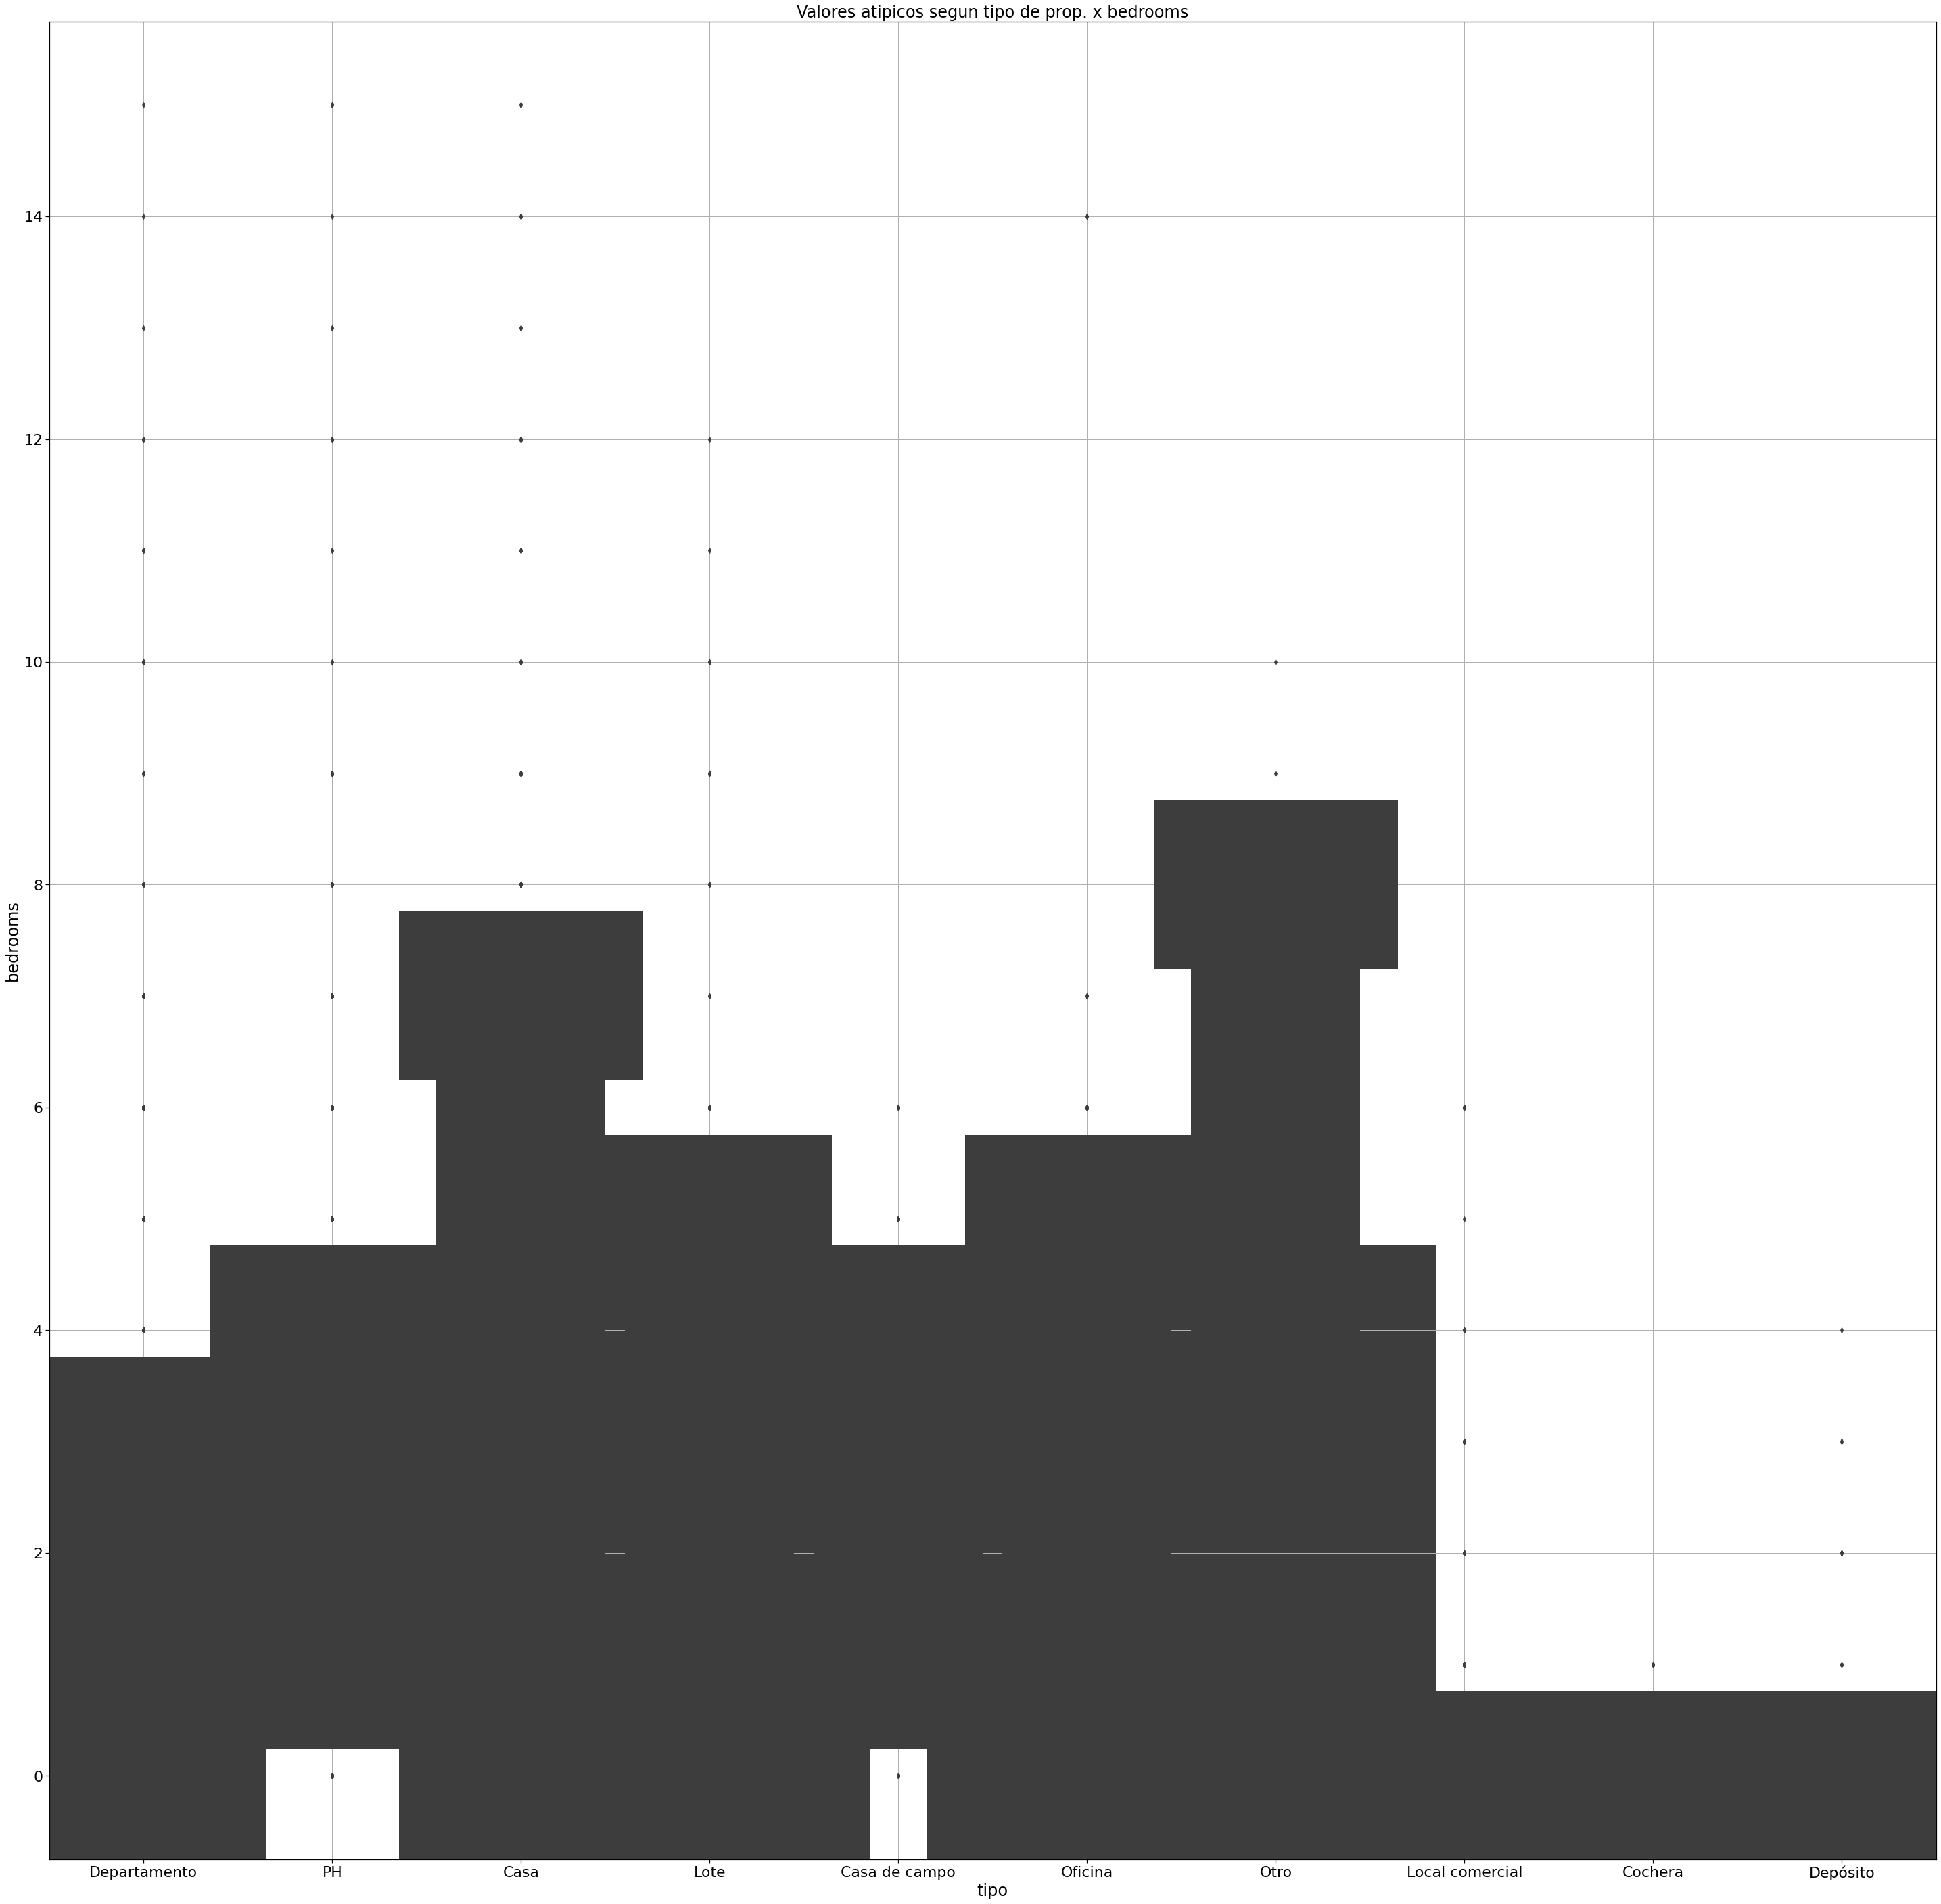

In [ ]:
import matplotlib.pyplot as plt


#boxplot tipo x price
plt.figure(figsize=(10,10))
fig1,ax1=plt.subplots()
ax1 = sea.boxplot(x='tipo', y='price', data=data)
ax1.set_title('Valores atipicos segun tipo de prop. x precio')
plt.rcParams['figure.figsize']=50,50
plt.grid(True)

#boxplot tipo x bathrooms
fig2,ax2=plt.subplots()
ax2 = sea.boxplot(x='tipo', y='bathrooms', data=data)
ax2.set_title('Valores atipicos segun tipo de prop. x cant. baños')
plt.rcParams['figure.figsize']=50,50
plt.grid(True)

#boxplot tipo x sup_tot
fig3,ax3=plt.subplots()
ax3.set_title('Valores atipicos segun tipo de prop. x sup. total')
ax = sea.boxplot(x='tipo', y='sup_tot', data=data)
plt.rcParams['figure.figsize']=50,50
plt.grid(True)

#boxplot tipo x sup_cub
fig4,ax4=plt.subplots()
ax4.set_title('Valores atipicos segun tipo de prop. x sup. cubierta')
ax = sea.boxplot(x='tipo', y='sup_cub', data=data)
plt.rcParams['figure.figsize']=50,50
plt.grid(True)

#boxplot tipo x rooms
fig5,ax5=plt.subplots()
ax5.set_title('Valores atipicos segun tipo de prop. x rooms')
ax = sea.boxplot(x='tipo', y='rooms', data=data)
plt.rcParams['figure.figsize']=50,50
plt.grid(True)

#boxplot tipo x bedrooms
fig6,ax6=plt.subplots()
ax6.set_title('Valores atipicos segun tipo de prop. x bedrooms')
ax = sea.boxplot(x='tipo', y='bedrooms', data=data)
plt.rcParams['figure.figsize']=50,50
plt.grid(True)


4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Distribución por mayor cantidad de propiedades publicadas según zonas: ``Capital Federal``,``GBA Zona Norte``, ``GBA Zona Sur``, ``GBA Zona Oeste``.

Como se observa, las zonas con mayor cantidad de propiedades para la  Provincia de Buenos Aires son: ``Capital Federal``, ``GBA Zona Norte``, ``GBA Zona Sur``, ``GBA Zona Oeste``.


\
Observando este gráfico nos preguntamos, por qué no hay publiaciones de propiedades de la ``zona GBA Zona Este?``

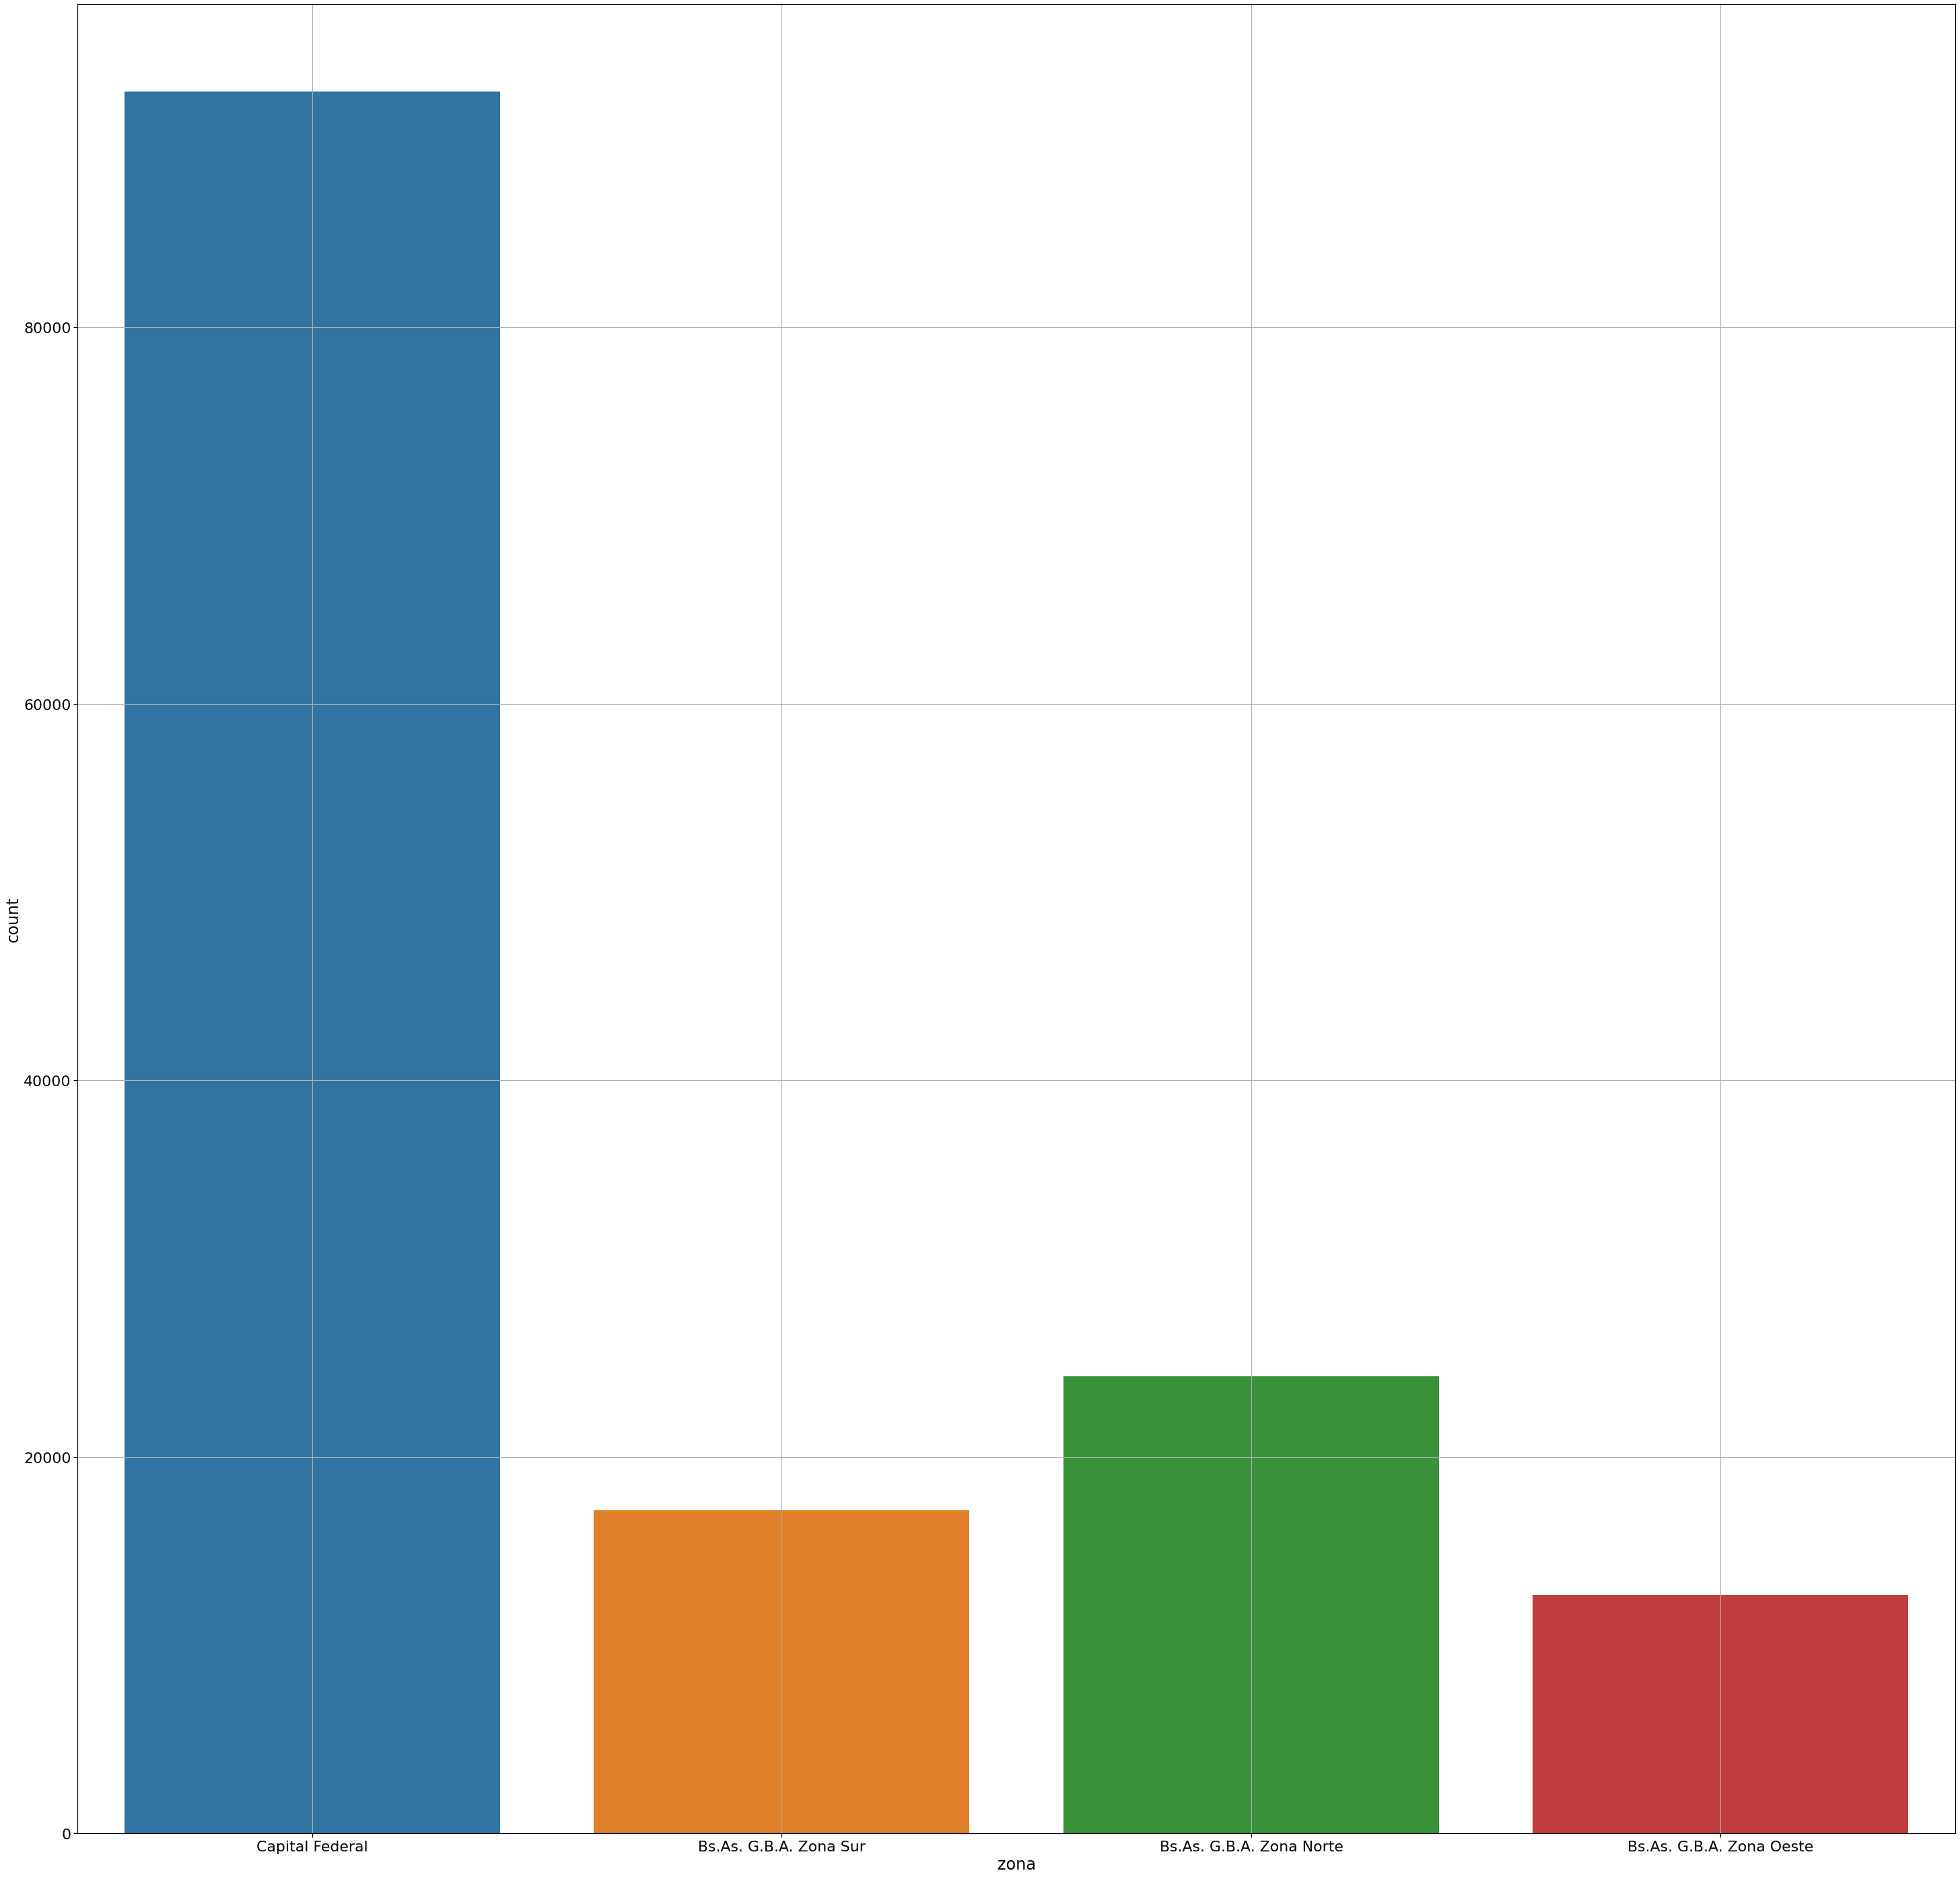

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sea

fig5,ax5=plt.subplots()
ax5 = sea.countplot(data = data, x = 'zona', hue_order = True)
ax5 = sea.set_context("notebook", font_scale=1, rc={"lines.linewidth":2.5})
plt.rcParams['figure.figsize']=9,9
plt.grid(True)



Distribución de la mayor cantidad de propiedades publicadas según barrio. En este gráfico no diferenciamos por tipo de propiedad (``tipo``). Ni por ``zona``.

In [ ]:
###CORRECCION GRAFICO

<Figure size 28800x7200 with 0 Axes>

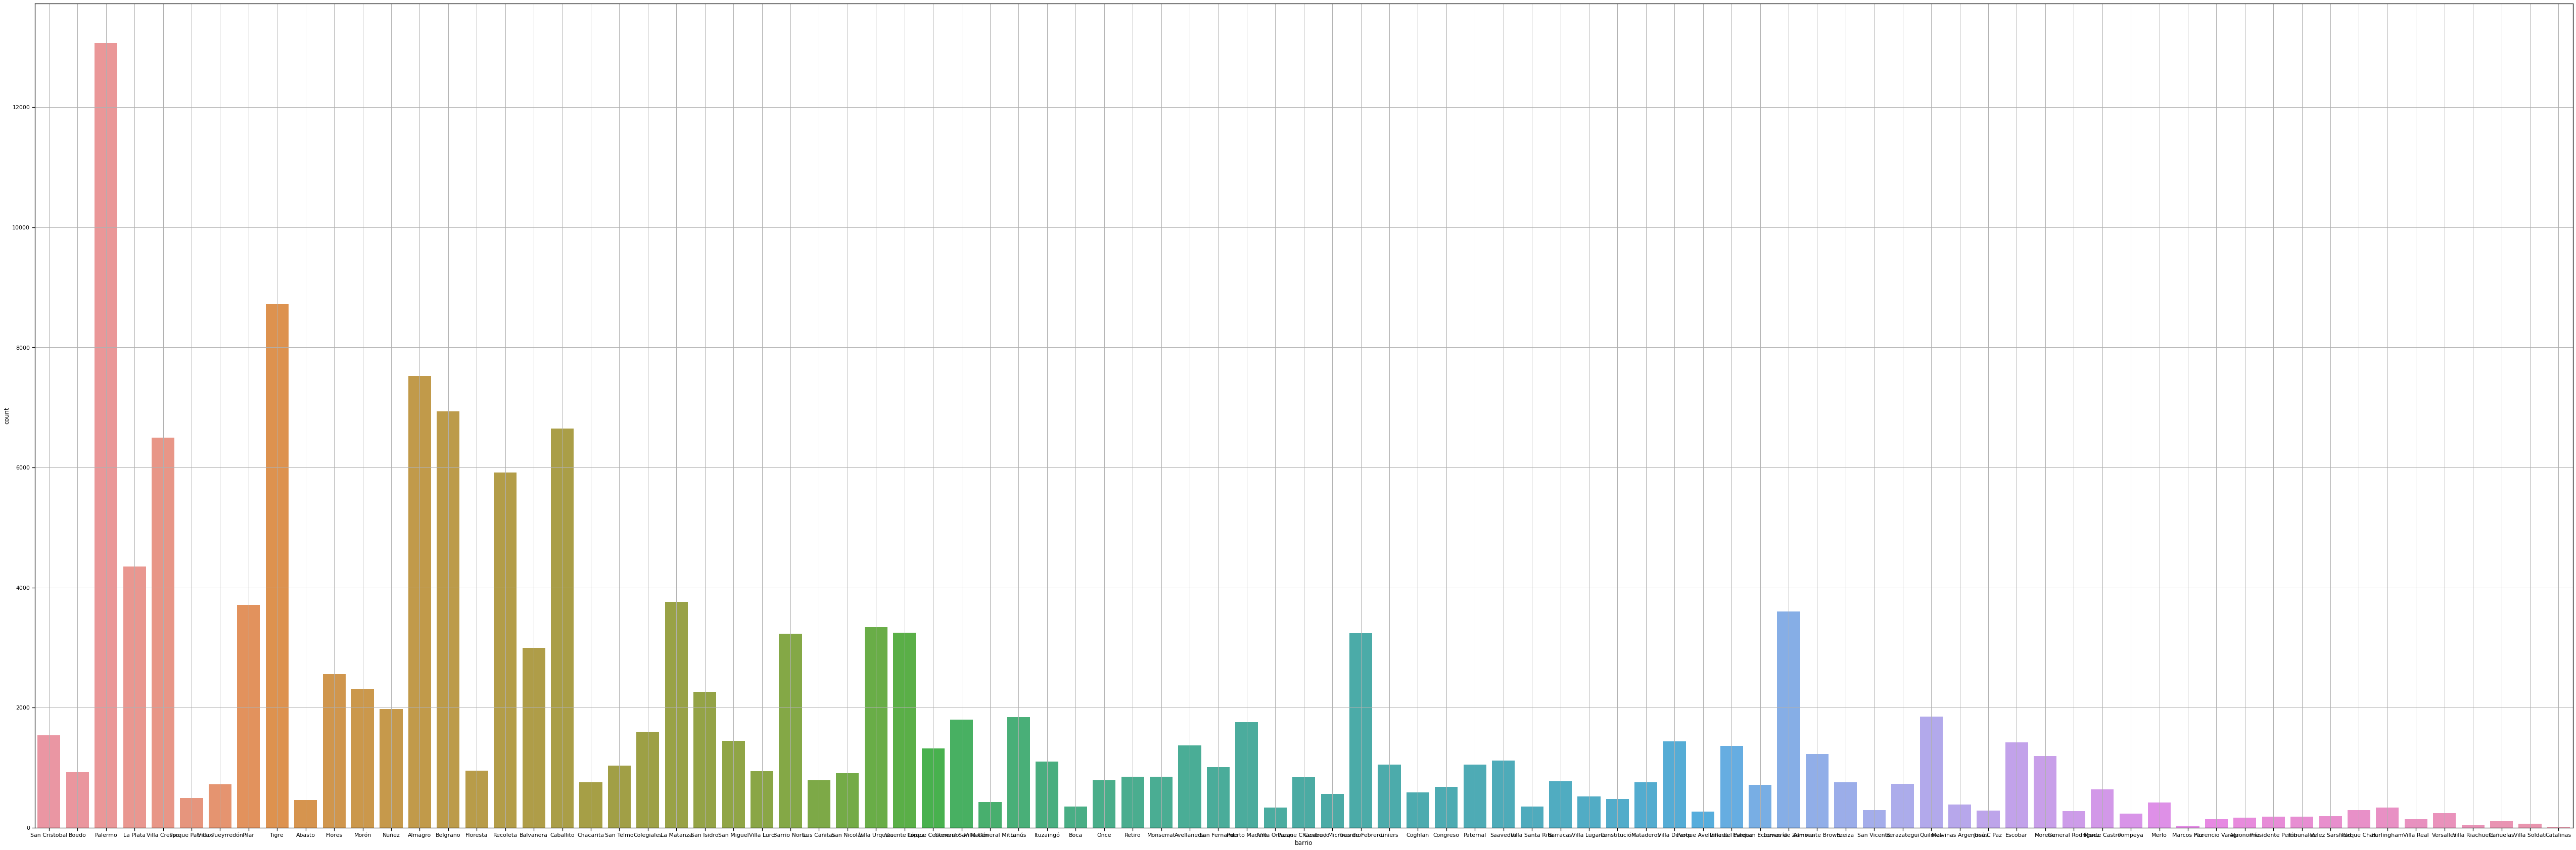

In [ ]:
plt.figure(figsize=(400,100))
plt.rcParams['figure.figsize']= 90,30
fig6,ax6=plt.subplots()
ax6 = sea.countplot(data = data, x = 'barrio')
ax6 = sea.set_context("notebook", font_scale=2, rc={"lines.linewidth":250})

plt.grid(True)

In [ ]:
####CORRECCION GRAFICO

Imprimimos el ``.describe()``.
Para observar como se están distribuyendo los valores y observar los valores atipicos a nivel general para cada variable, según tipo de propiedad.

In [ ]:
data.describe()

lat            lon  ...        sup_cub         price
count  136735.000000  136701.000000  ...  125046.000000  1.466600e+05
mean      -34.604896     -58.465304  ...     112.818011  2.412211e+05
std         0.468428       0.486190  ...     916.857584  3.185195e+05
min       -35.318457    -180.000000  ...       1.000000  5.500000e+03
25%       -34.627667     -58.504012  ...      47.000000  1.110000e+05
50%       -34.600943     -58.443262  ...      68.000000  1.660000e+05
75%       -34.574600     -58.407586  ...     108.000000  2.650000e+05
max        85.051129     -57.805832  ...  126062.000000  3.243423e+07

[8 rows x 8 columns]

<Figure size 720x720 with 0 Axes>

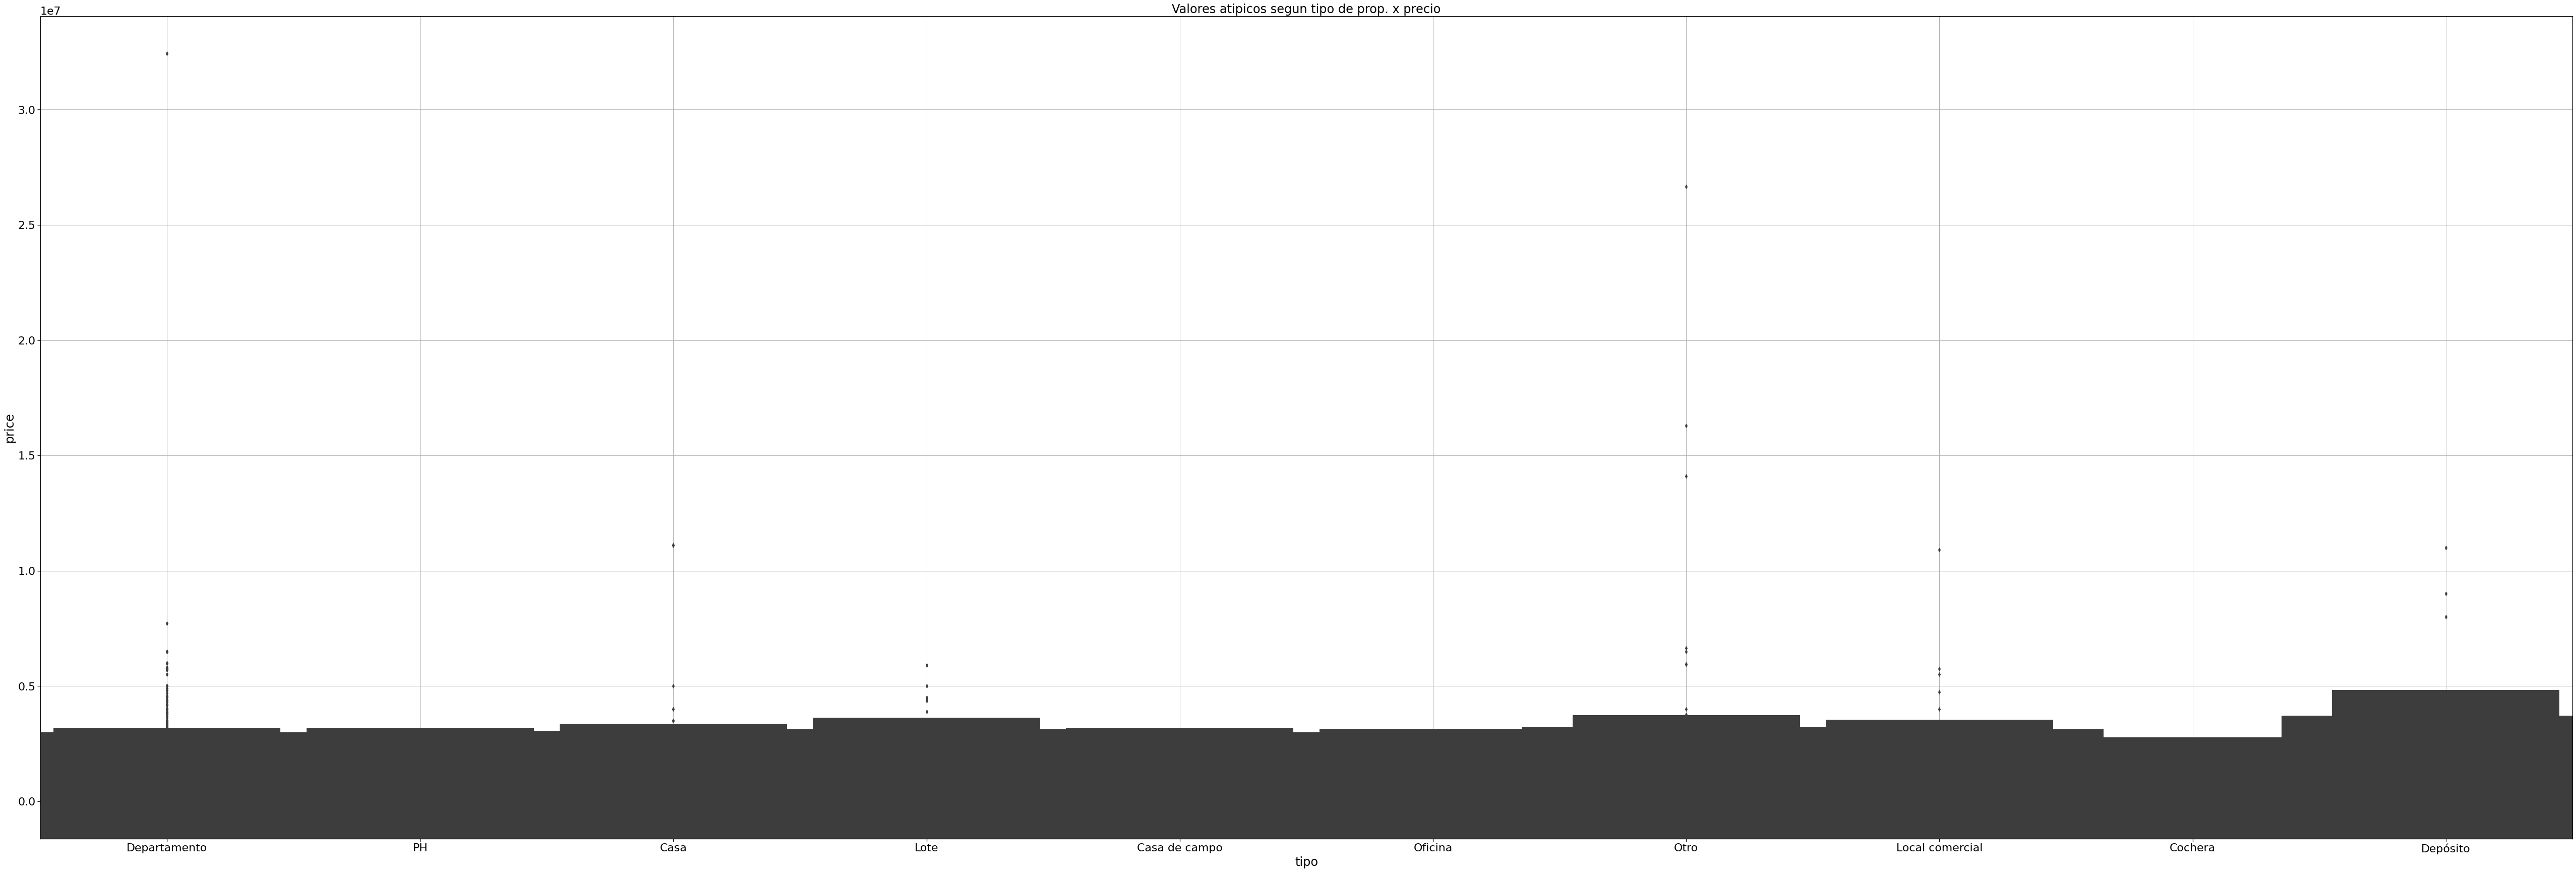

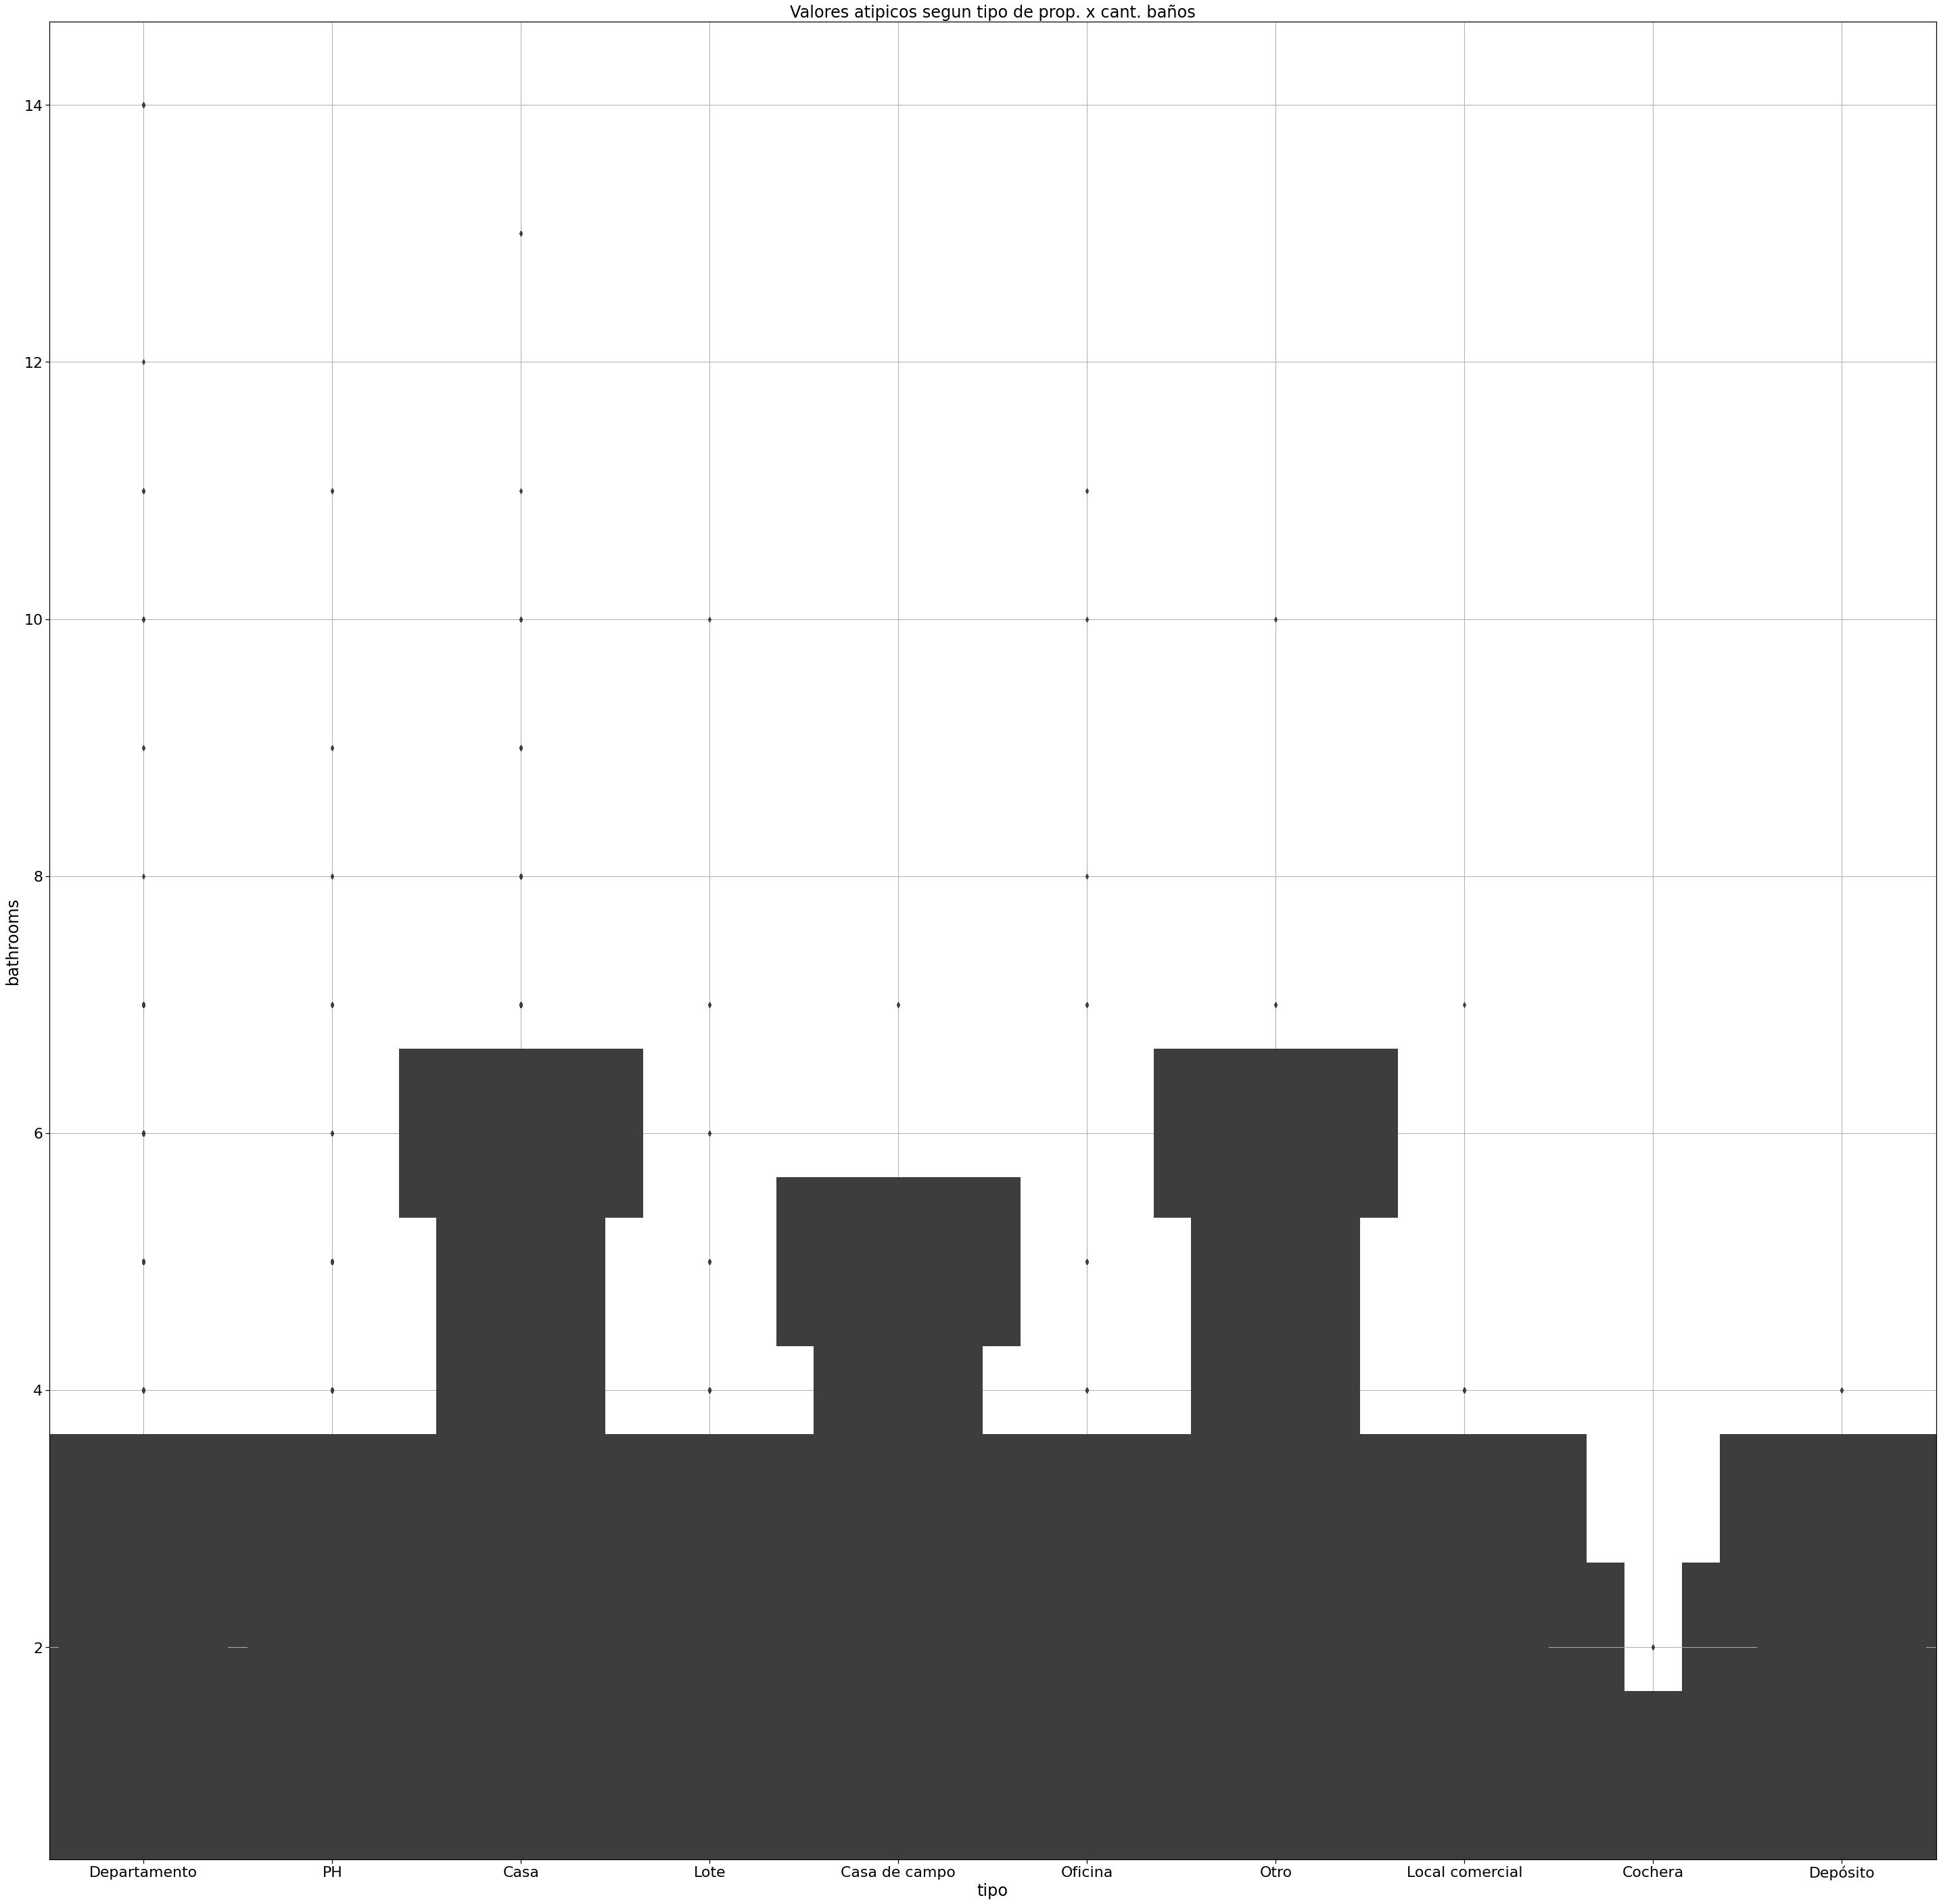

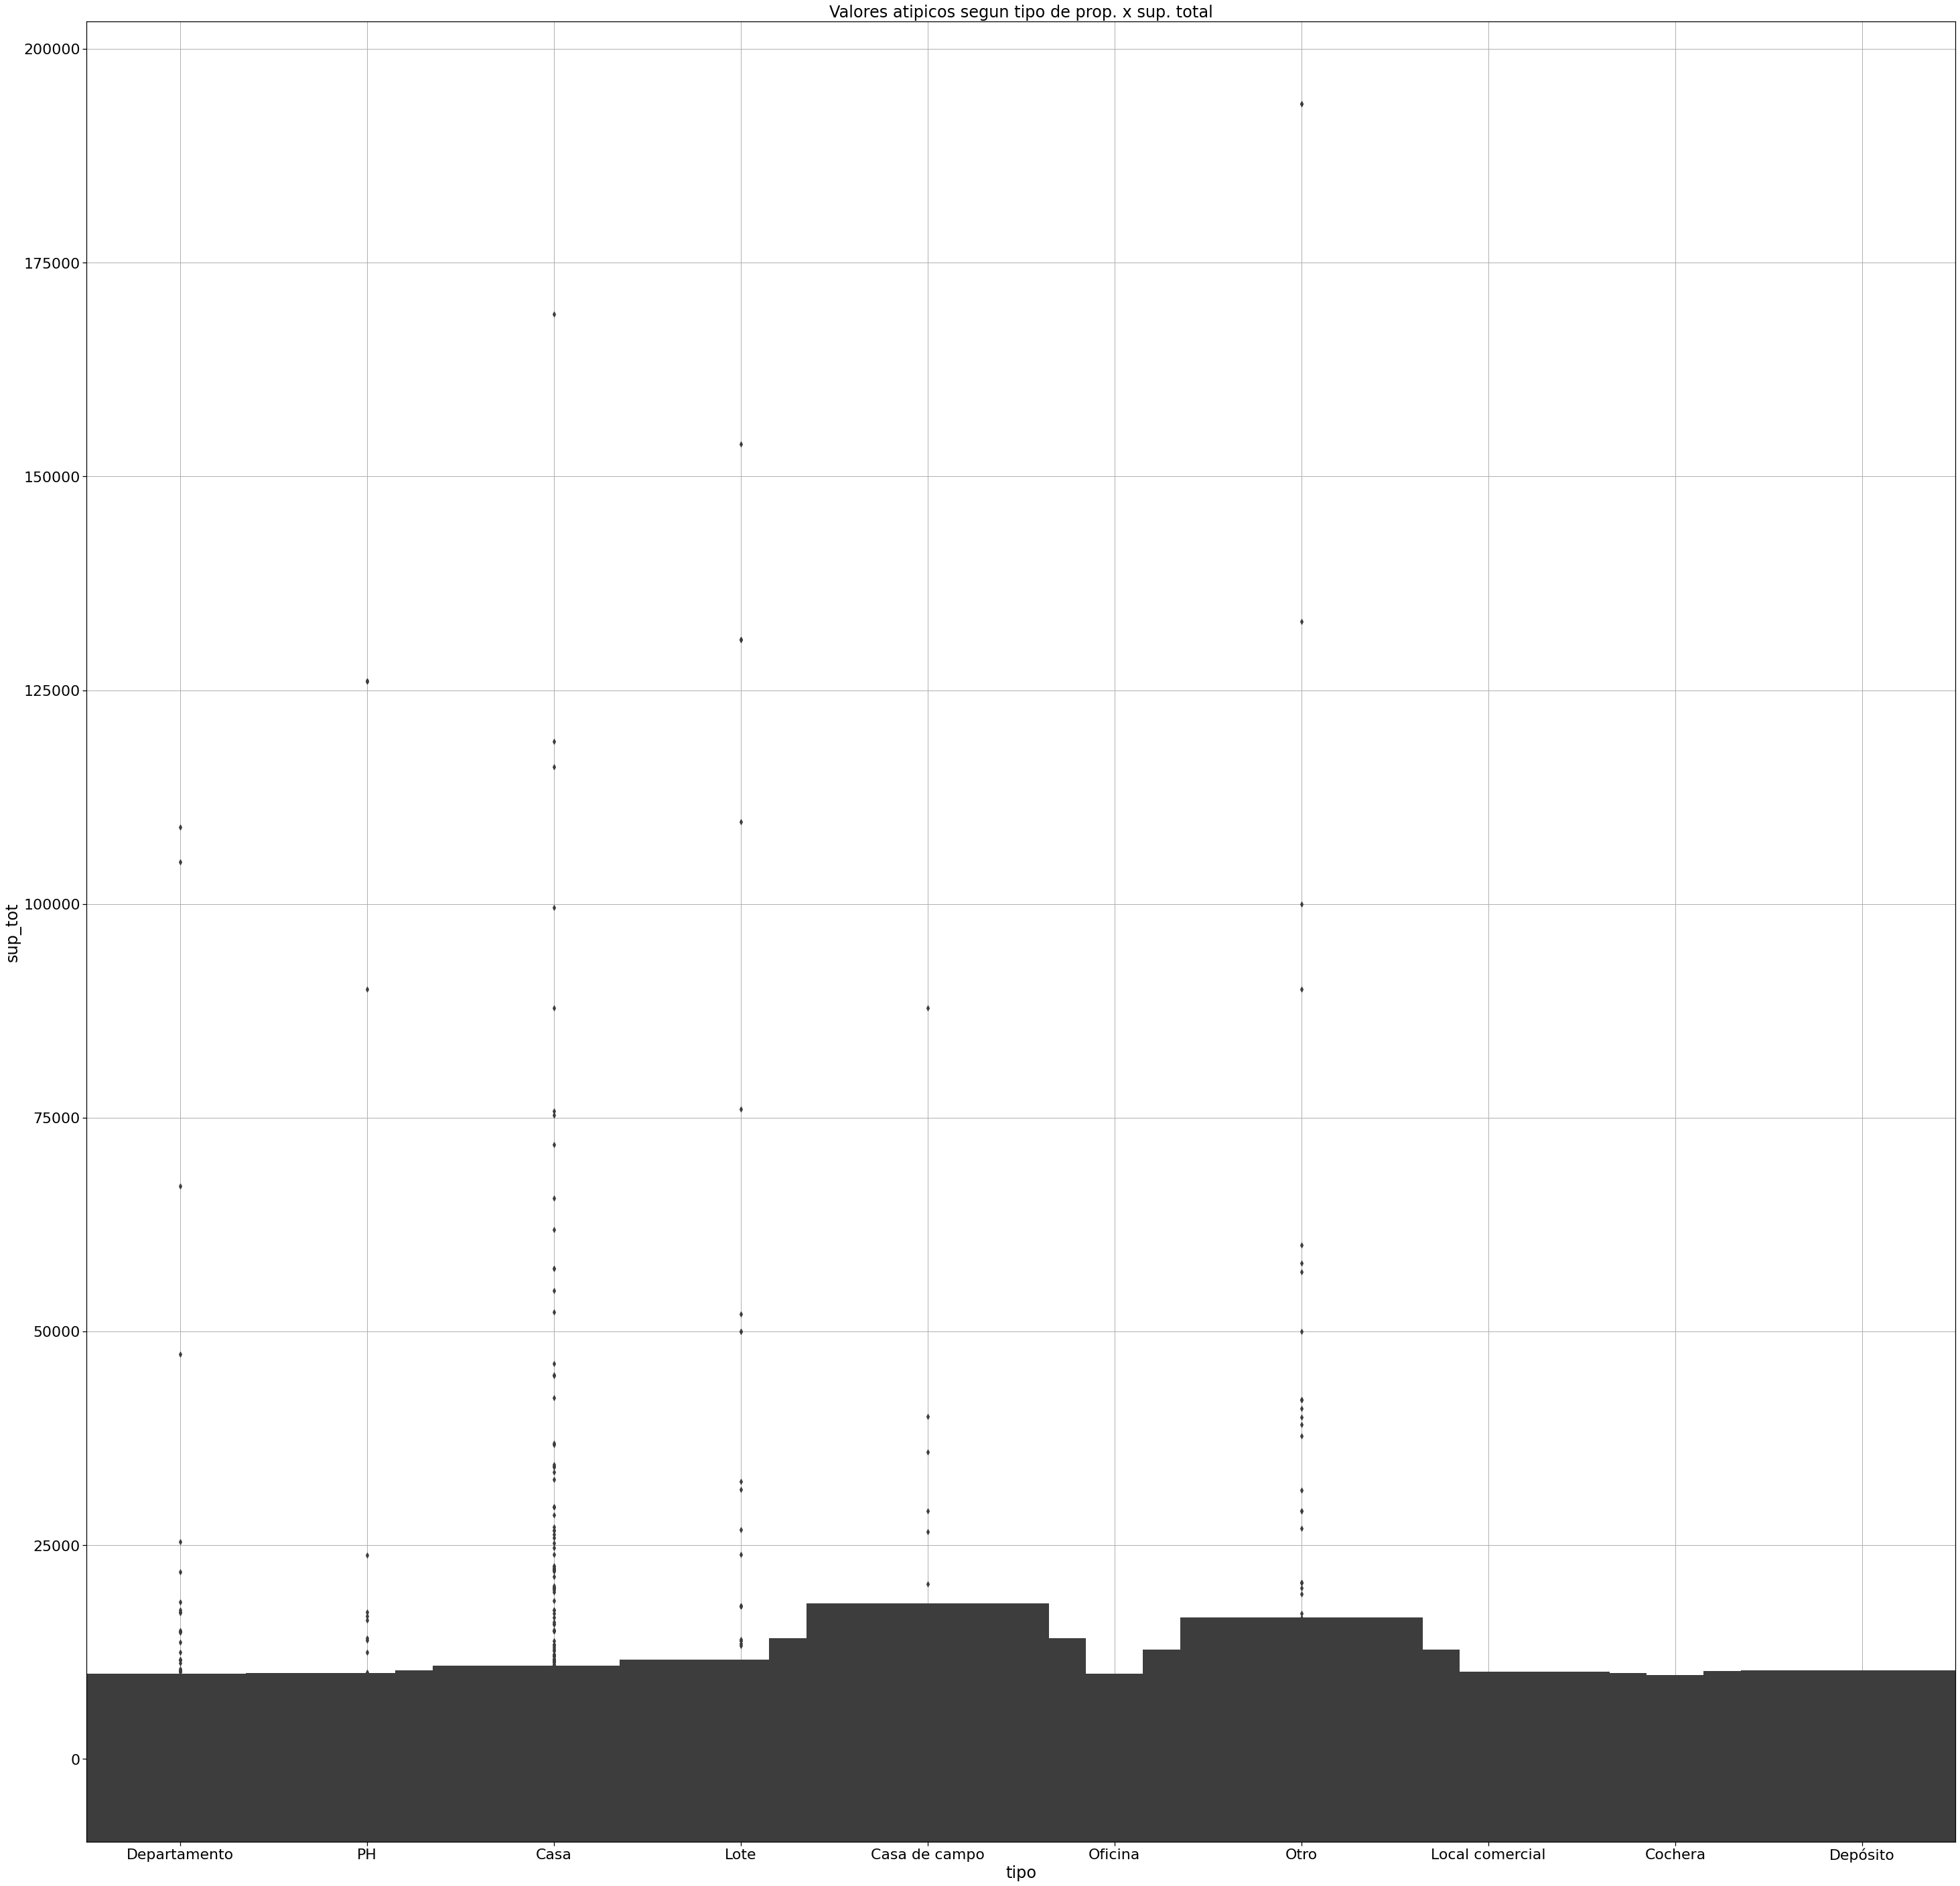

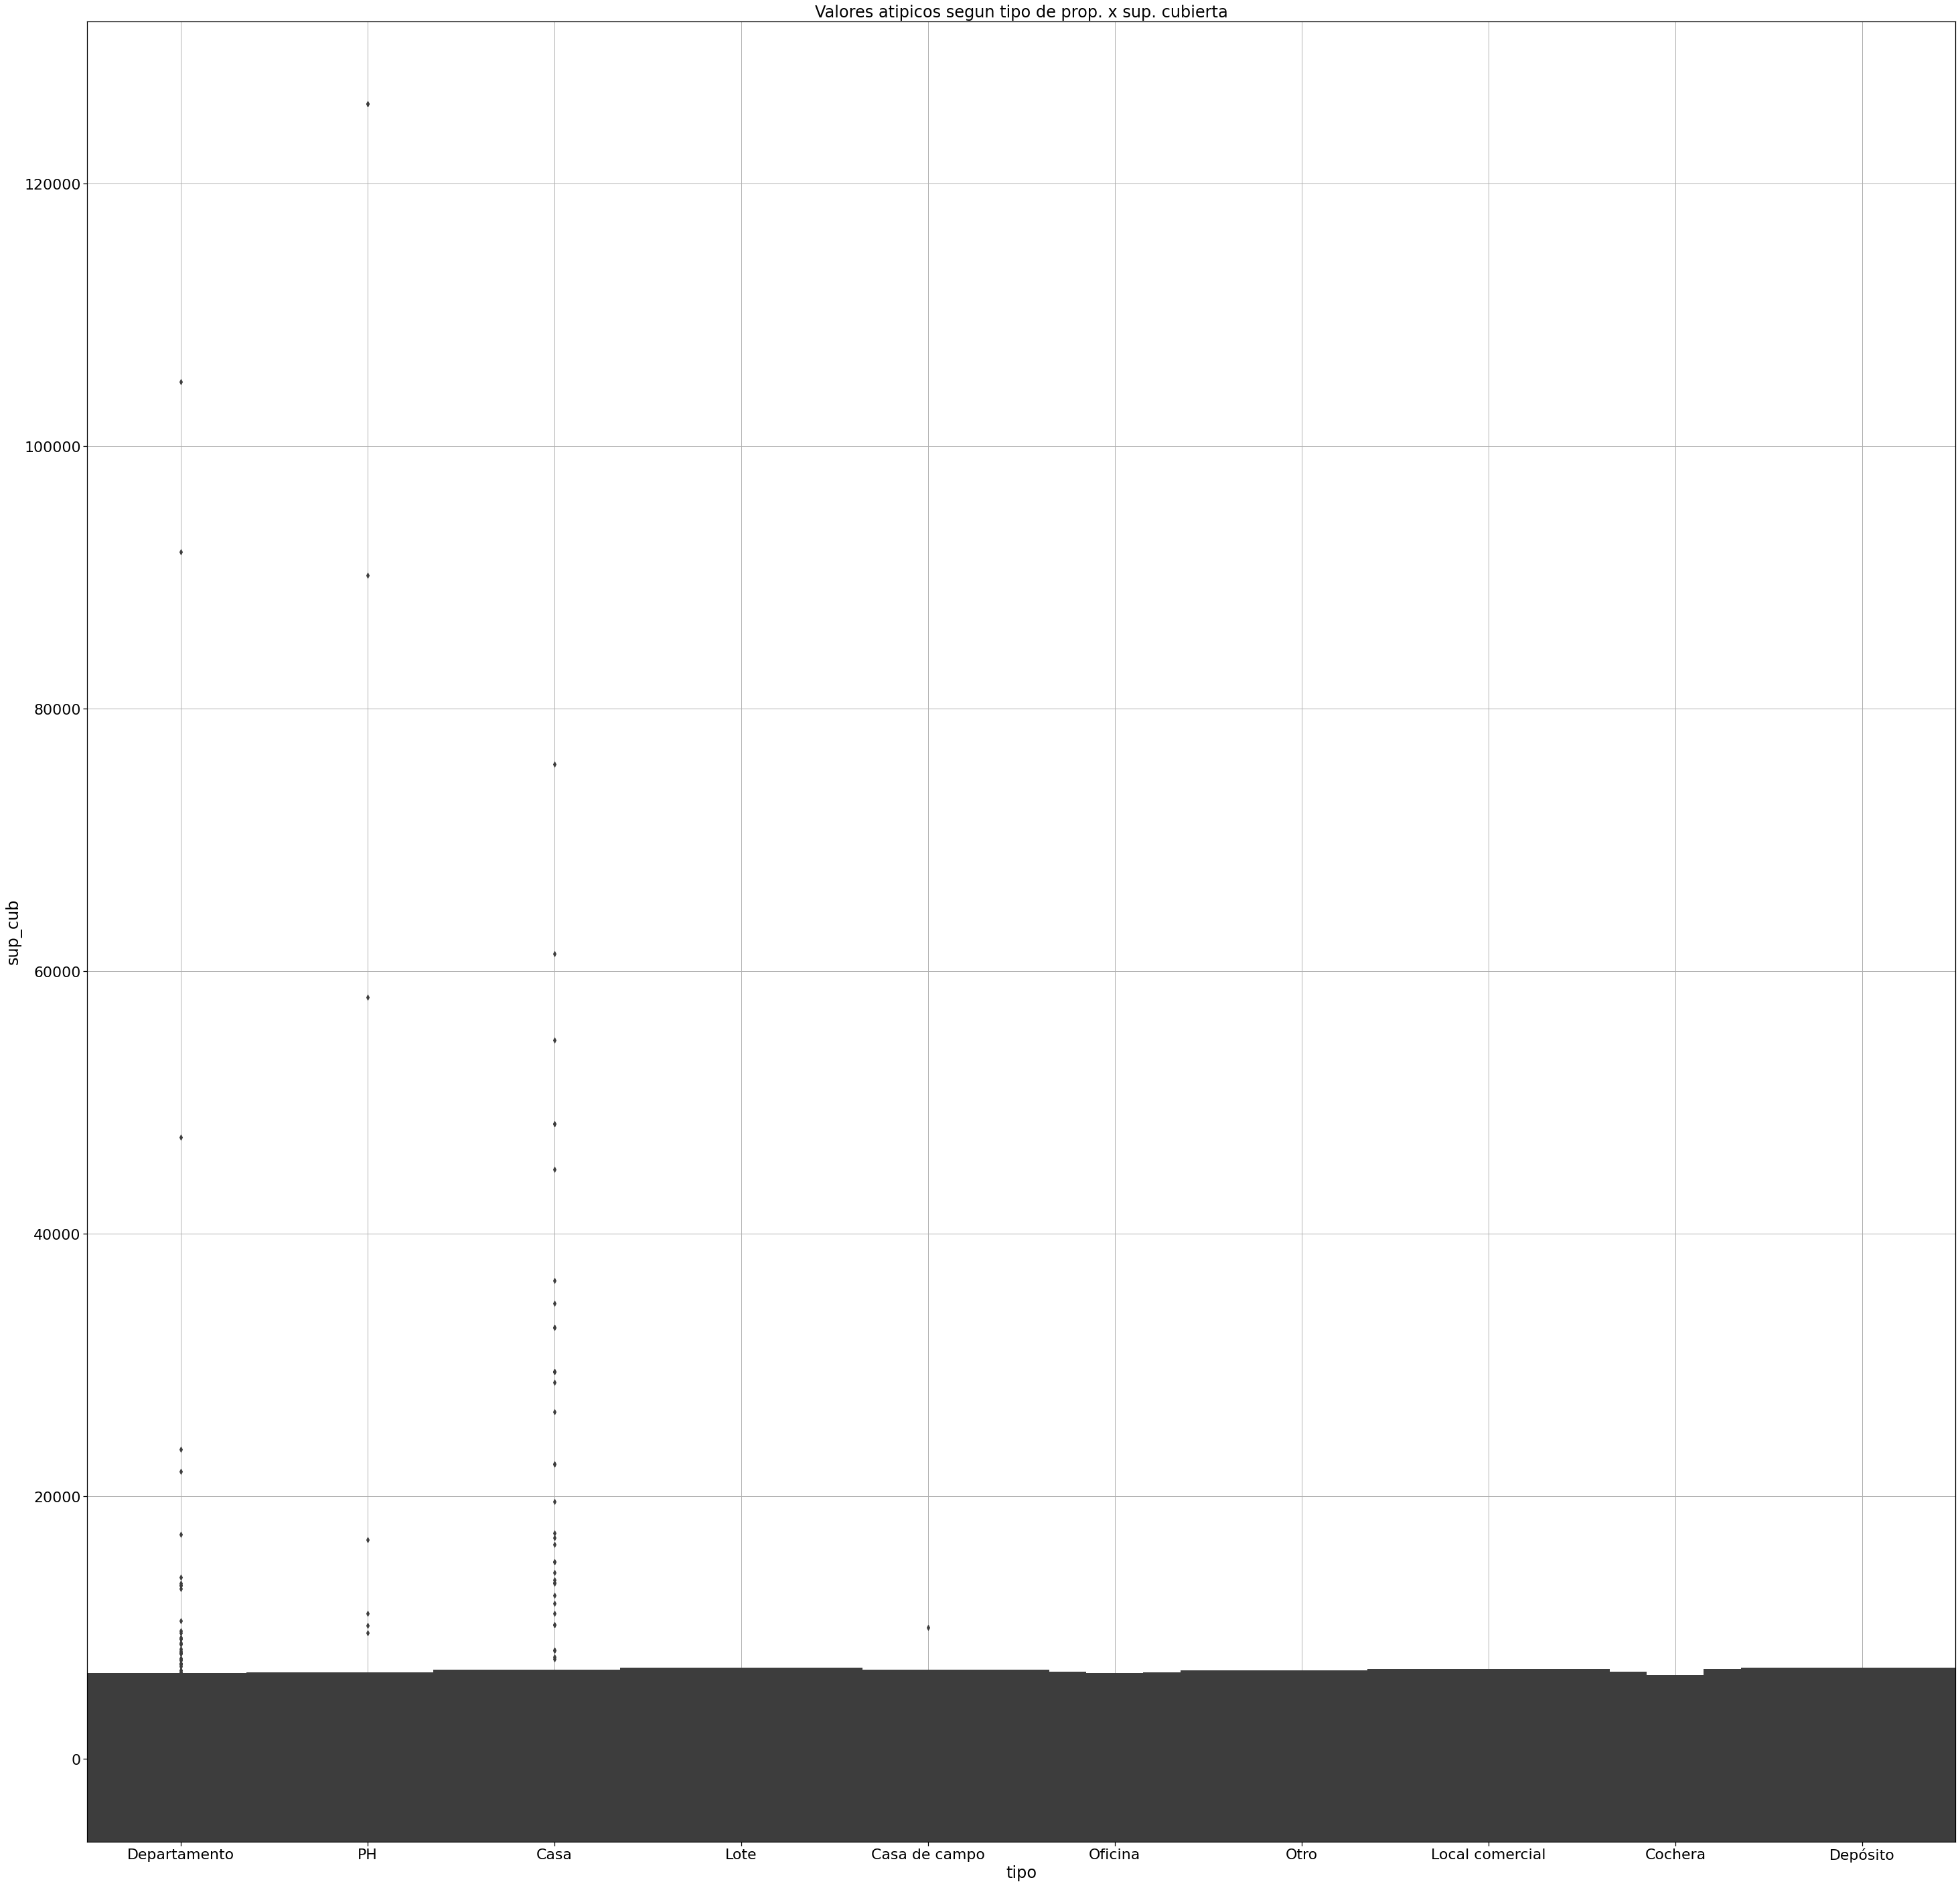

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sea

#boxplot tipo x price
plt.figure(figsize=(10,10))
fig1,ax1=plt.subplots()
ax1 = sea.boxplot(x='tipo', y='price', data=data)
ax1.set_title('Valores atipicos segun tipo de prop. x precio')
plt.rcParams['figure.figsize']=50,50
plt.grid(True)

#boxplot tipo x bathrooms
fig2,ax2=plt.subplots()
ax2 = sea.boxplot(x='tipo', y='bathrooms', data=data)
ax2.set_title('Valores atipicos segun tipo de prop. x cant. baños')
plt.rcParams['figure.figsize']=50,50
plt.grid(True)

#boxplot tipo x sup_tot
fig3,ax3=plt.subplots()
ax3.set_title('Valores atipicos segun tipo de prop. x sup. total')
ax = sea.boxplot(x='tipo', y='sup_tot', data=data)
plt.rcParams['figure.figsize']=50,50
plt.grid(True)

#boxplot tipo x sup_cub
fig4,ax4=plt.subplots()
ax4.set_title('Valores atipicos segun tipo de prop. x sup. cubierta')
ax = sea.boxplot(x='tipo', y='sup_cub', data=data)
plt.rcParams['figure.figsize']=50,50
plt.grid(True)

## 1.1.2 Filtrado y nuevo DataFrame

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

Seleccionamos las tres clases mas abundantes de tipos de propiedad: ``Departamentos``, ``Casas``, ``PH``, para la zona con más propiedades publicadas: ``Capital Federal``. A este nuevo dataset con el que trabajaremos apartir de ahora, le asignamos de nombre: ``data2``.

Hacemos el filtrado y verificamos con un ``.head()`` si se ha filtrado según las condiciones correctamente. Observamos que los datos seleccionados corresponden a la zona: ``Capital Federal`` y los tipos de propiedad corresponden a los seleccionados: ``Departamentos, Casas, PH``.

In [ ]:
import seaborn as sea
#data[data.tipo.isin(['Departamento', 'Casa', 'PH']) & data.zona.isin(['Capital Federal'])]
data2 = data[data.tipo.isin(['Departamento', 'Casa', 'PH']) & data.zona.isin(['Capital Federal'])]
data2.head()

start_date    end_date  ...          tipo  operation_type
0  2019-10-17  2019-12-23  ...  Departamento           Venta
1  2019-10-17  2019-11-21  ...            PH           Venta
2  2019-10-17  2019-11-01  ...            PH           Venta
3  2019-10-17  2019-12-23  ...            PH           Venta
5  2019-10-17  2019-11-01  ...            PH           Venta

[5 rows x 19 columns]

Imprimimos el ``.shape`` del dataset y comprobamos que tenemos la cantidad que se indica en la consigna. 

Las cantidad de instancias se corresponde con la pedida, y la cantidad de columnas varía por el filtrado que hicimos inicialmente. Donde eliminamos las columnas de  ``created_on`` , ``start_date``, ``end_date`` , el ``currency``, ``pais`` y el ``operation_type``.


In [ ]:
#deberías tener un dataset con 91485 instacias, 19 columnas.
#checkpoint, quedan menos columnas por las otras que se eliminaron anteriormente
data2.shape

(91485, 13)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
#Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. 
#¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
data2.describe()

lat           lon  ...        sup_cub         price
count  86951.000000  86937.000000  ...   82250.000000  9.148500e+04
mean     -34.599081    -58.436002  ...      94.966310  2.595003e+05
std        0.023957      0.036297  ...     778.515243  3.222654e+05
min      -34.696419    -58.530468  ...       1.000000  6.000000e+03
25%      -34.613757    -58.459605  ...      44.000000  1.200000e+05
50%      -34.599446    -58.433789  ...      63.000000  1.750000e+05
75%      -34.584148    -58.410143  ...      96.000000  2.790000e+05
max      -34.535818    -58.353930  ...  126062.000000  3.243423e+07

[8 rows x 8 columns]

Distribución cantidad de propiedades publicadas por  ``barrio``, ya hecho el filtrado según tipo de propiedad y zona. Por lo que esta distribución corresponde al ``data2``.

<Figure size 28800x7200 with 0 Axes>

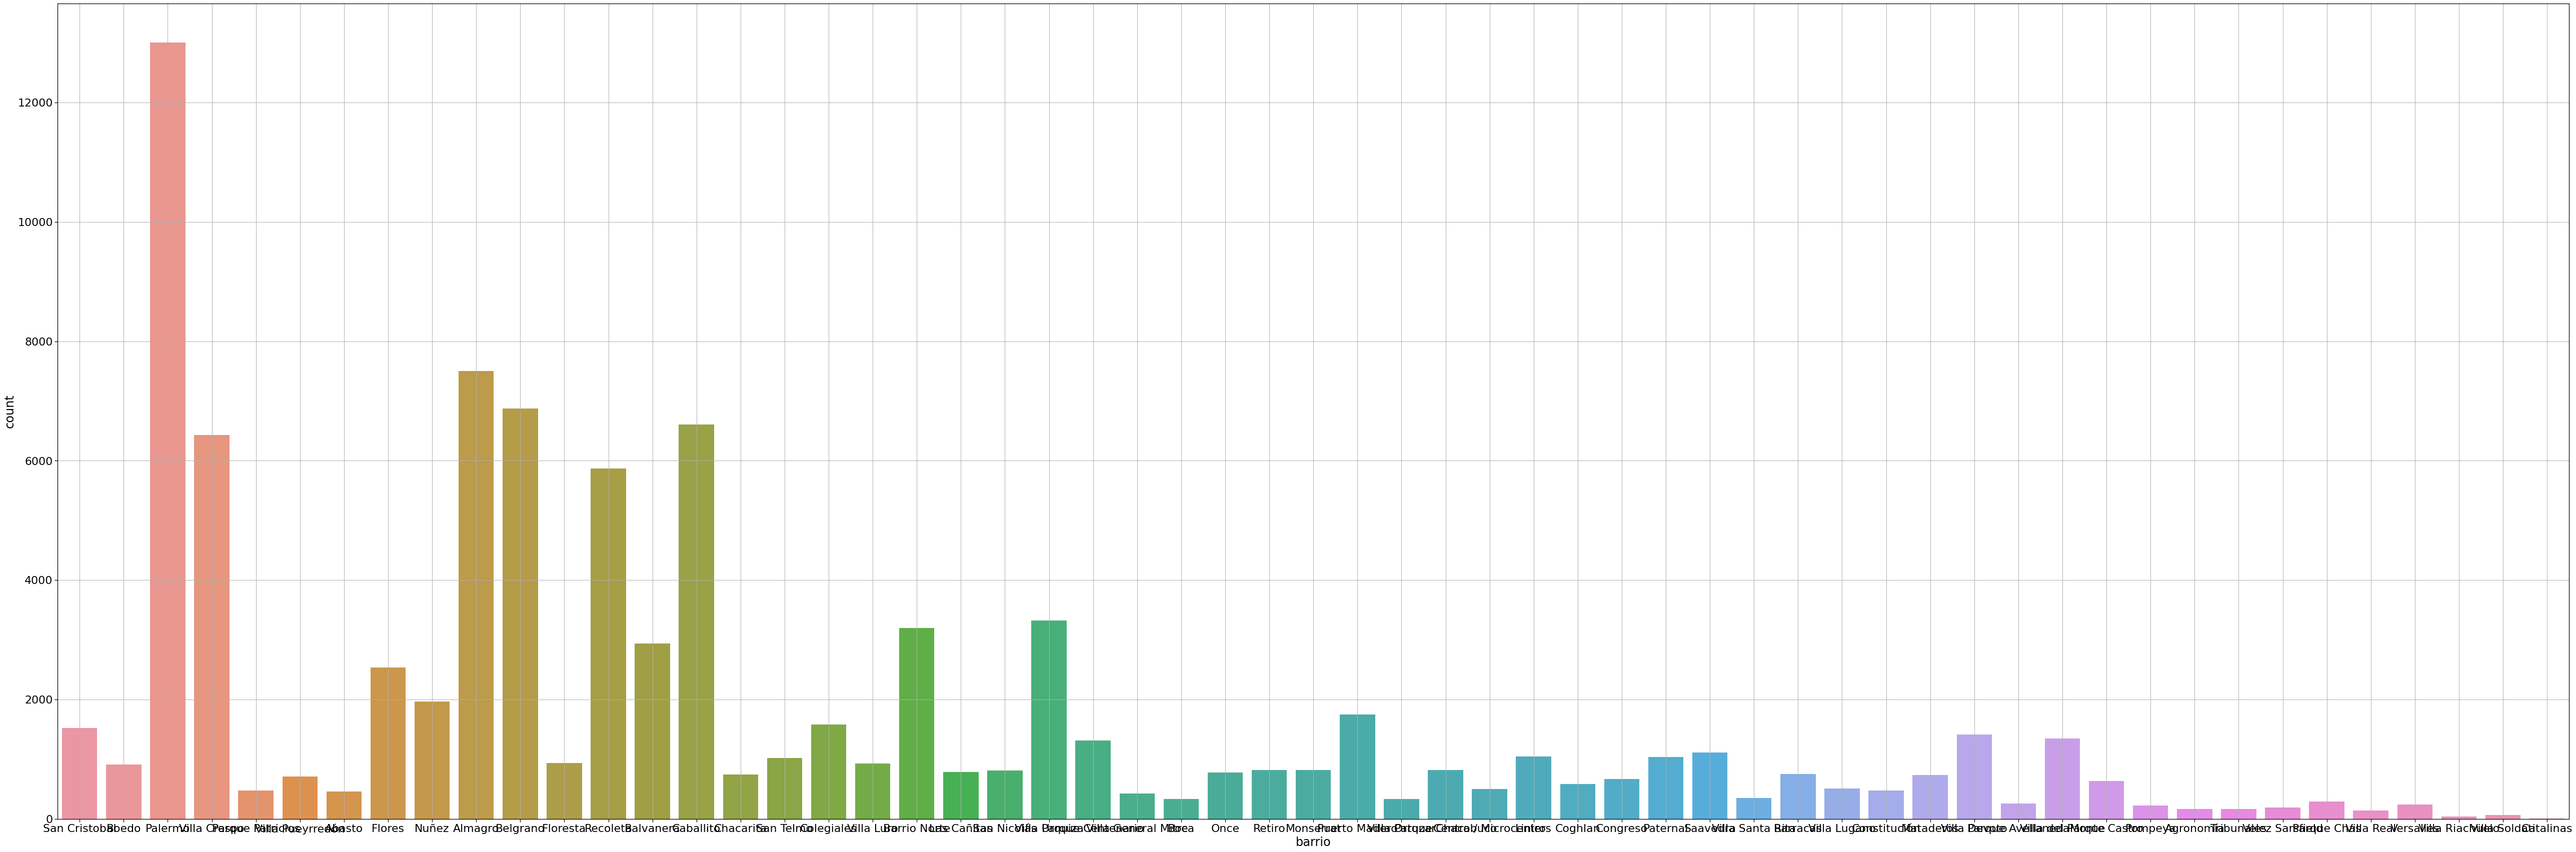

In [ ]:
plt.figure(figsize=(400,100))
plt.rcParams['figure.figsize']= 90,30
fig6,ax6=plt.subplots()
ax6 = sea.countplot(data = data2, x = 'barrio')
ax6 = sea.set_context("notebook", font_scale=2, rc={"lines.linewidth":250})

plt.grid(True)

Volvemos a imprimir el ``.describe()`` esta vez para el dataset ya filtrado por tipo de propiedad y por zona, al que nombramos ``data2``.
Para observar como se están distribuyendo los valores, vamos a volver a realizar boxplots por variable, esta vez con el dataset ya filtrado(``data2``). Pero, sin reemplazar los valores nulos ni eliminar los datos atípicos. 

<Figure size 1800x3600 with 0 Axes>

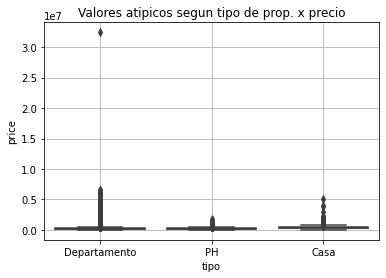

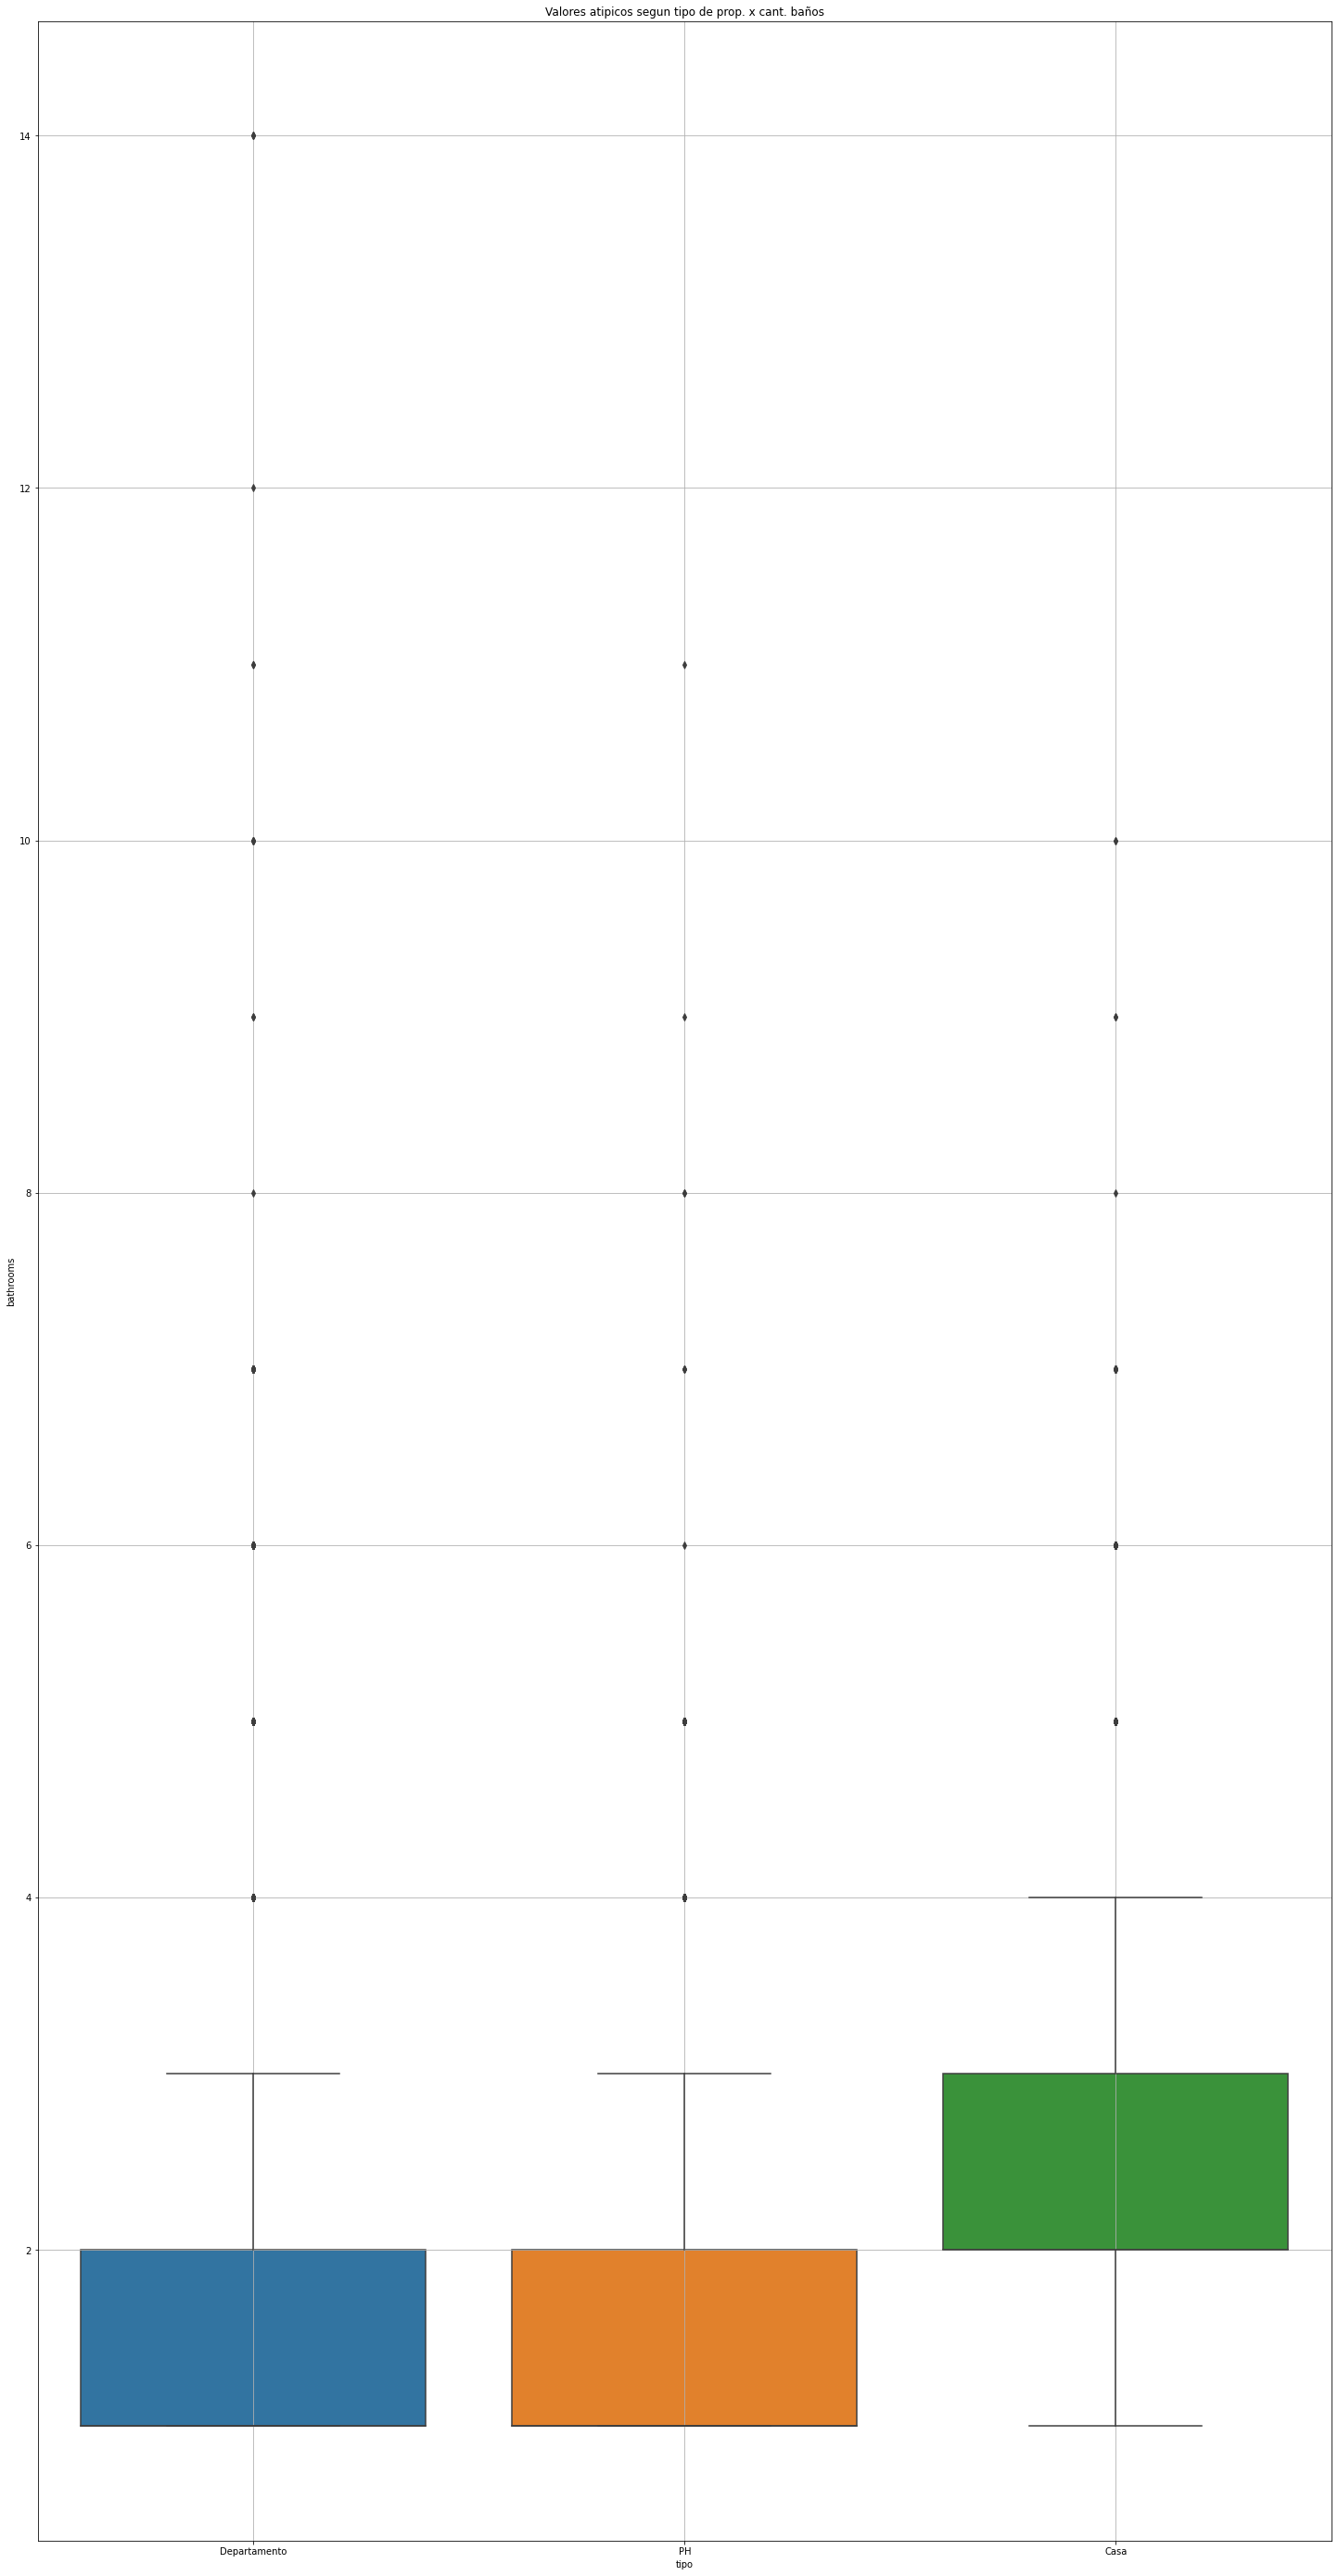

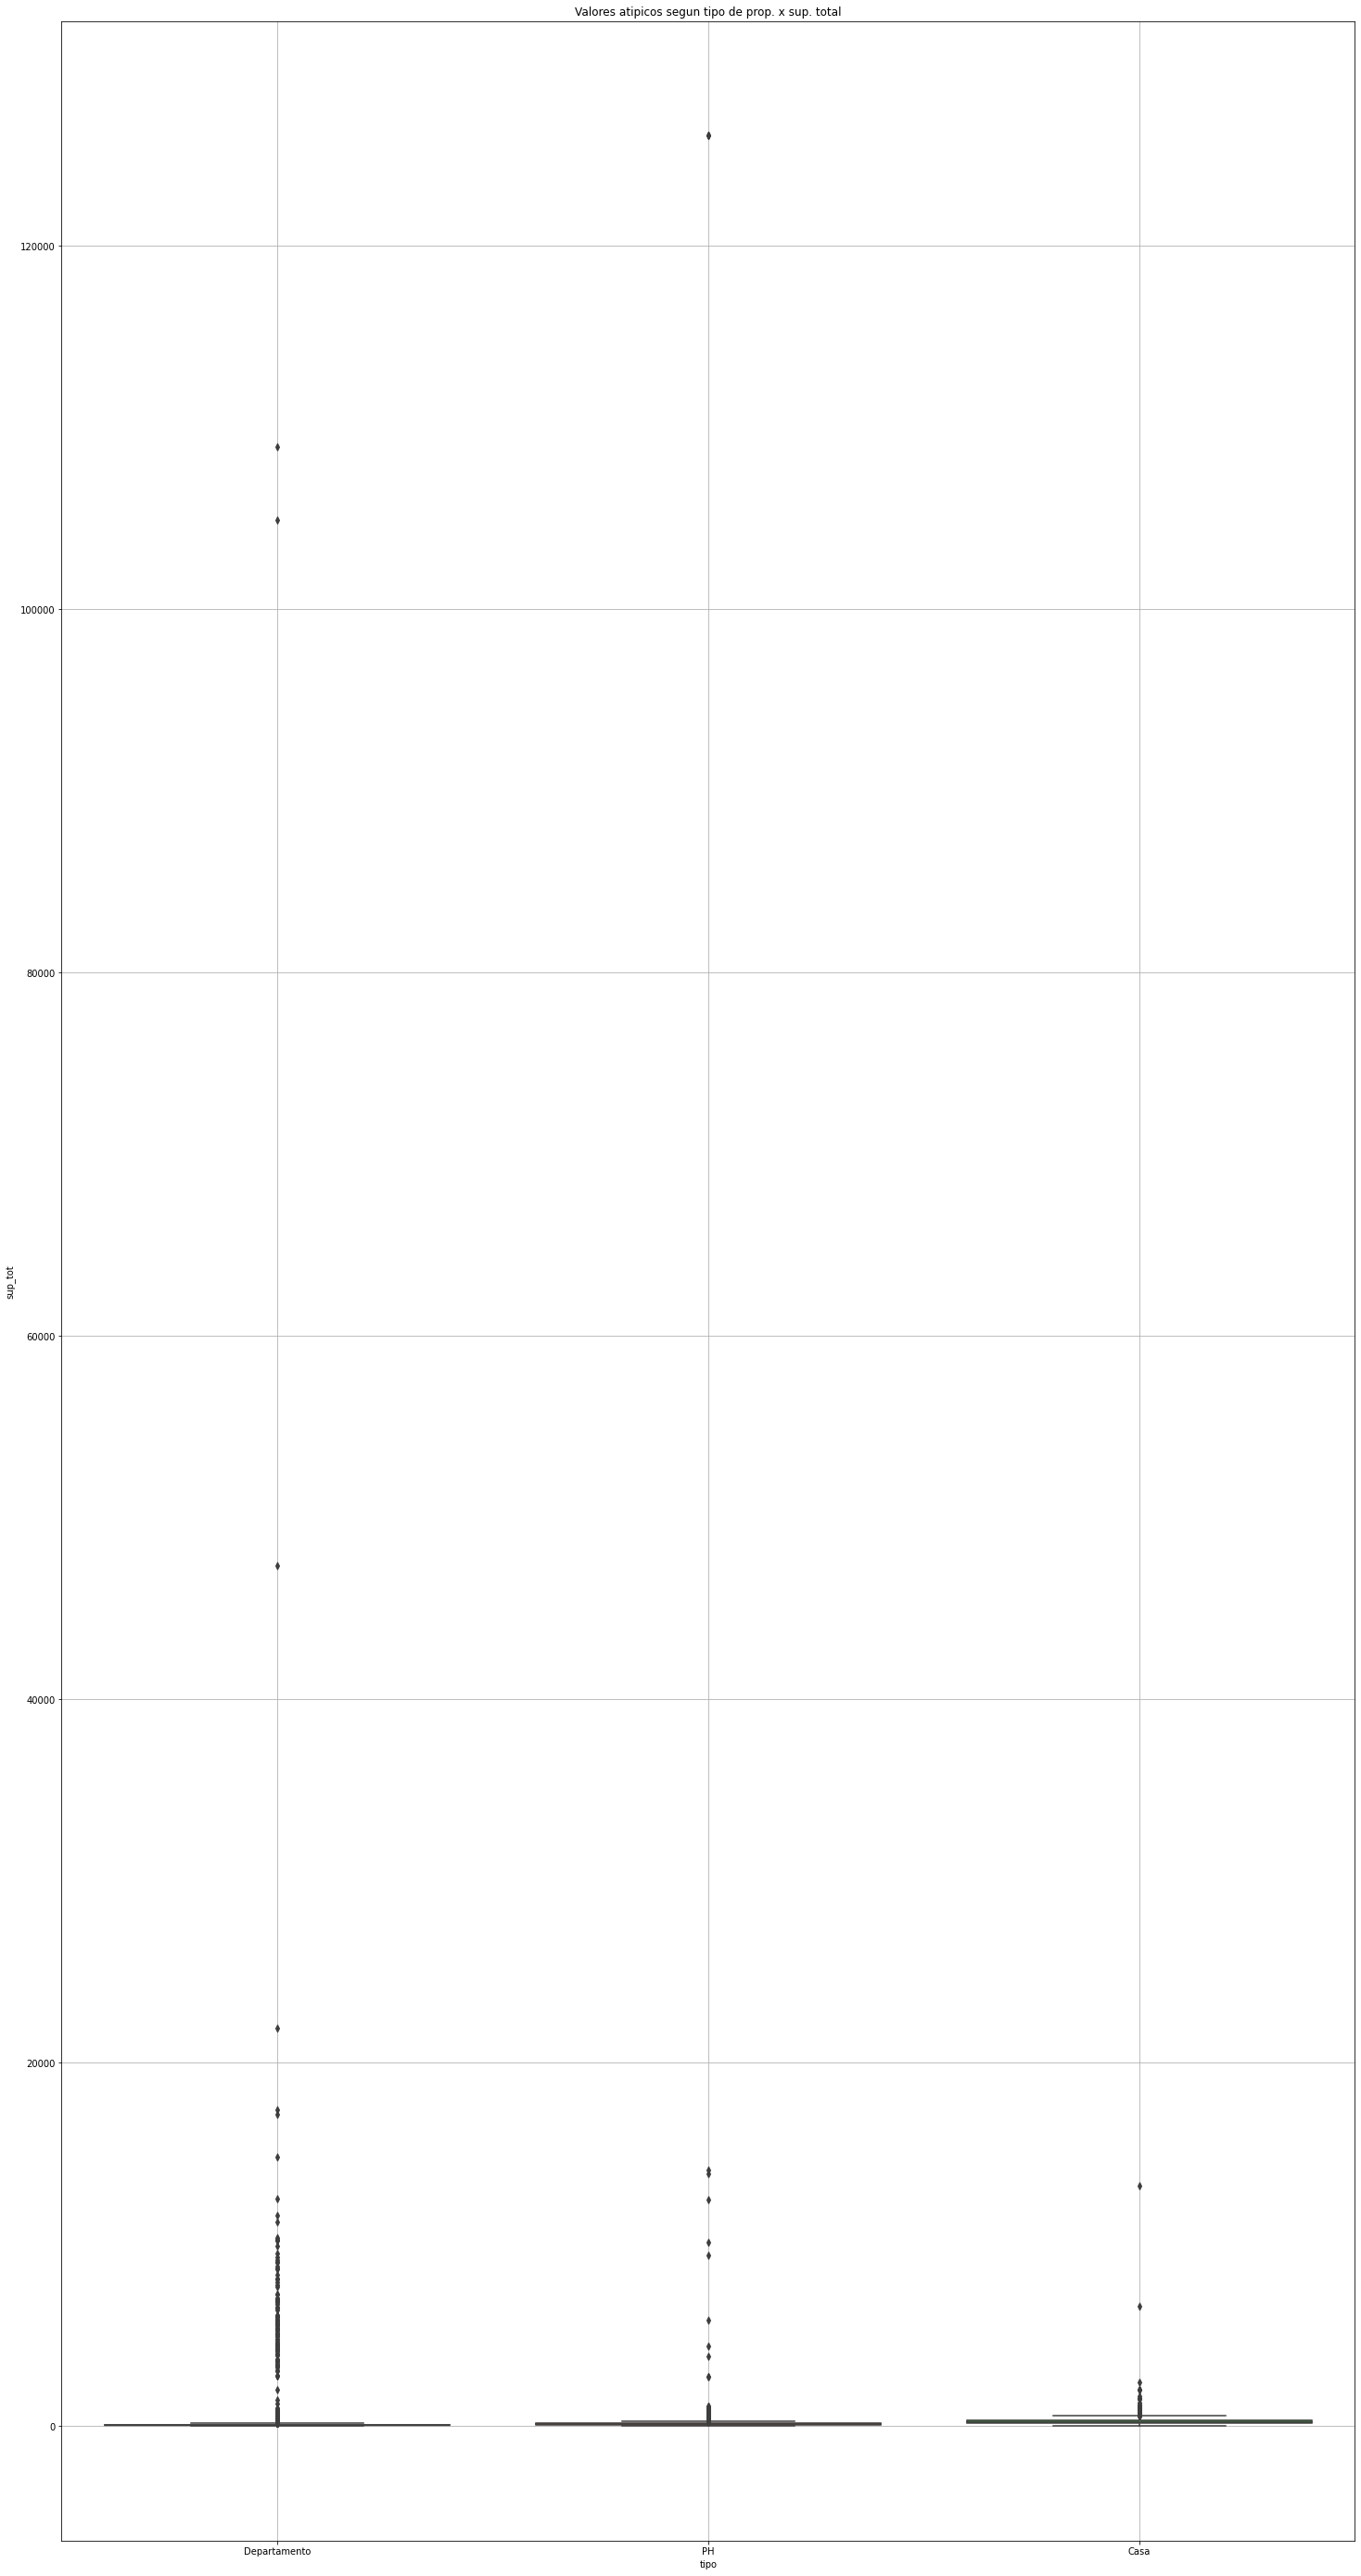

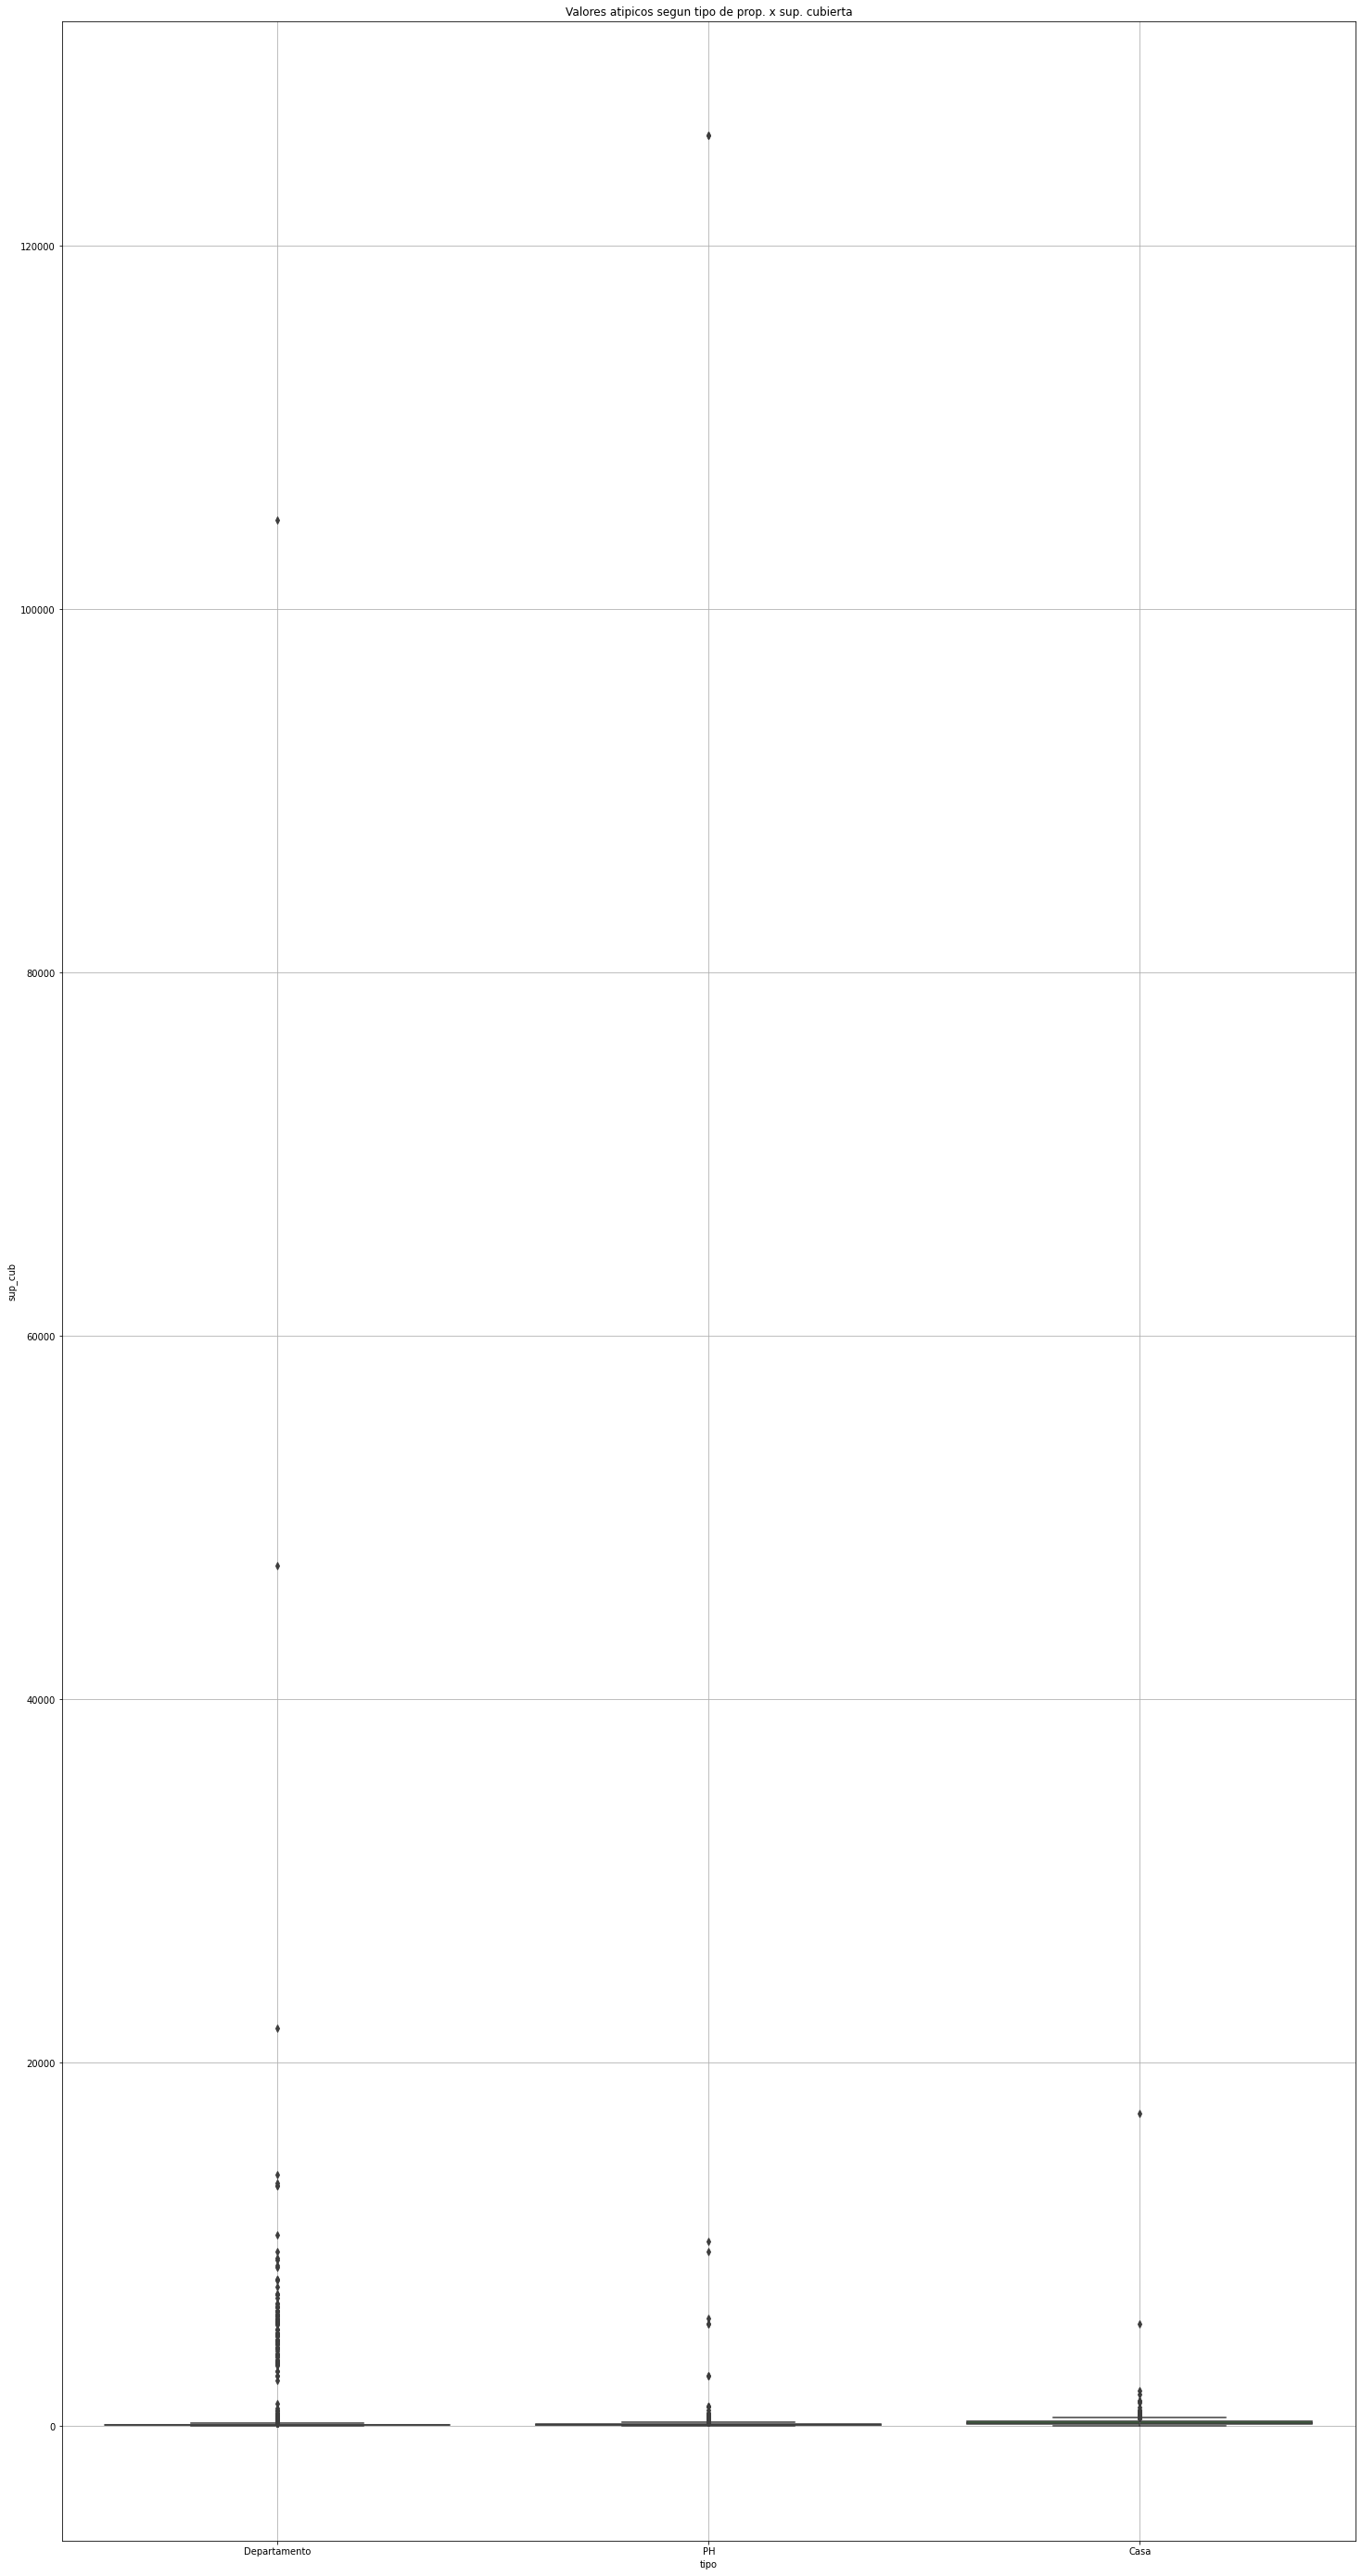

In [ ]:
#boxplot tipo x price
plt.figure(figsize=(25,50))
fig1,ax1=plt.subplots()
ax1 = sea.boxplot(x='tipo', y='price', data=data2)
ax1.set_title('Valores atipicos segun tipo de prop. x precio')
plt.rcParams['figure.figsize']=25,50
plt.grid(True)

#boxplot tipo x bathrooms
fig2,ax2=plt.subplots()
ax2 = sea.boxplot(x='tipo', y='bathrooms', data=data2)
ax2.set_title('Valores atipicos segun tipo de prop. x cant. baños')
plt.rcParams['figure.figsize']=25,50
plt.grid(True)

#boxplot tipo x sup_tot
fig3,ax3=plt.subplots()
ax3.set_title('Valores atipicos segun tipo de prop. x sup. total')
ax = sea.boxplot(x='tipo', y='sup_tot', data=data2)
plt.rcParams['figure.figsize']=25,50
plt.grid(True)

#boxplot tipo x sup_cub
fig4,ax4=plt.subplots()
ax4.set_title('Valores atipicos segun tipo de prop. x sup. cubierta')
ax = sea.boxplot(x='tipo', y='sup_cub', data=data2)
plt.rcParams['figure.figsize']=25,50
plt.grid(True)

## 1.1.3 Eliminacion de Valores Nulos

Vamos a eliminar los valores nulos, y verificar que su porcentaje no supere el 5% sobre el total.
Verifico que la cantidad de valores nulos en cada variable sea 0, y finalmente filtro los datos atipicos.

In [ ]:
print('CANT. VALORES NULOS X COLUMNA')
print()
df=data.isna().sum()
df

CANT. VALORES NULOS X COLUMNA



lat             9925
lon             9959
zona               0
barrio             0
rooms              0
bedrooms           0
bathrooms       5957
sup_tot        20527
sup_cub        21614
price              0
title              0
description        0
tipo               0
dtype: int64

In [ ]:
df.dropna()
df.isna().sum()


0

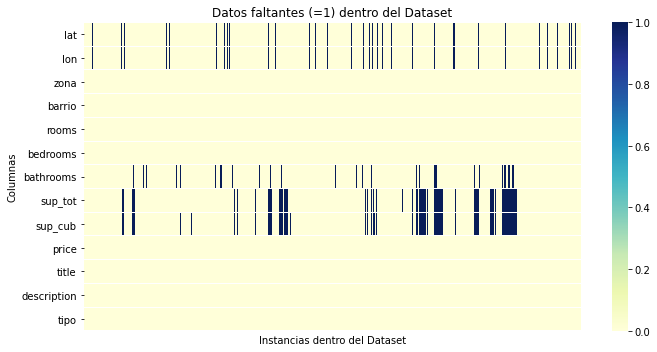

In [ ]:
datos_nulos = data.isnull()
fig, axs = plt.subplots(1, figsize=(10, 5))
heat = sea.heatmap(datos_nulos.T, cmap="YlGnBu",xticklabels=False)
plt.title("Datos faltantes (=1) dentro del Dataset")
plt.xlabel("Instancias dentro del Dataset")
plt.ylabel("Columnas")
plt.tight_layout()

In [ ]:
data.describe()

lat            lon  ...        sup_cub         price
count  136735.000000  136701.000000  ...  125046.000000  1.466600e+05
mean      -34.604896     -58.465304  ...     112.818011  2.412211e+05
std         0.468428       0.486190  ...     916.857584  3.185195e+05
min       -35.318457    -180.000000  ...       1.000000  5.500000e+03
25%       -34.627667     -58.504012  ...      47.000000  1.110000e+05
50%       -34.600943     -58.443262  ...      68.000000  1.660000e+05
75%       -34.574600     -58.407586  ...     108.000000  2.650000e+05
max        85.051129     -57.805832  ...  126062.000000  3.243423e+07

[8 rows x 8 columns]

In [ ]:
data2.head()

lat  ...          tipo
0 -34.605880  ...  Departamento
1 -34.624056  ...            PH
2 -34.593569  ...            PH
3 -34.581294  ...            PH
5 -34.593779  ...            PH

[5 rows x 13 columns]

# 1.2 Distribuciones de variables

### 1.2.1 Precios x tipo de prop. segun zona 

Text(0.5, 1.0, 'Precio')

<Figure size 28800x14400 with 0 Axes>

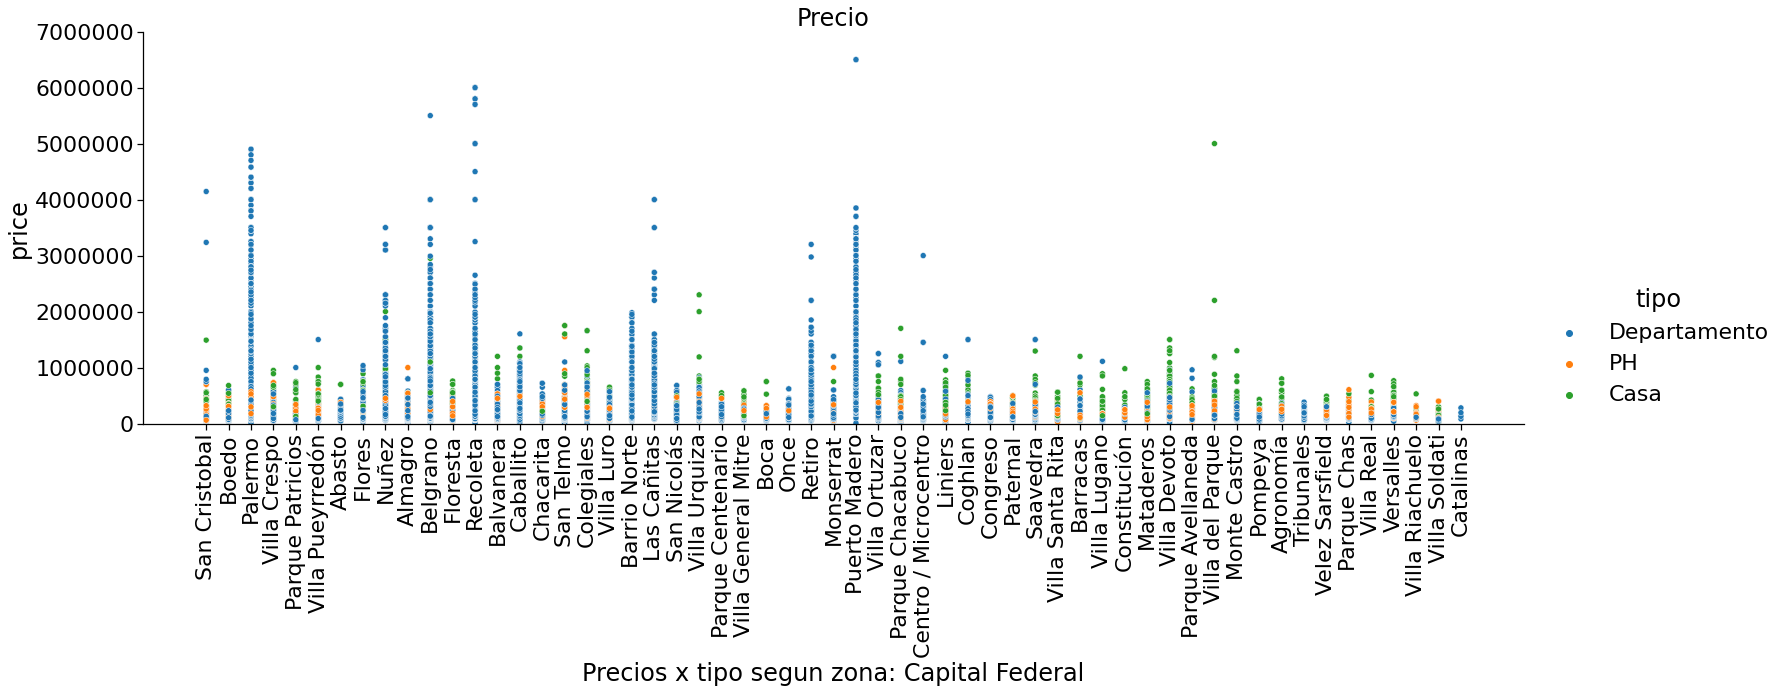

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sea
import matplotlib.pyplot as plt

plt.figure(figsize=(400,200))
sea.pairplot(data2,x_vars=['barrio'],y_vars=['price'],hue='tipo',height=7, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(0,7000000)
plt.xlabel('Precios x tipo segun zona: Capital Federal')
plt.title('Precio') 

In [ ]:
data2.describe()

lat           lon  ...        sup_cub         price
count  86951.000000  86937.000000  ...   82250.000000  9.148500e+04
mean     -34.599081    -58.436002  ...      94.966310  2.595003e+05
std        0.023957      0.036297  ...     778.515243  3.222654e+05
min      -34.696419    -58.530468  ...       1.000000  6.000000e+03
25%      -34.613757    -58.459605  ...      44.000000  1.200000e+05
50%      -34.599446    -58.433789  ...      63.000000  1.750000e+05
75%      -34.584148    -58.410143  ...      96.000000  2.790000e+05
max      -34.535818    -58.353930  ...  126062.000000  3.243423e+07

[8 rows x 8 columns]

### 1.2.2 Sup_tot x tipo segun zona

Text(0.5, 1.0, 'sup_tot')

<Figure size 28800x14400 with 0 Axes>

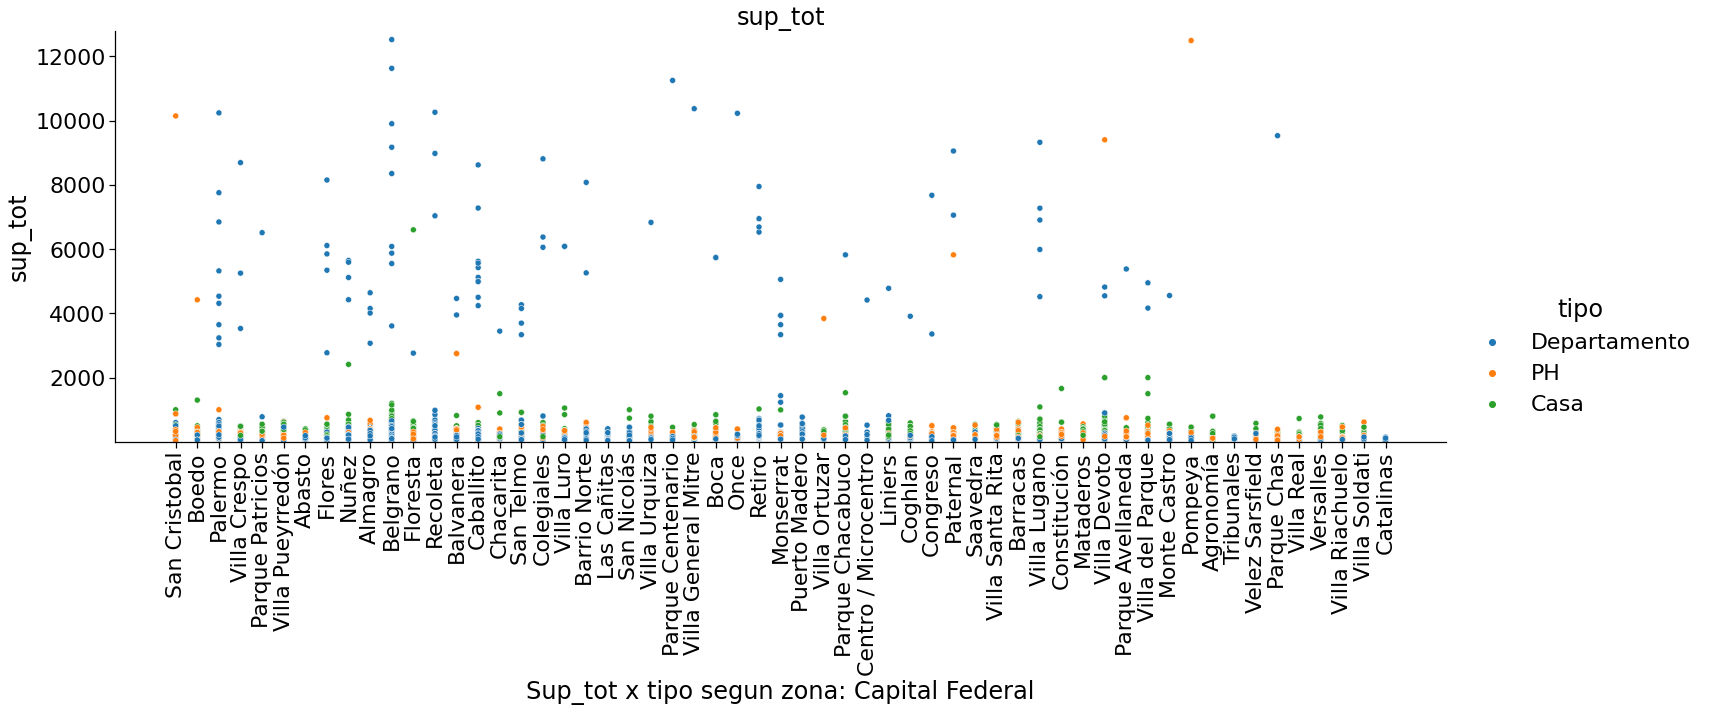

In [ ]:
plt.figure(figsize=(400,200))
sea.pairplot(data2,x_vars=['barrio'],y_vars=['sup_tot'],hue='tipo',height=7, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(10.000000,12800.0000000) 
plt.xlabel('Sup_tot x tipo segun zona: Capital Federal')
plt.title('sup_tot') 

In [ ]:
data2.describe()

lat           lon  ...        sup_cub         price
count  86951.000000  86937.000000  ...   82250.000000  9.148500e+04
mean     -34.599081    -58.436002  ...      94.966310  2.595003e+05
std        0.023957      0.036297  ...     778.515243  3.222654e+05
min      -34.696419    -58.530468  ...       1.000000  6.000000e+03
25%      -34.613757    -58.459605  ...      44.000000  1.200000e+05
50%      -34.599446    -58.433789  ...      63.000000  1.750000e+05
75%      -34.584148    -58.410143  ...      96.000000  2.790000e+05
max      -34.535818    -58.353930  ...  126062.000000  3.243423e+07

[8 rows x 8 columns]

### 1.2.3 Sup_cub x tipo segun zona

Text(0.5, 1.0, 'sup_cub')

<Figure size 28800x14400 with 0 Axes>

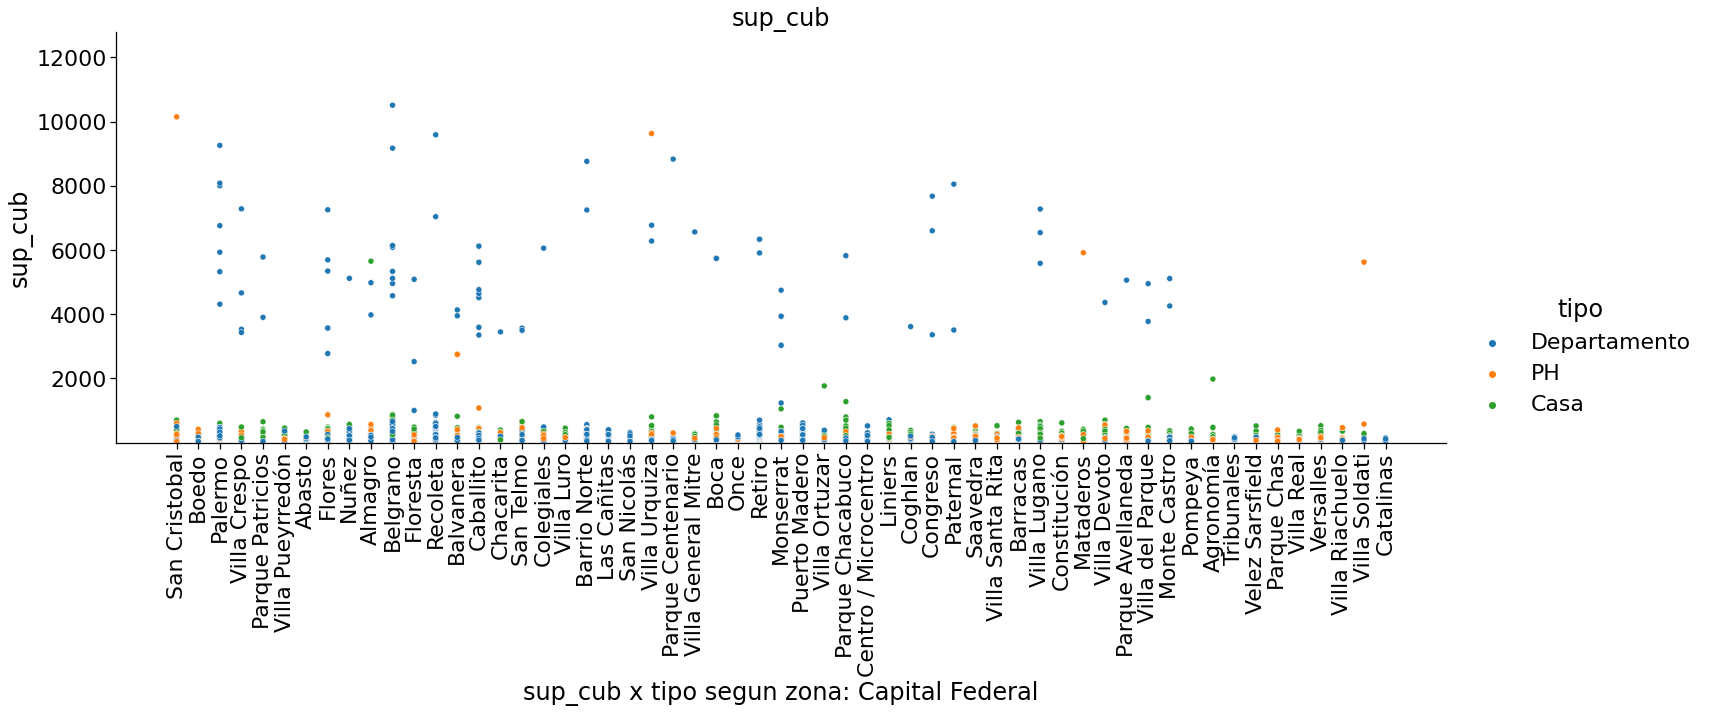

In [ ]:
plt.figure(figsize=(400,200))
sea.pairplot(data2,x_vars=['barrio'],y_vars=['sup_cub'],hue='tipo',height=7, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(1.000000,12800.000000)
plt.xlabel('sup_cub x tipo segun zona: Capital Federal')
plt.title('sup_cub') 

In [ ]:
data2.describe()

lat           lon  ...        sup_cub         price
count  86951.000000  86937.000000  ...   82250.000000  9.148500e+04
mean     -34.599081    -58.436002  ...      94.966310  2.595003e+05
std        0.023957      0.036297  ...     778.515243  3.222654e+05
min      -34.696419    -58.530468  ...       1.000000  6.000000e+03
25%      -34.613757    -58.459605  ...      44.000000  1.200000e+05
50%      -34.599446    -58.433789  ...      63.000000  1.750000e+05
75%      -34.584148    -58.410143  ...      96.000000  2.790000e+05
max      -34.535818    -58.353930  ...  126062.000000  3.243423e+07

[8 rows x 8 columns]

### 1.2.4 Rooms x tipo según zona

Text(0.5, 1.0, 'ambientes')

<Figure size 28800x14400 with 0 Axes>

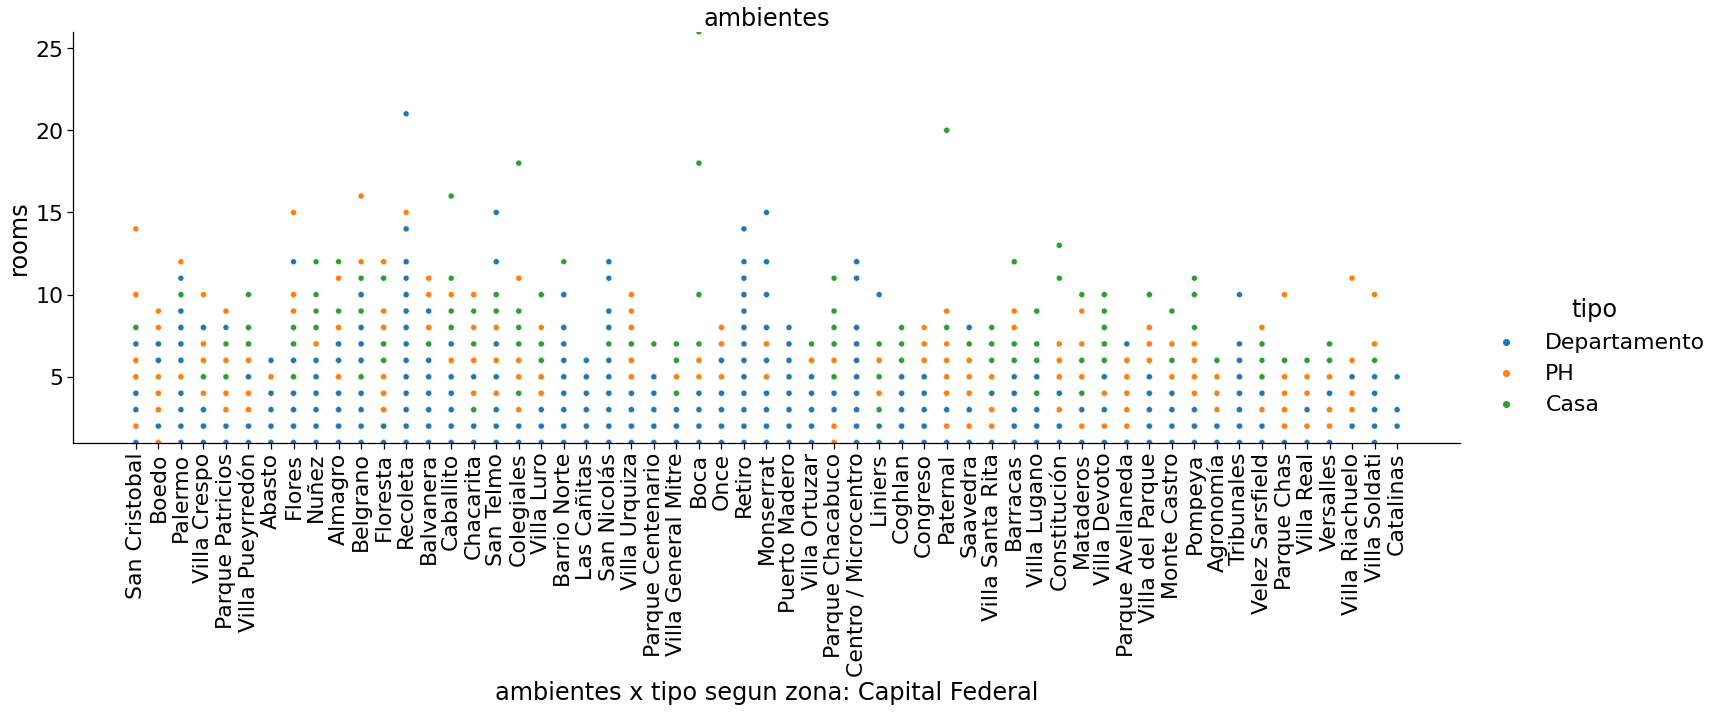

In [ ]:
plt.figure(figsize=(400,200))
sea.pairplot(data2,x_vars=['barrio'],y_vars=['rooms'],hue='tipo',height=7, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(1.000000 , 26.000000 )
plt.xlabel('ambientes x tipo segun zona: Capital Federal')
plt.title('ambientes') 


####MOVER TITULO

### 1.2.5 Bedrooms x tipo según zona

In [ ]:
data2.describe()

lat           lon  ...        sup_cub         price
count  86951.000000  86937.000000  ...   82250.000000  9.148500e+04
mean     -34.599081    -58.436002  ...      94.966310  2.595003e+05
std        0.023957      0.036297  ...     778.515243  3.222654e+05
min      -34.696419    -58.530468  ...       1.000000  6.000000e+03
25%      -34.613757    -58.459605  ...      44.000000  1.200000e+05
50%      -34.599446    -58.433789  ...      63.000000  1.750000e+05
75%      -34.584148    -58.410143  ...      96.000000  2.790000e+05
max      -34.535818    -58.353930  ...  126062.000000  3.243423e+07

[8 rows x 8 columns]

Text(0.5, 1.0, 'habitaciones')

<Figure size 28800x14400 with 0 Axes>

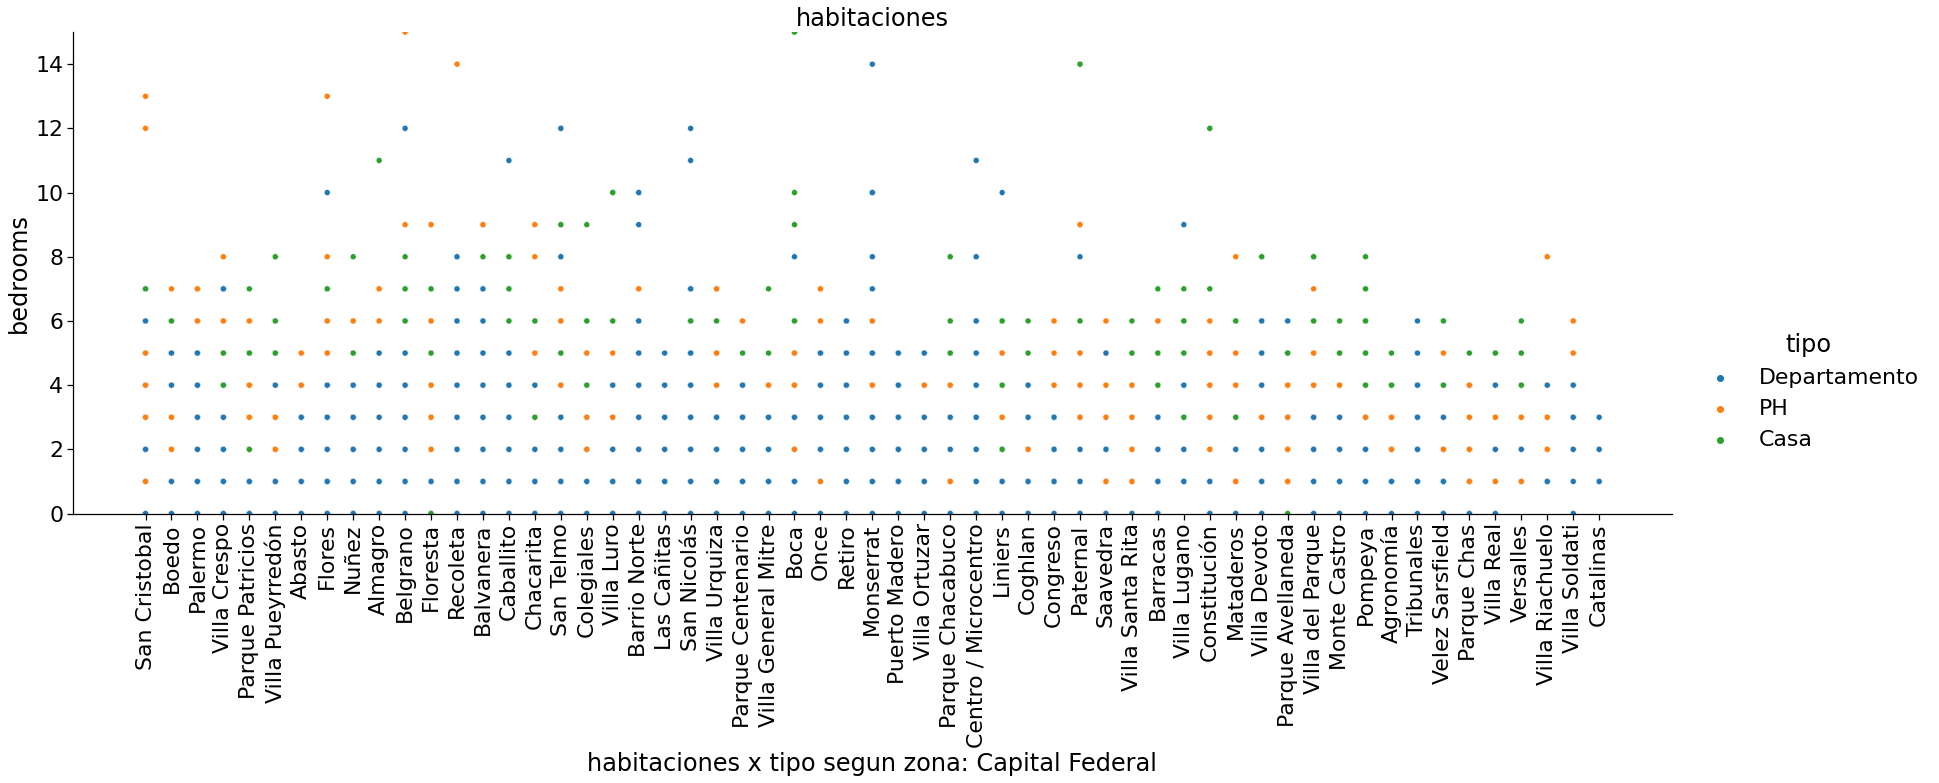

In [ ]:
plt.figure(figsize=(400,200))
sea.pairplot(data2,x_vars=['barrio'],y_vars=['bedrooms'],hue='tipo',height=8, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(0 , 15.000000)
plt.xlabel('habitaciones x tipo segun zona: Capital Federal')
plt.title('habitaciones') 

### 1.2.6 Bathrooms x tipo según zona

In [ ]:
data2.describe()

lat           lon  ...        sup_cub         price
count  86951.000000  86937.000000  ...   82250.000000  9.148500e+04
mean     -34.599081    -58.436002  ...      94.966310  2.595003e+05
std        0.023957      0.036297  ...     778.515243  3.222654e+05
min      -34.696419    -58.530468  ...       1.000000  6.000000e+03
25%      -34.613757    -58.459605  ...      44.000000  1.200000e+05
50%      -34.599446    -58.433789  ...      63.000000  1.750000e+05
75%      -34.584148    -58.410143  ...      96.000000  2.790000e+05
max      -34.535818    -58.353930  ...  126062.000000  3.243423e+07

[8 rows x 8 columns]

Text(0.5, 1.0, 'baños')

<Figure size 28800x28800 with 0 Axes>

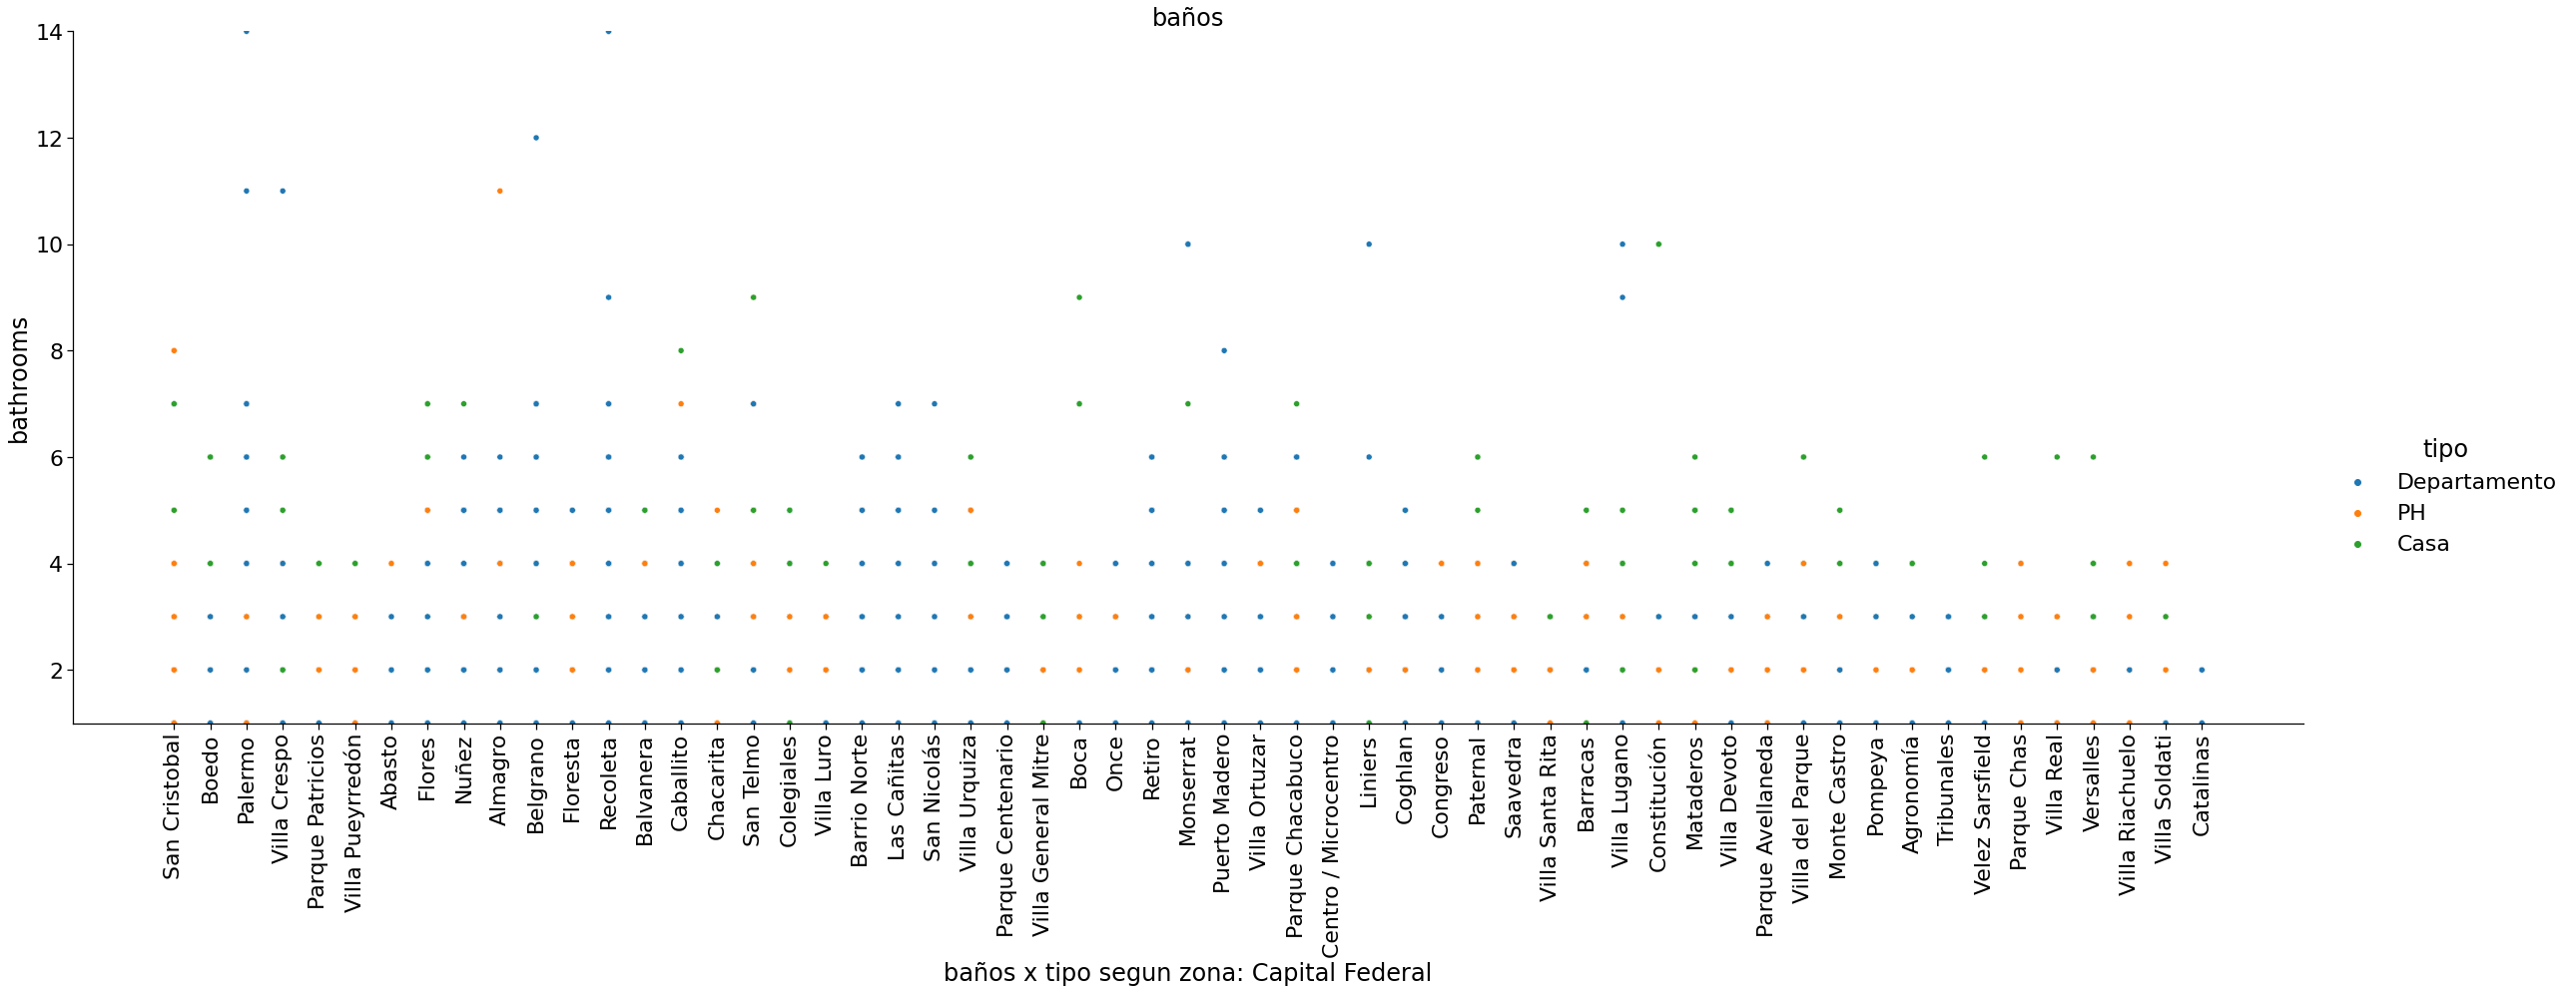

In [ ]:
plt.figure(figsize=(400,400))
sea.pairplot(data2,x_vars=['barrio'],y_vars=['bathrooms'],hue='tipo',height=11, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(1.000000 , 14.000000 )
plt.xlabel('baños x tipo segun zona: Capital Federal')
plt.title('baños') 

### 1.2.7 Latitud x tipo según zona

Text(0.5, 1.0, 'Latitud')

<Figure size 28800x14400 with 0 Axes>

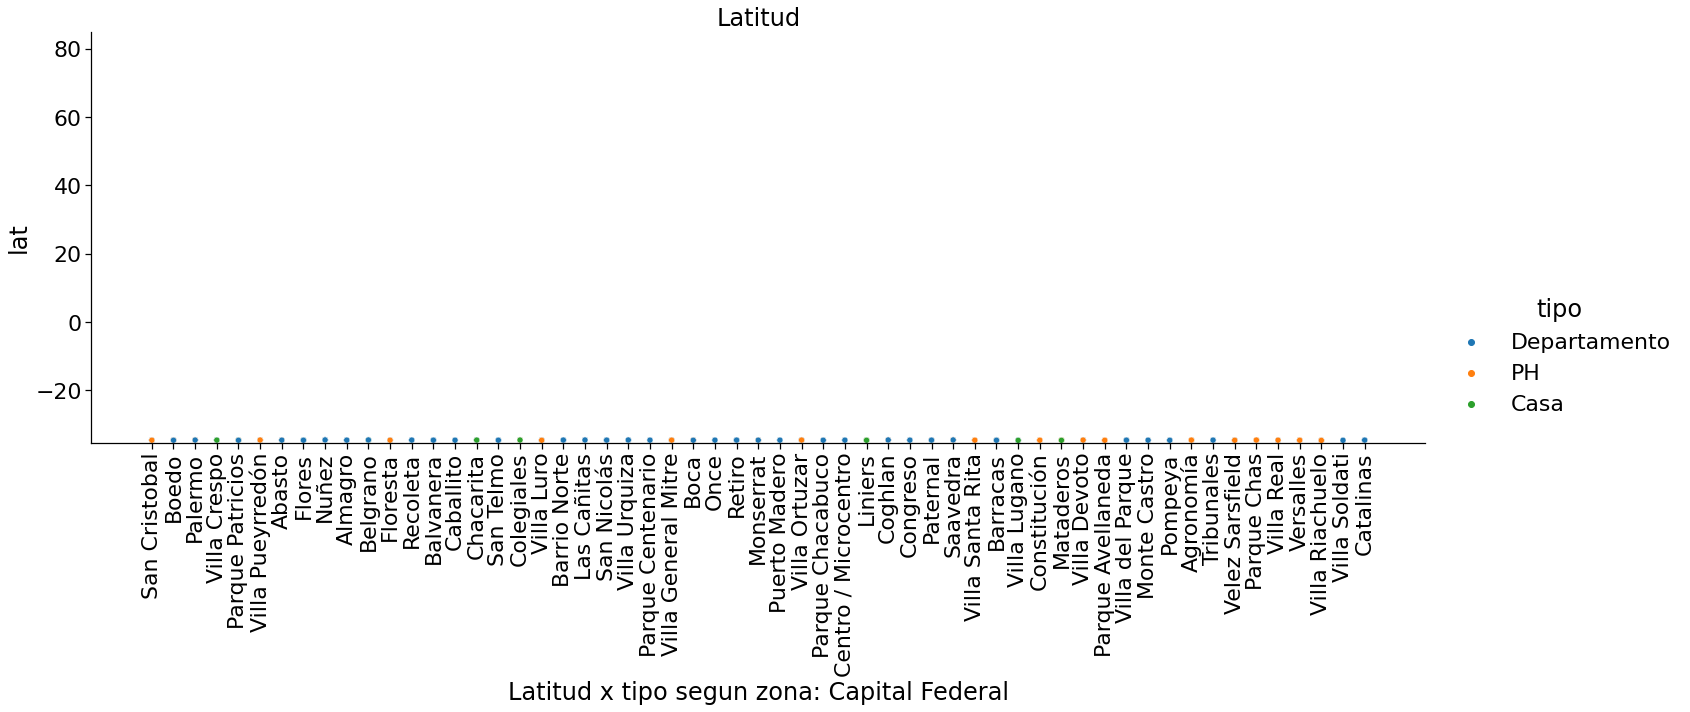

In [ ]:
#plt.figure(figsize=(400,200,1))

plt.figure(figsize = (400,200))
sea.pairplot(data2,x_vars=['barrio'],y_vars=['lat'],hue='tipo',height=7, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(-35.318457 ,85.051129 	)
plt.xlabel('Latitud x tipo segun zona: Capital Federal')
plt.title('Latitud') 

### 1.2.8 Longitud x tipo según zona

Text(0.5, 1.0, 'Longitud')

<Figure size 28800x14400 with 0 Axes>

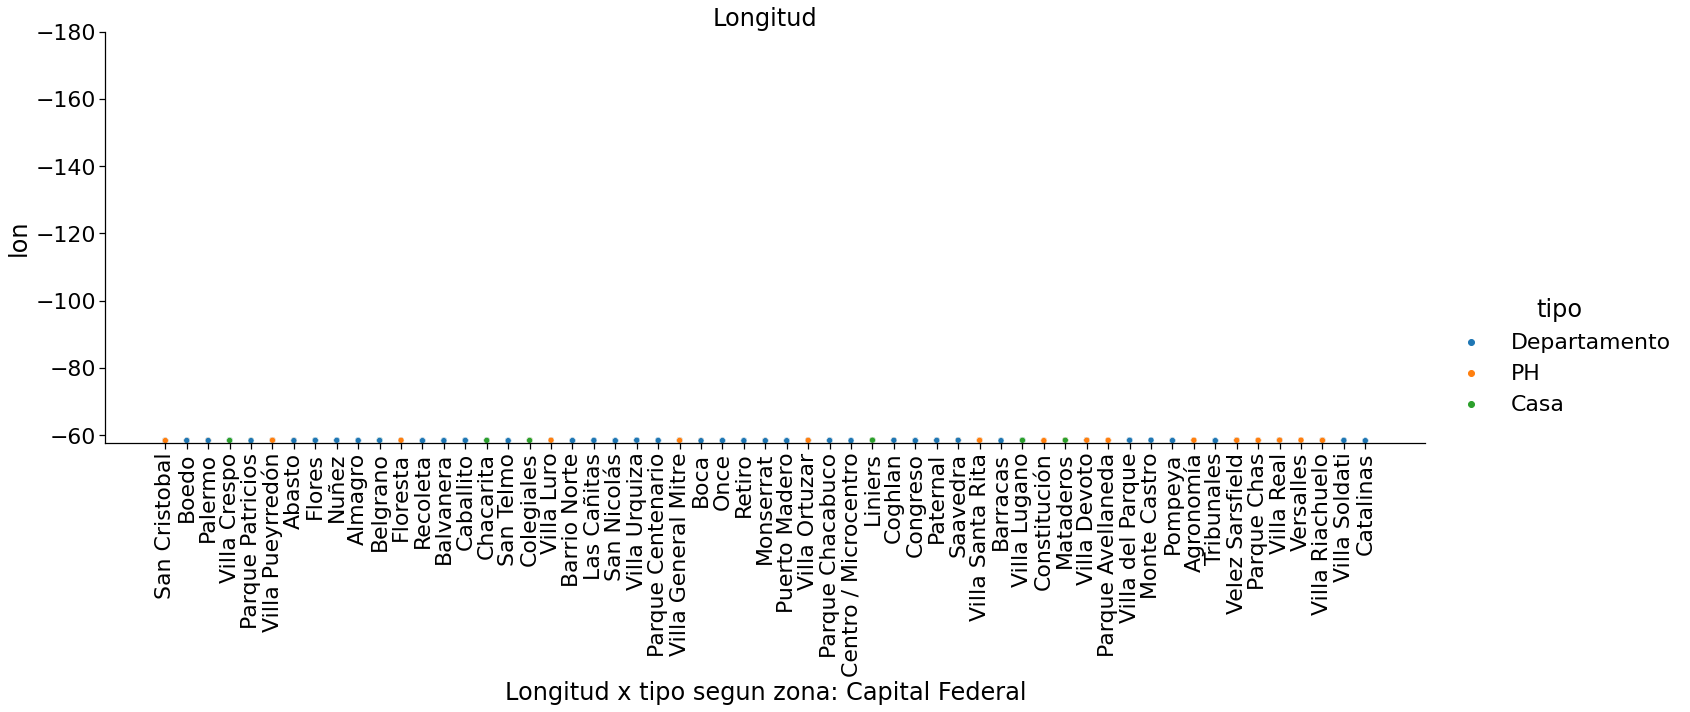

In [ ]:
plt.figure(figsize = (400,200))
sea.pairplot(data2,x_vars=['barrio'],y_vars=['lon'],hue='tipo',height=7, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(-57.805832 , -180.000000)
plt.xlabel('Longitud x tipo segun zona: Capital Federal')
plt.title('Longitud') 

### Distribuciones de precio por tipo según zona  

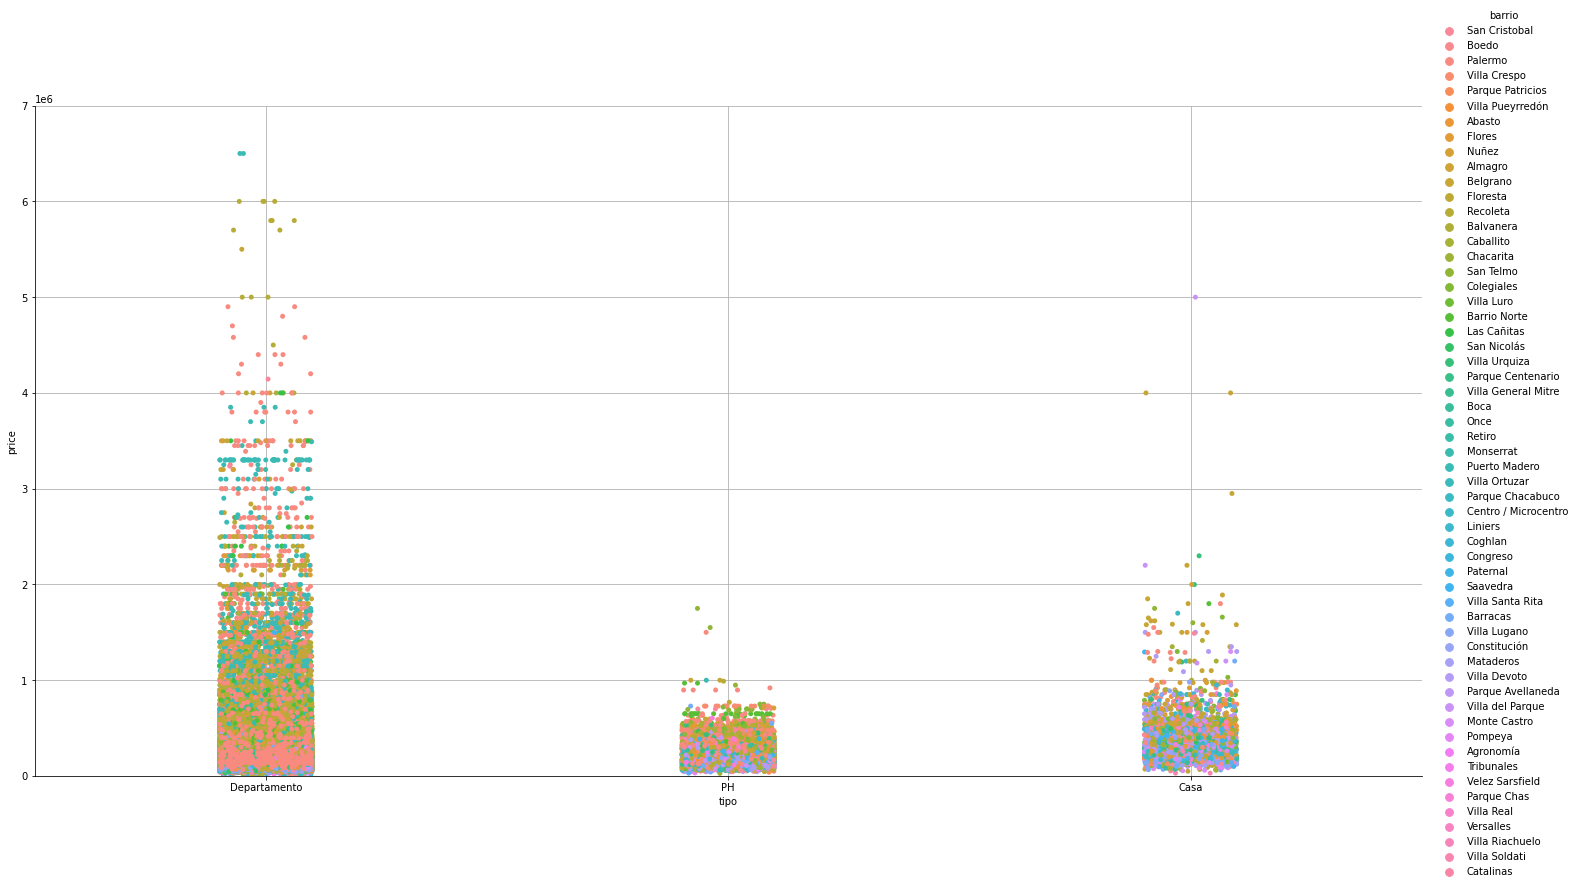

In [ ]:
sea.catplot(x='tipo', y='price', data=data2, height =10, aspect=2, hue='barrio') 
sea.set_context("notebook", font_scale=2, rc={"lines.linewidth":2.5})
plt.ylim(0,7000000)
plt.grid(True)
#plt.title('Precios Capital Federal segun tipo y barrio')
plt.rcParams['figure.figsize']=50,50

In [ ]:
import seaborn as sea
data[data.tipo.isin(['Departamento']) & data.zona.isin(['Capital Federal'])]
data3 = data[data.tipo.isin(['Departamento']) & data.zona.isin(['Capital Federal'])]
data3.head()

lat  ...          tipo
0  -34.605880  ...  Departamento
11 -34.603683  ...  Departamento
12 -34.630349  ...  Departamento
20 -34.608246  ...  Departamento
21 -34.603890  ...  Departamento

[5 rows x 13 columns]

In [ ]:
data3.describe()

lat           lon  ...        sup_cub         price
count  74782.000000  74771.000000  ...   70315.000000  7.902900e+04
mean     -34.597582    -58.433009  ...      86.041357  2.597756e+05
std        0.022952      0.035035  ...     497.058462  3.389683e+05
min      -34.694366    -58.530467  ...       1.000000  6.000000e+03
25%      -34.611879    -58.454965  ...      43.000000  1.190000e+05
50%      -34.598347    -58.431504  ...      60.000000  1.700000e+05
75%      -34.582854    -58.407354  ...      87.000000  2.690000e+05
max      -34.535818    -58.354919  ...  104890.000000  3.243423e+07

[8 rows x 8 columns]

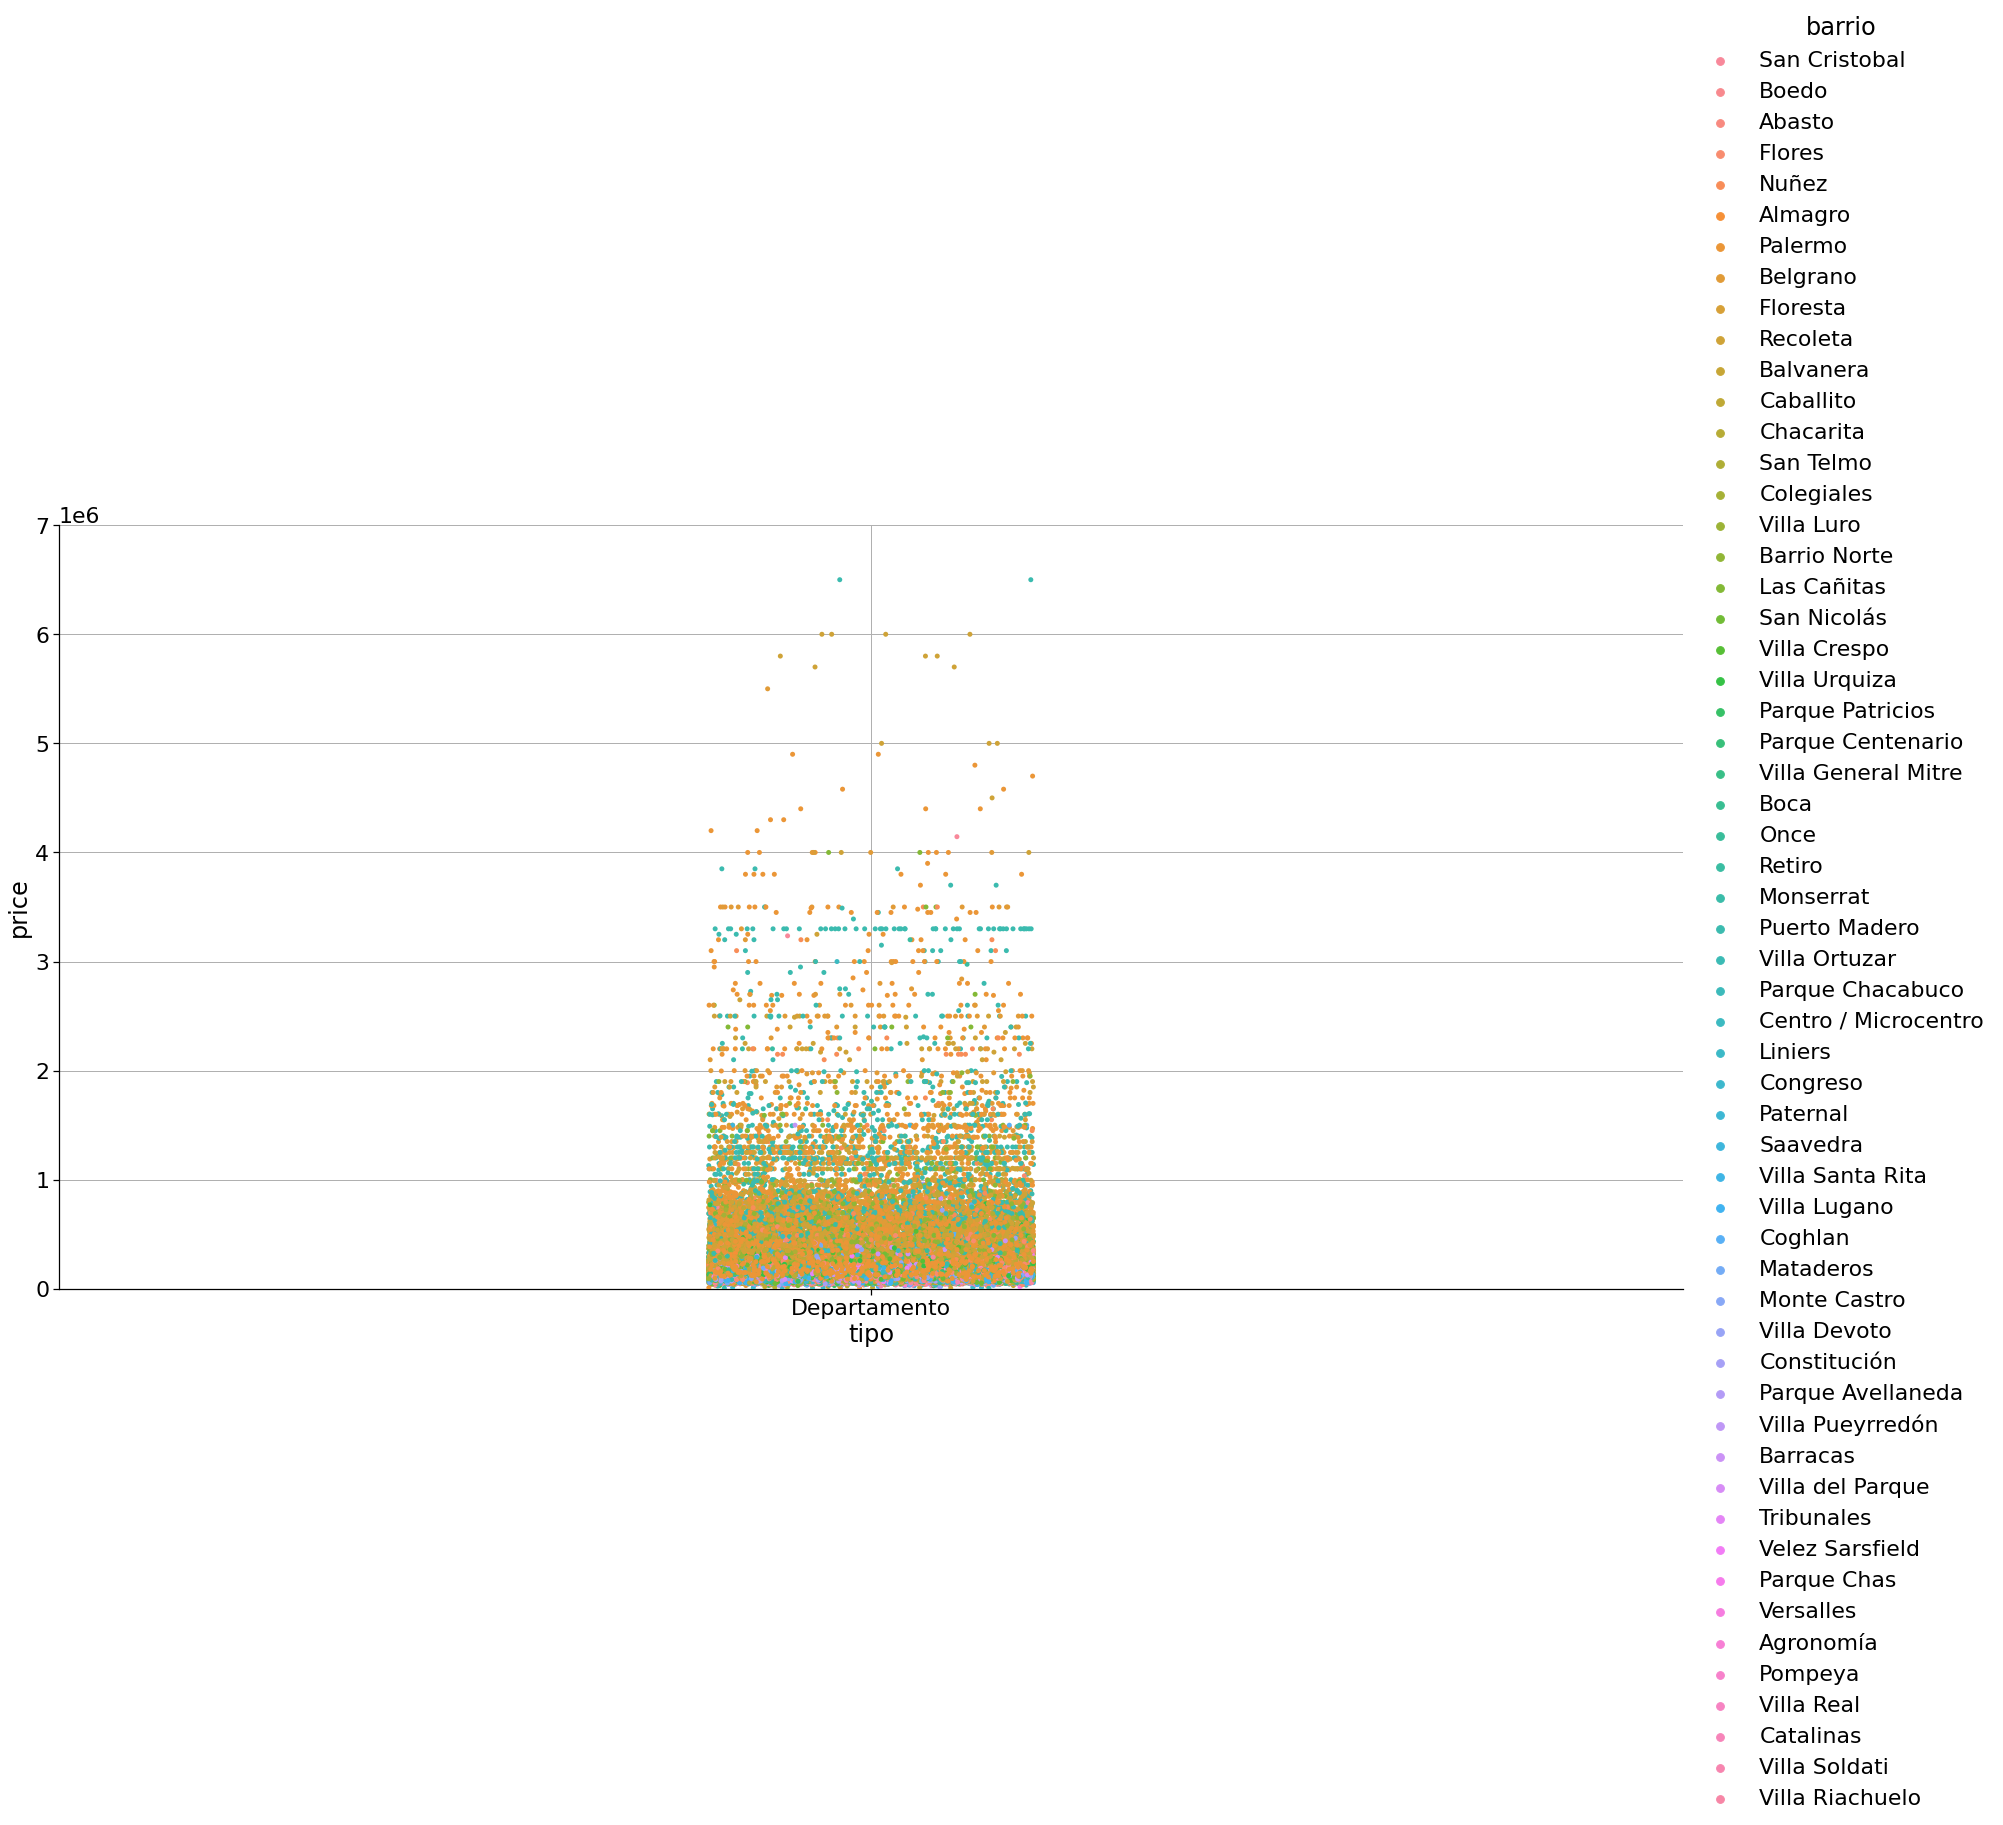

In [ ]:
#precios departamentos segun barrio seleccion Capital Federal

sea.catplot(x='tipo', y='price', data=data3, height =12, aspect=2, hue='barrio') 
sea.set_context("notebook", font_scale=2, rc={"lines.linewidth":2.5})
plt.ylim(0,7000000)
plt.grid(True)
#plt.title('Precios Capital Federal segun tipo y barrio')
plt.rcParams['figure.figsize']=50,50

In [ ]:
#precios casas segun barrio (Capital Federal)
import seaborn as sea
data[data.tipo.isin(['Casa']) & data.zona.isin(['Capital Federal'])]
data4 = data[data.tipo.isin(['Casa']) & data.zona.isin(['Capital Federal'])]
data4.head()

lat  ...  tipo
336 -34.620739  ...  Casa
384 -34.650923  ...  Casa
385 -34.587854  ...  Casa
446 -34.613369  ...  Casa
454 -34.653948  ...  Casa

[5 rows x 13 columns]

In [ ]:
data4.describe()

lat          lon  ...       sup_cub         price
count  2639.000000  2637.000000  ...   2244.000000  2.692000e+03
mean    -34.613949   -58.468669  ...    220.174688  3.975569e+05
std       0.033450     0.037913  ...    400.143563  2.869463e+05
min     -34.696419   -58.530468  ...     25.000000  3.000000e+04
25%     -34.638954   -58.498602  ...    127.000000  2.400000e+05
50%     -34.617051   -58.472529  ...    179.000000  3.300000e+05
75%     -34.588359   -58.445357  ...    260.000000  4.800000e+05
max     -34.536165   -58.359929  ...  17220.000000  5.000000e+06

[8 rows x 8 columns]

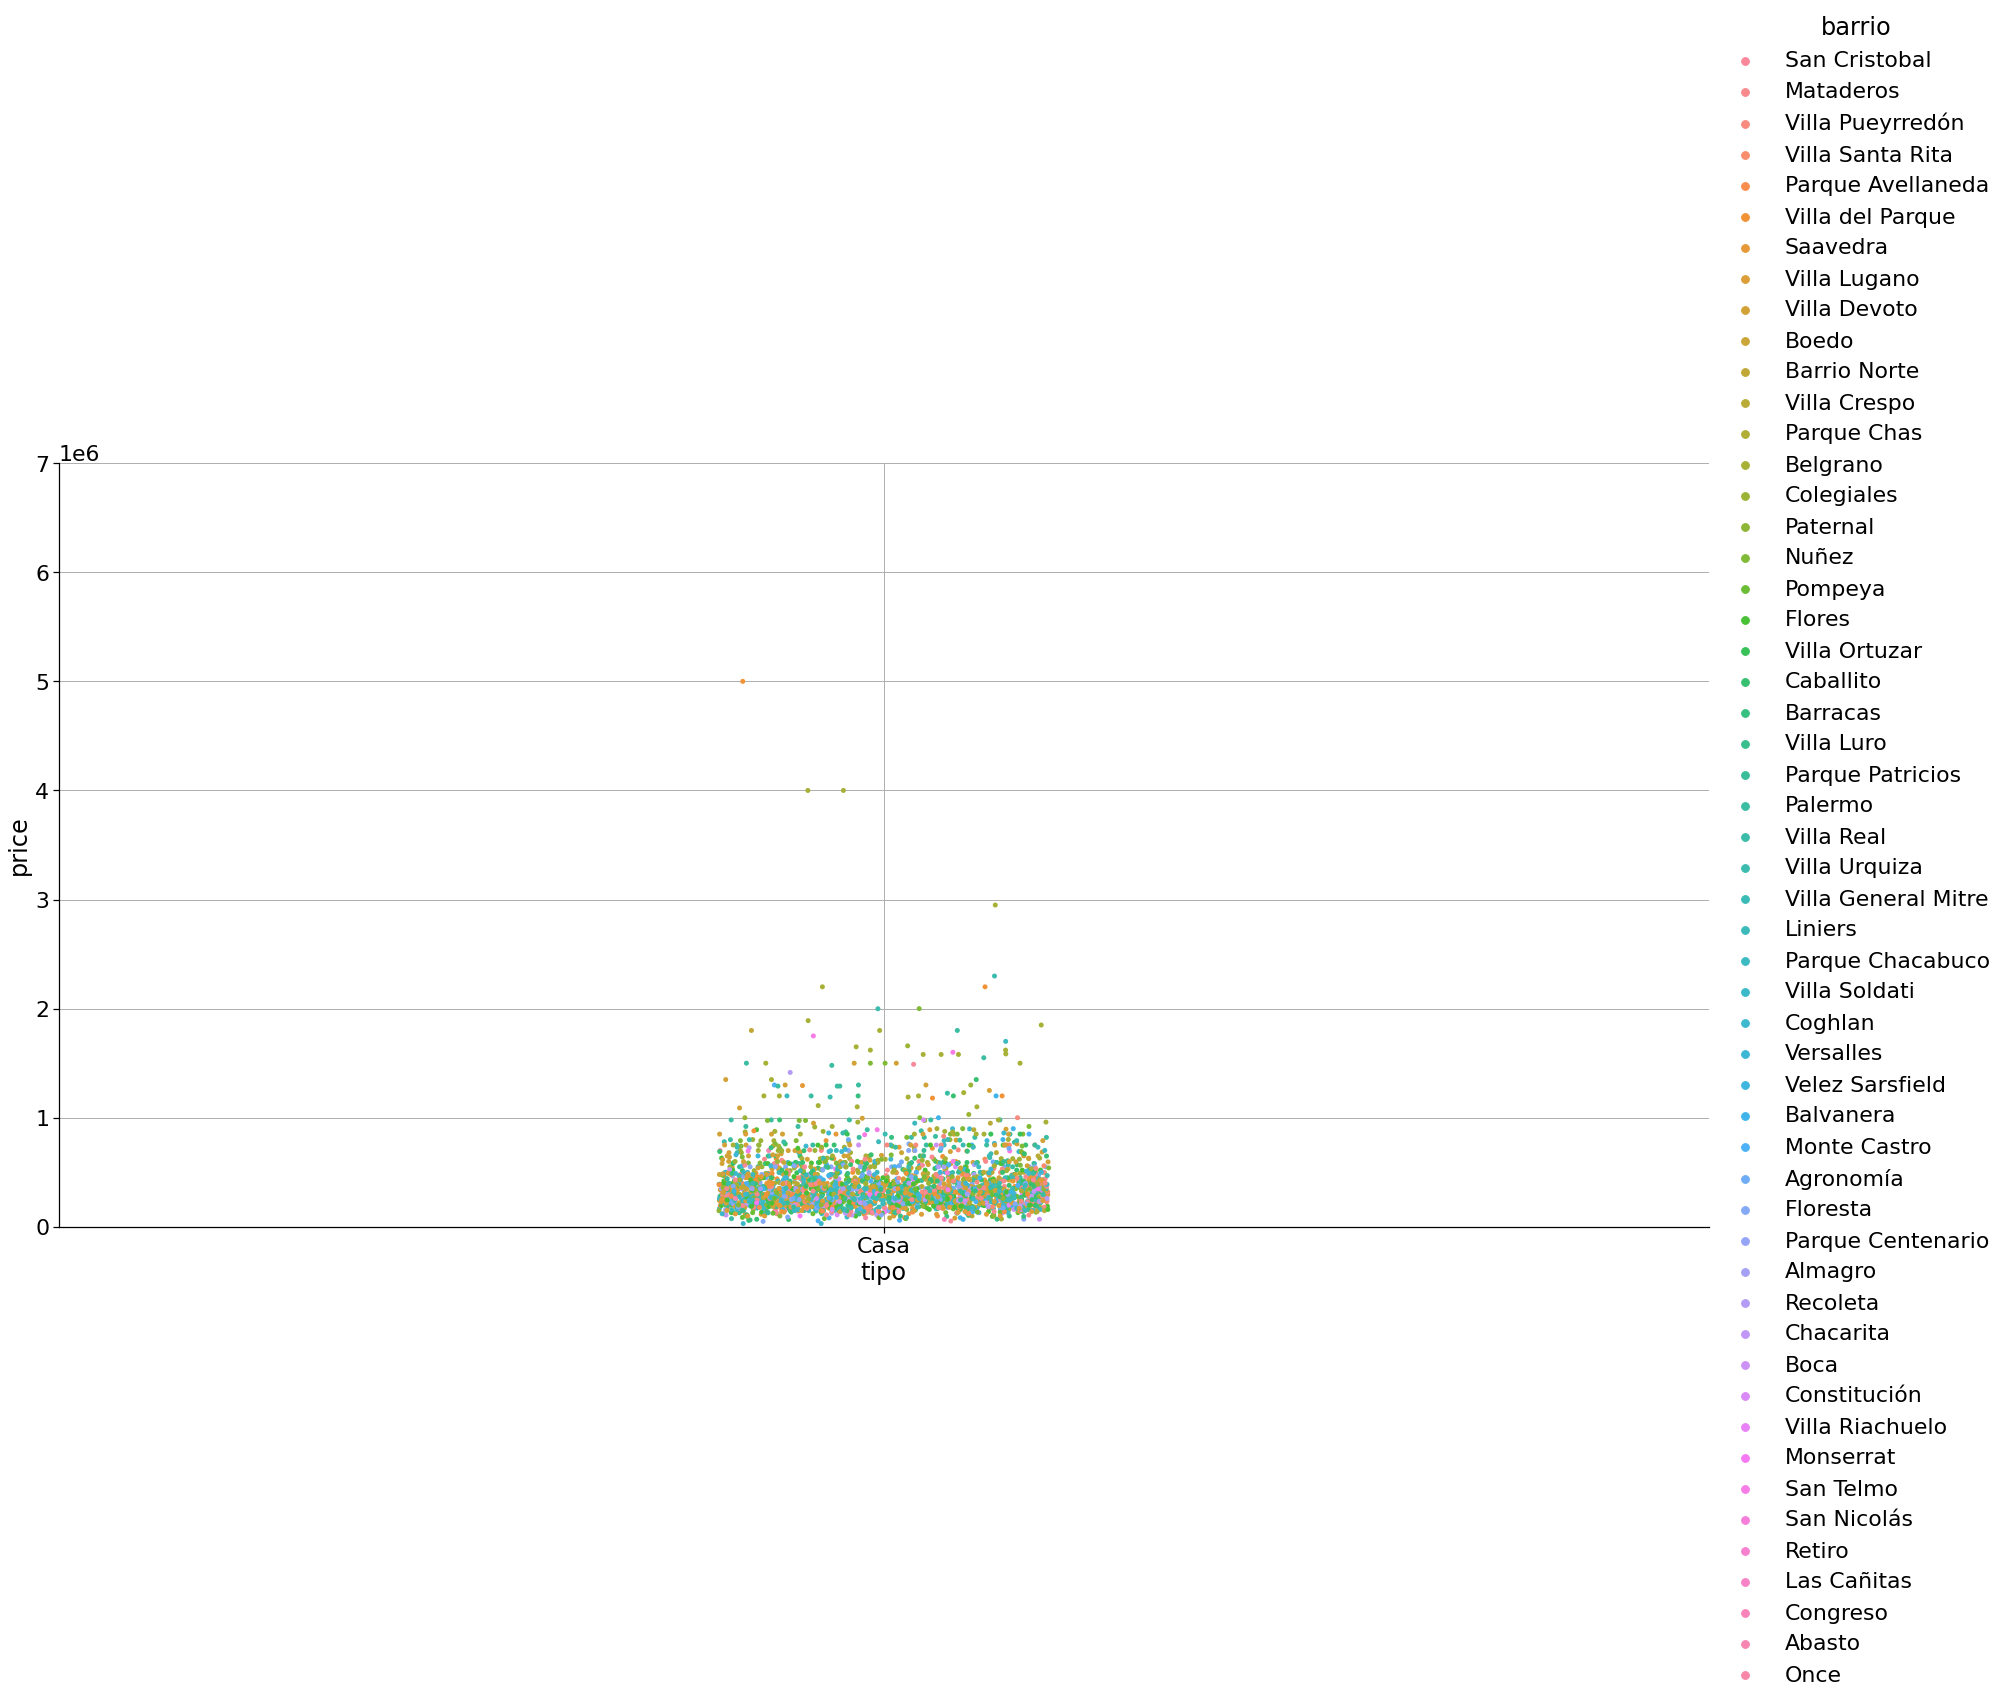

In [ ]:
sea.catplot(x='tipo', y='price', data=data4, height =12, aspect=2, hue='barrio') 
sea.set_context("notebook", font_scale=2, rc={"lines.linewidth":2.5})
plt.ylim(0,7000000)
plt.grid(True)
#plt.title('Precios Capital Federal segun tipo y barrio')
plt.rcParams['figure.figsize']=50,50

In [ ]:
#precio PH segun barrios (Capital Federal)
import seaborn as sea
data[data.tipo.isin(['PH']) & data.zona.isin(['Capital Federal'])]
data5 = data[data.tipo.isin(['PH']) & data.zona.isin(['Capital Federal'])]
data5.head()

lat        lon  ...                                        description tipo
1 -34.624056 -58.412110  ...   PH reciclado en Boedo a una cuadra de la plaz...   PH
2 -34.593569 -58.427474  ...  2 ambienets amplio , excelente estado , patio ...   PH
3 -34.581294 -58.436754  ...  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...   PH
5 -34.593779 -58.441239  ...  Excelente ph solo 2 unidades, no paga expensas...   PH
6 -34.600988 -58.433061  ...  Muy lindo PH, con terraza propia, 96m2! por es...   PH

[5 rows x 13 columns]

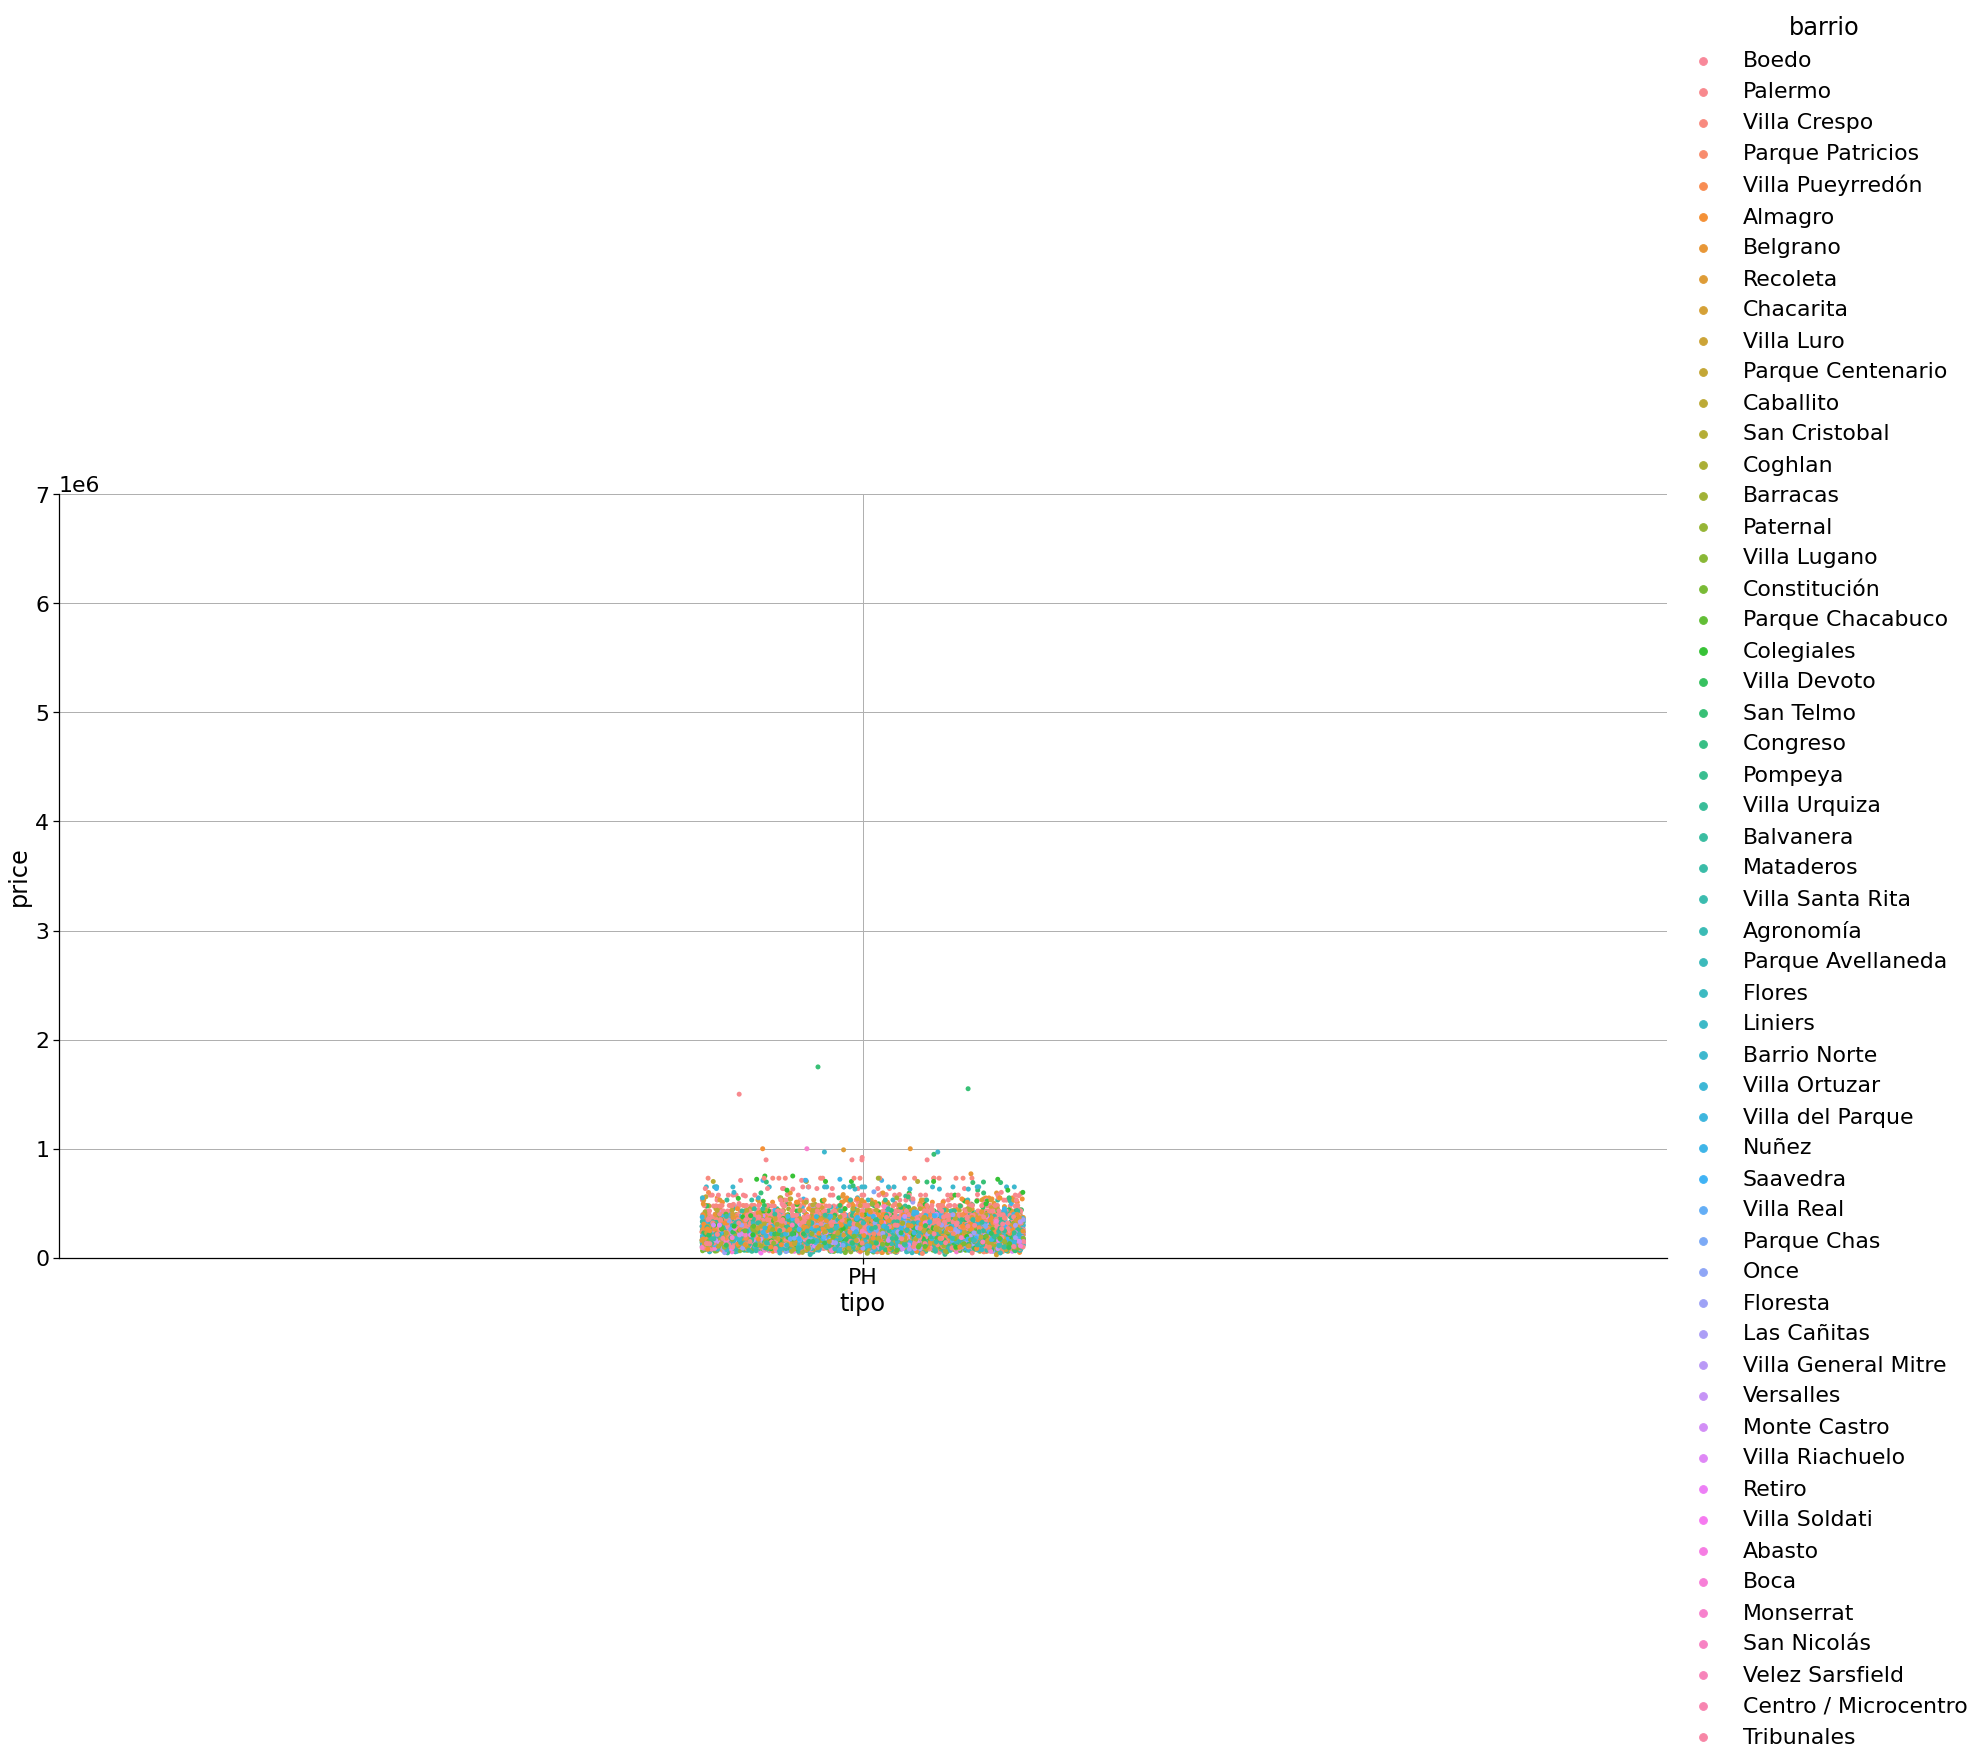

In [ ]:
sea.catplot(x='tipo', y='price', data=data5, height =12, aspect=2, hue='barrio') 
sea.set_context("notebook", font_scale=2, rc={"lines.linewidth":2.5})
plt.ylim(0,7000000)
plt.grid(True)
#plt.title('Precios Capital Federal segun tipo y barrio')
plt.rcParams['figure.figsize']=50,50

Distribucion variables cuantitativas

Text(0.5, 1.0, 'Precio')

<Figure size 28800x14400 with 0 Axes>

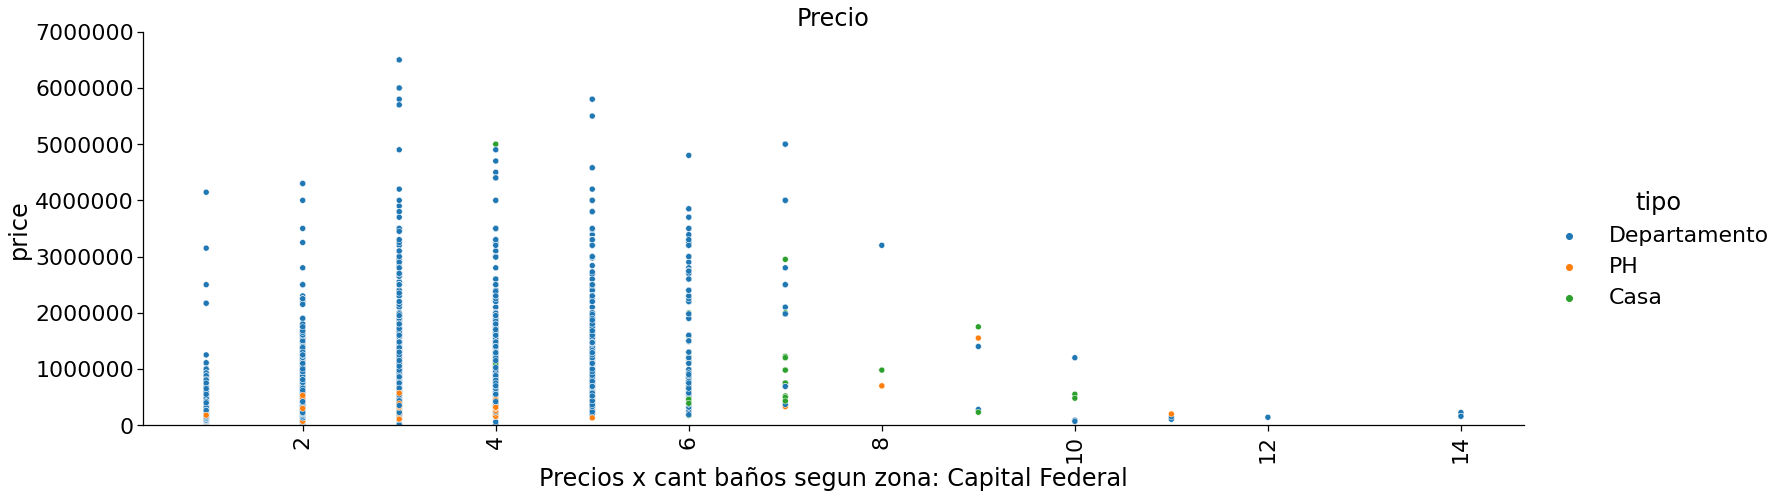

In [ ]:
plt.figure(figsize=(400,200))
sea.pairplot(data2,x_vars=['bathrooms'],y_vars=['price'],hue='tipo',height=7, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(0,7000000)
plt.xlabel('Precios x cant baños segun zona: Capital Federal')
plt.title('Precio') 

Text(0.5, 1.0, 'Precio x cant ambientes segun tipo: Capital Federal')

<Figure size 28800x14400 with 0 Axes>

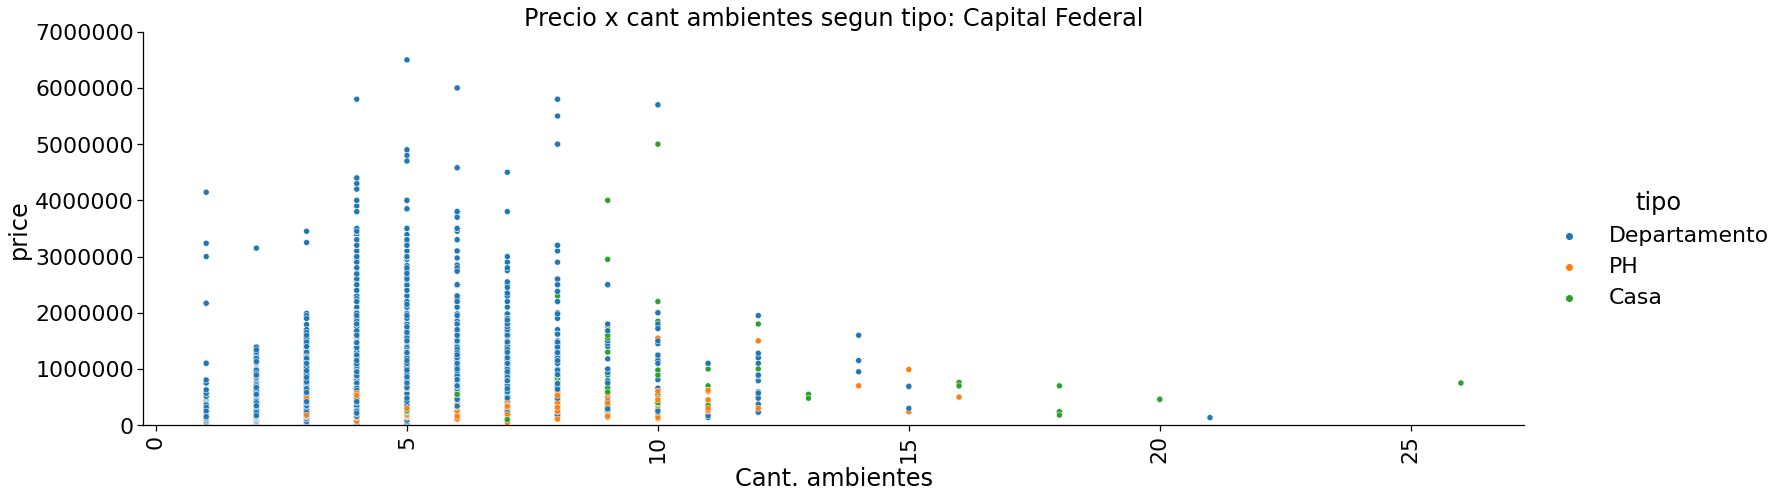

In [ ]:
plt.figure(figsize=(400,200))
sea.pairplot(data2,x_vars=['rooms'],y_vars=['price'],hue='tipo',height=7, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(0,7000000)
plt.xlabel('Cant. ambientes')
plt.title('Precio x cant ambientes segun tipo: Capital Federal') 

Text(0.5, 1.0, 'Precios x cant habitaciones segun zona: Capital Federal')

<Figure size 28800x14400 with 0 Axes>

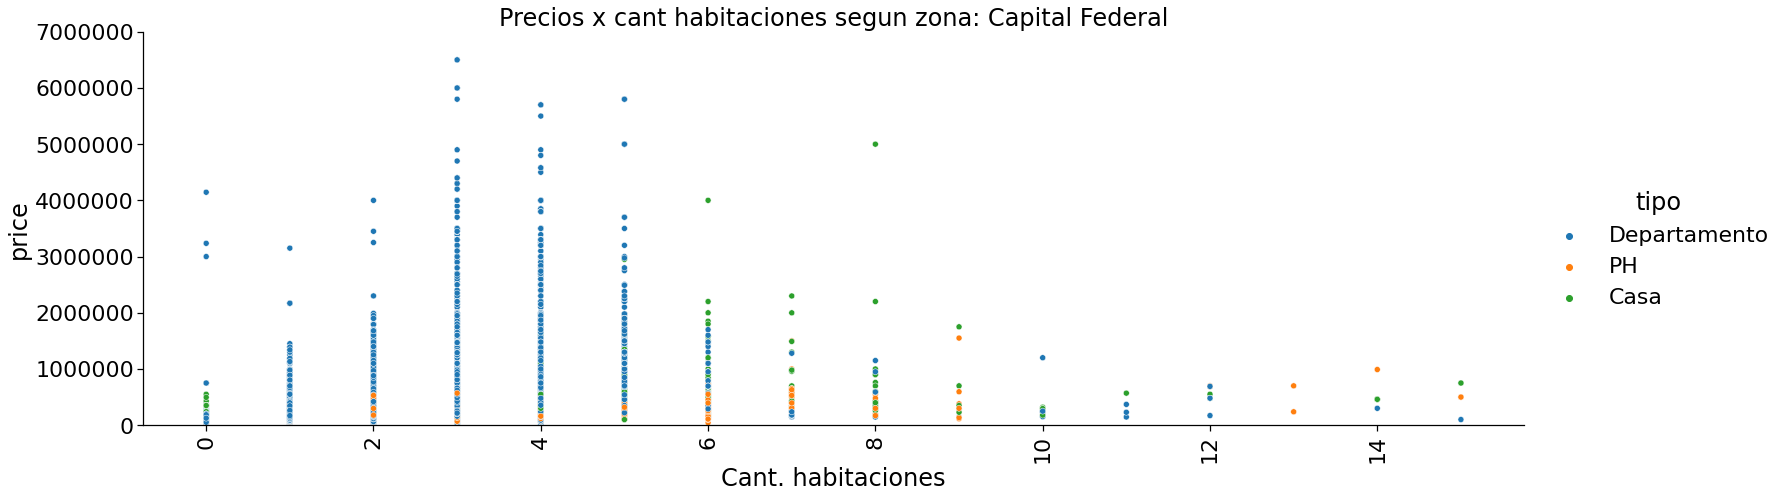

In [ ]:
plt.figure(figsize=(400,200))
sea.pairplot(data2,x_vars=['bedrooms'],y_vars=['price'],hue='tipo',height=7, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(0,7000000)
plt.xlabel('Cant. habitaciones')
plt.title('Precios x cant habitaciones segun zona: Capital Federal') 

In [ ]:
import seaborn as sea
#deptos[data2.tipo.isin(['Departamento'])
deptos = data2[data2.tipo.isin(['Departamento'])]
deptos.head()

lat  ...          tipo
0  -34.605880  ...  Departamento
11 -34.603683  ...  Departamento
12 -34.630349  ...  Departamento
20 -34.608246  ...  Departamento
21 -34.603890  ...  Departamento

[5 rows x 13 columns]

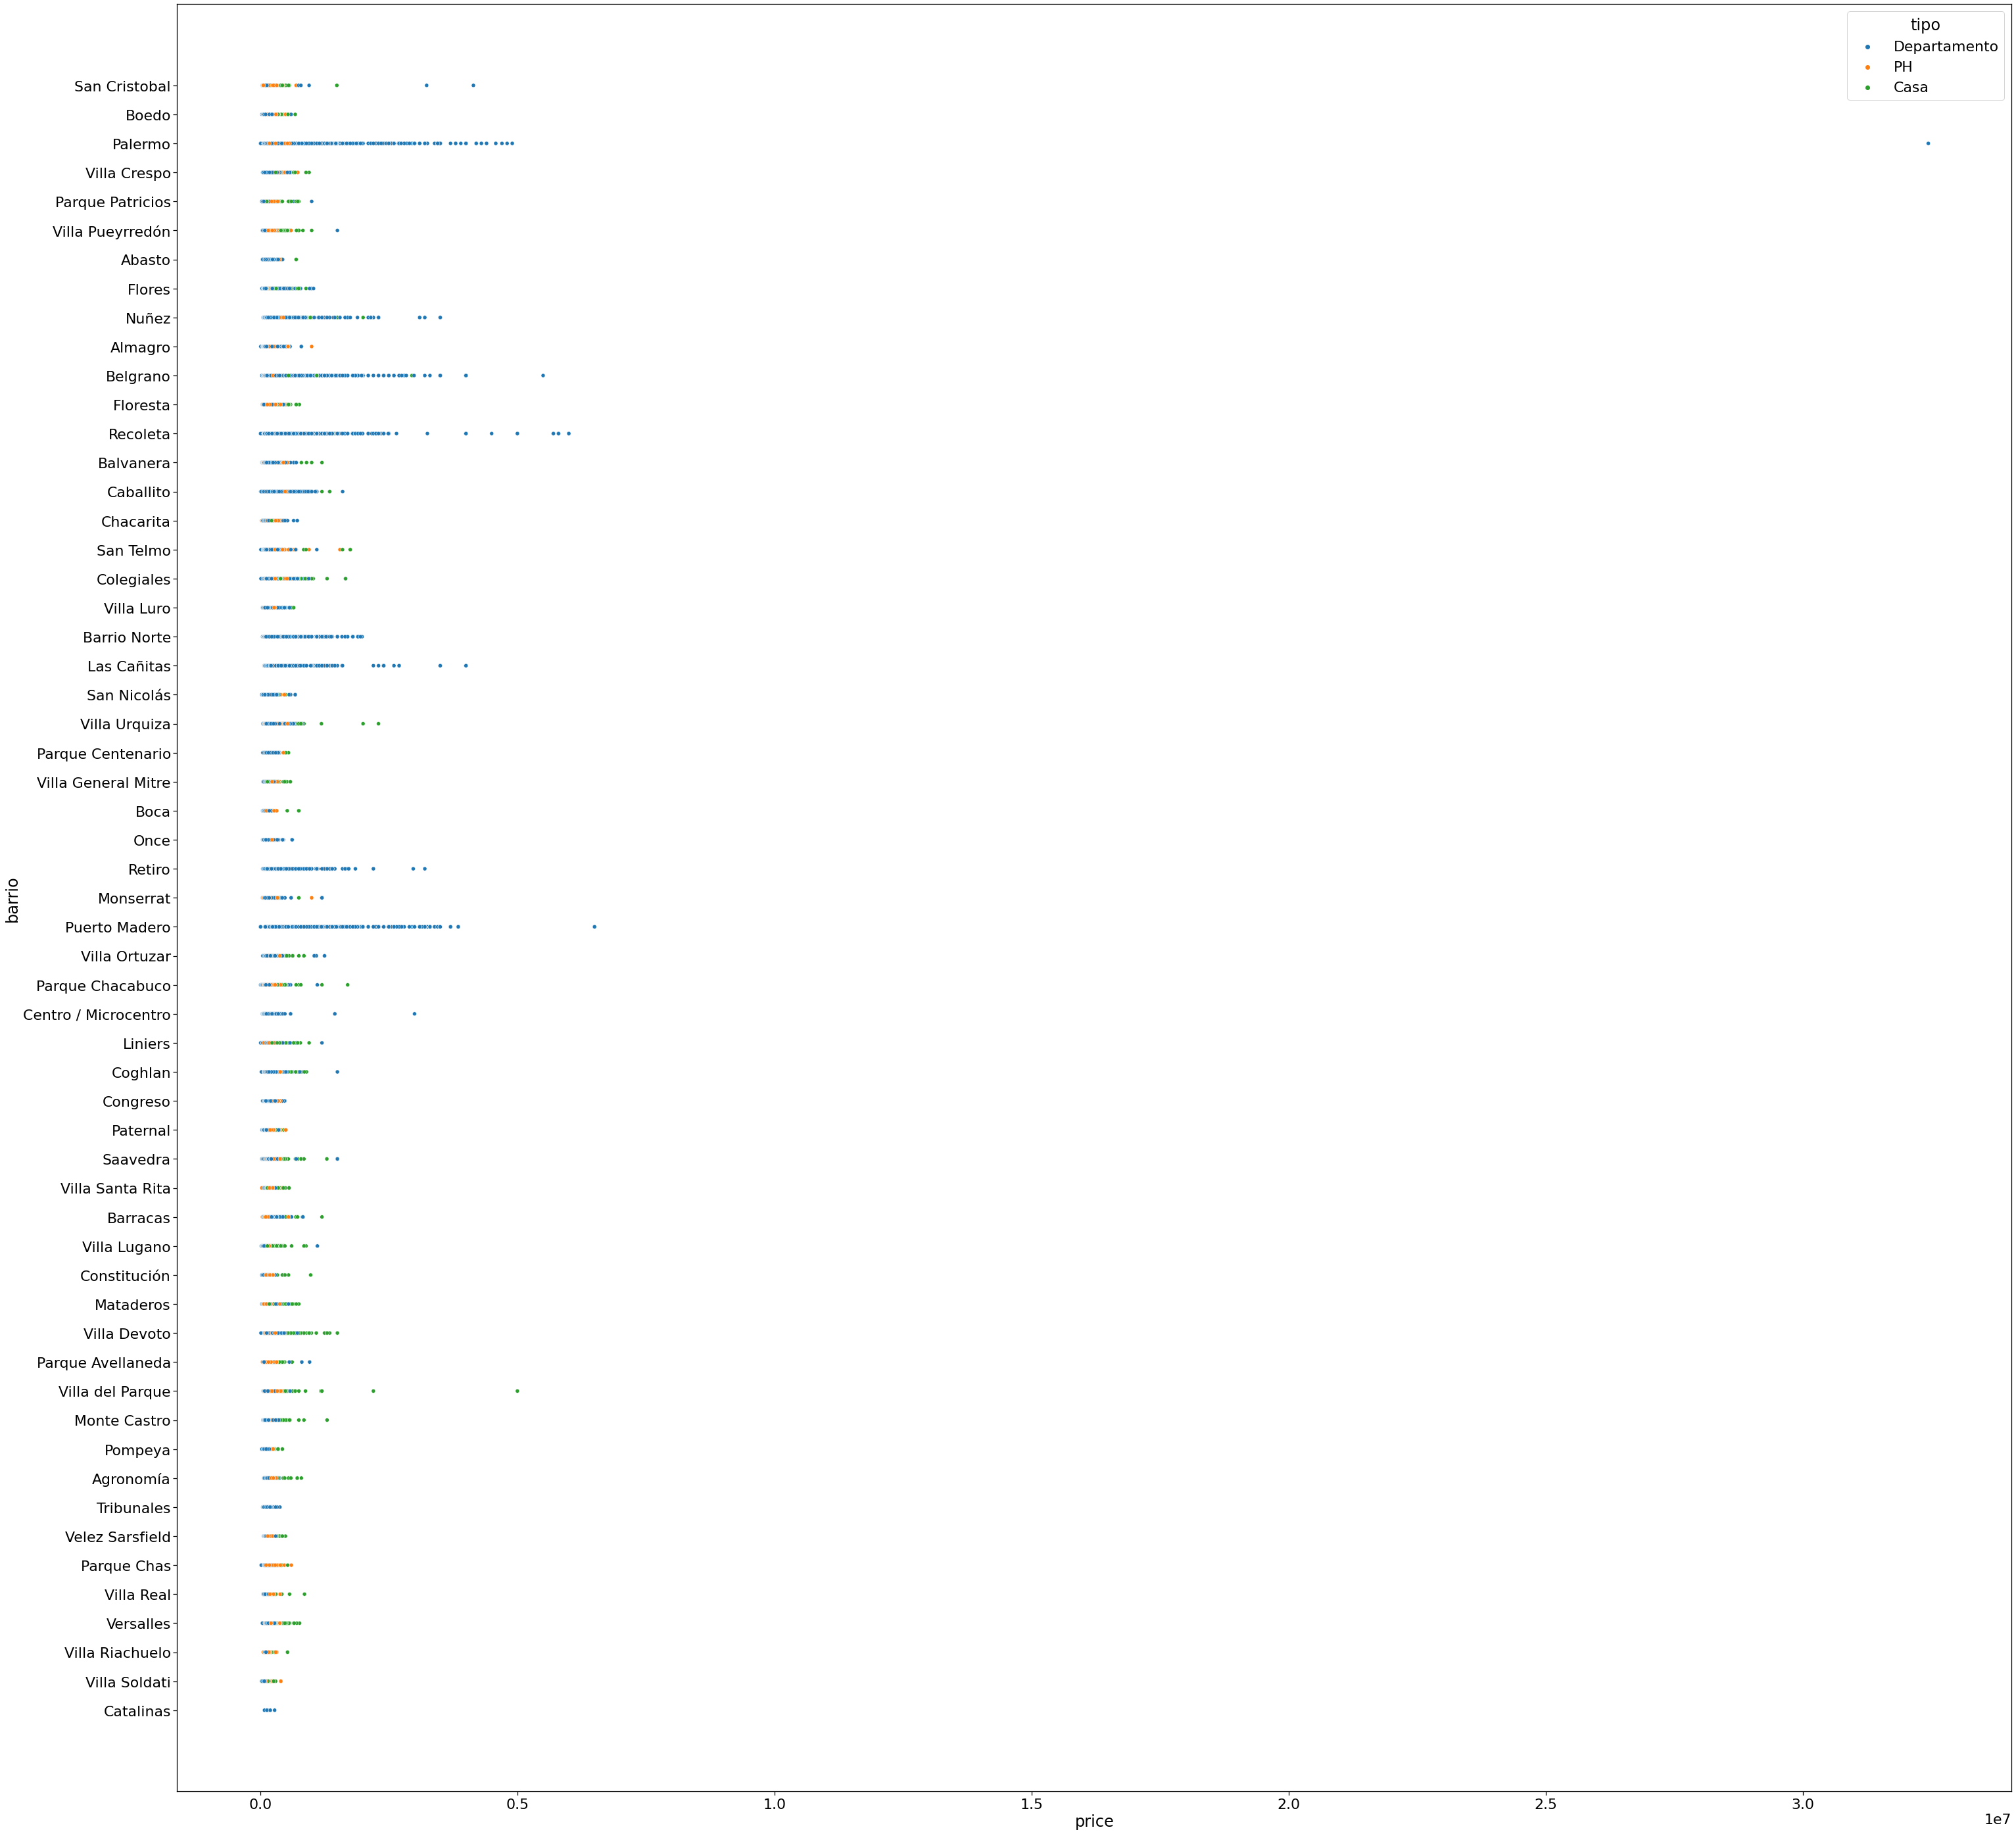

In [ ]:
#Distribucion general segun precio x barrio
sea.scatterplot(x="price", y="barrio", hue="tipo" , data=data2)

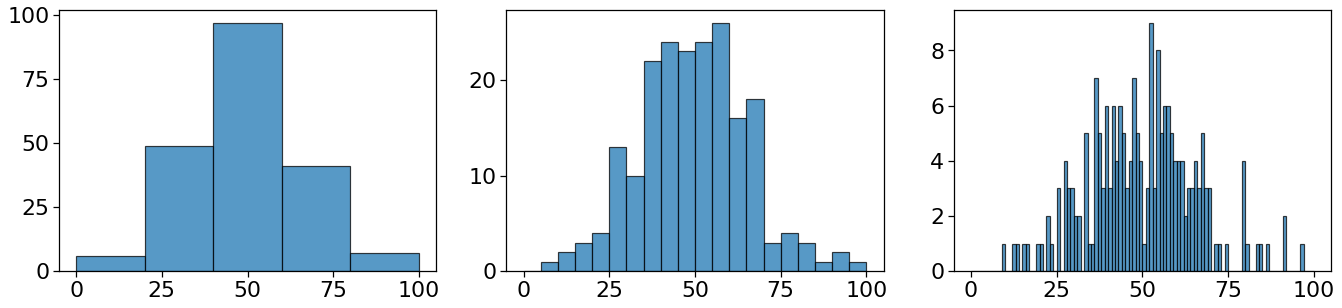

In [ ]:
muestras = np.random.normal(50,15, 200)

plt.figure(figsize = (6.4*3,4.8))
plt.subplot(1,3,1)
plt.hist(muestras, bins = np.linspace(0,100,6), alpha = 0.75, edgecolor='black', linewidth=1.2)

plt.subplot(1,3,2)
plt.hist(muestras, bins = np.linspace(0,100,21), alpha = 0.75, edgecolor='black', linewidth=1.2)

plt.subplot(1,3,3)
plt.hist(muestras, bins = np.linspace(0,100,101), alpha = 0.75, edgecolor='black', linewidth=1.2)

plt.tight_layout()

plt.show()

# 1.3 Histogramas

KeyError: ignored

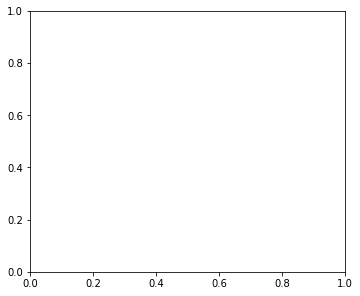

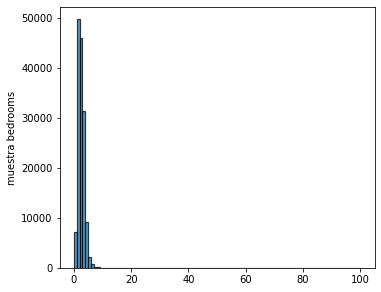

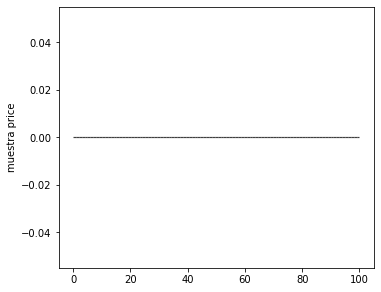

In [ ]:
from random import *

import matplotlib.pyplot as plot
import seaborn as sb


fig = plt.figure(figsize = (6.4*3,4.8))
fig.tight_layout()  ###esto hace que entre todo y no sobren espacios vacios
plt.subplot(1,3,3)


#SE HACE LA MUESTRA CON  data.sample() y se especifica el n= , y la columna si no es de todo general

muestra_bedrooms = data.loc[:,'bedrooms']
muestra_bedrooms.sample(n=1000)
ax1 = muestra_bedrooms
plt.figure(figsize = (6.4*3,4.8))
plt.subplot(1,3,1)
plt.hist(muestra_bedrooms, bins = np.linspace(0,100,101), alpha = 0.75, edgecolor='black', linewidth=1.2)
plt.ylabel('muestra bedrooms')

#SE HACE LA MUESTRA CON  data.sample() y se especifica el n= , y la columna si no es de todo general

muestra_price = data.loc[:,'price']
muestra_price.sample(n=1000)
ax2 = muestra_price
plt.figure(figsize = (6.4*3,4.8))
plt.subplot(1,3,2)
plt.hist(muestra_price, bins = np.linspace(0,100,100), alpha = 0.75, edgecolor='black', linewidth=1.2)
plt.ylabel('muestra price')

#SE HACE LA MUESTRA CON  data.sample() y se especifica el n= , y la columna si no es de todo general

muestra_supcub = data.loc[:,'sup_cub']
muestra_supcub.sample(n=1000)
ax3 = muestra_supcub
plt.figure(figsize = (6.4*3,4.8))
plt.subplot(1,1,1)
plt.hist(muestra_supcub, bins = np.linspace(0,100,100), alpha = 0.75, edgecolor='black', linewidth=1.2)
plt.ylabel('muestra sup_cub')

muestra_suptot = data.loc[:,'sup_tot']
ax4 = muestra_suptot
fig4,ax4=plt.subplots()
ax4.set_title('Histograma sup_tot')
muestra_suptot = data.loc[:,'sup_tot']
muestra_suptot.sample(n=1000)
plt.figure(figsize = (6.4*3,4.8))
plt.subplot(1,3,3)
plt.hist(muestra_suptot, bins = np.linspace(0,100,100), alpha = 0.75, edgecolor='black', linewidth=1.2)
plt.ylabel('muestra sup_tot')



#plt.subplot(1,3,2)
#plt.hist(muestras, bins = np.linspace(0,100,21), alpha = 0.75, edgecolor='black', linewidth=1.2)

#plt.subplot(1,3,3)
#plt.hist(muestras, bins = np.linspace(0,100,101), alpha = 0.75, edgecolor='black', linewidth=1.2)

#plt.tight_layout()

#plt.show()

# 1.4 Correlaciones 

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Según el mapa de correlaciones lo que se observa abajo, para la variable a predecir de `price`, se observa que la cantidad de habitaciones representadas como `rooms` va aumentando o disminuyendo de acuerdo a la zona de ubicación de la propiedad. El numero de baños `bathrooms`va aumentando o disminuyendo también de acuerdo a la cantidad de habitaciones `rooms`. 


A nivel general las variables mas representativas según este grafico serían las `bedrooms`, los `bathrooms`, y lo que deriva de estos que sería la `sup_tot` y la `sup_cub`, es decir la superficie total y cubierta.


### Correlaciones genenerales

In [ ]:
data2 = data.loc[:,['rooms','bedrooms','bathrooms', 'sup_tot','sup_cub', 'price', 'tipo']]

In [ ]:
data2.head()

rooms  bedrooms  bathrooms  sup_tot  sup_cub     price          tipo
0    7.0       7.0        2.0    140.0    140.0  153000.0  Departamento
1    2.0       1.0        2.0     70.0     58.0  159000.0            PH
2    2.0       1.0        1.0     45.0     45.0  125000.0            PH
3    2.0       1.0        1.0     85.0     50.0  295000.0            PH
4    2.0       1.0        1.0     50.0     35.0   40000.0            PH

In [ ]:
data2.corr()

rooms  bedrooms  bathrooms   sup_tot   sup_cub     price
rooms      1.000000  0.869769   0.613308  0.081044  0.075012  0.351025
bedrooms   0.869769  1.000000   0.588527  0.079229  0.072627  0.316192
bathrooms  0.613308  0.588527   1.000000  0.061159  0.069361  0.556861
sup_tot    0.081044  0.079229   0.061159  1.000000  0.430887  0.038727
sup_cub    0.075012  0.072627   0.069361  0.430887  1.000000  0.049136
price      0.351025  0.316192   0.556861  0.038727  0.049136  1.000000

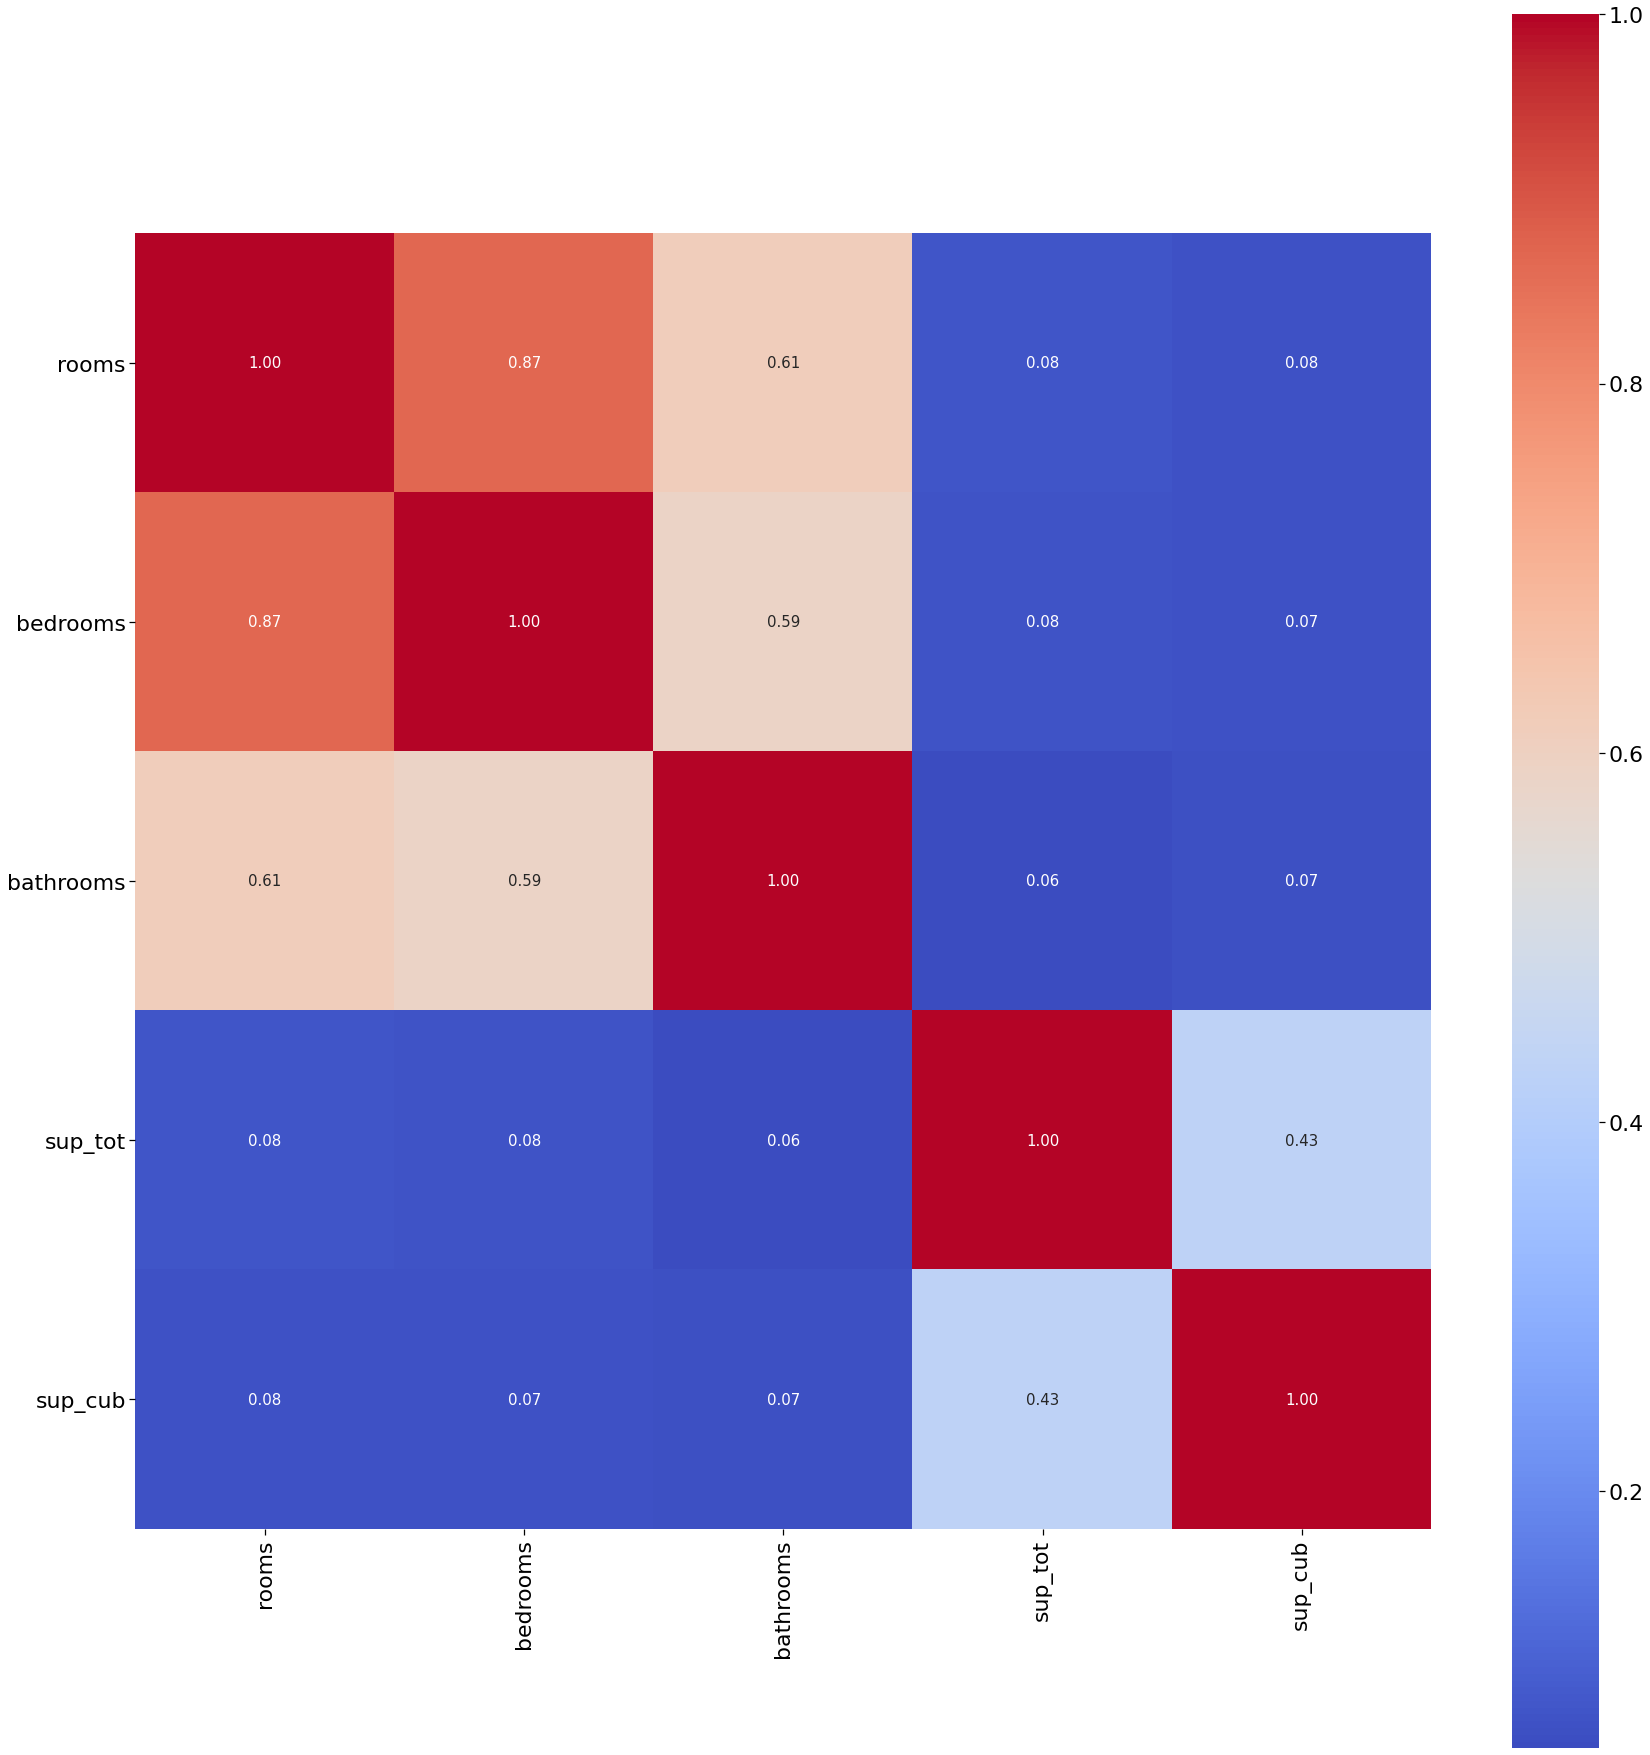

In [ ]:
corr = data2.drop(columns = 'price').corr()
plt.figure(figsize=(25,25))
sea.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data2.drop(columns = 'price').columns, 
           yticklabels= data2.drop(columns = 'price').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.tight_layout()
plt.show()

### Correlaciones según tipo de propiedad

In [ ]:
gc.collect()

### Correlaciones según tipo: Departamento

In [ ]:
data2 = data.loc[:,['rooms','bedrooms','bathrooms', 'sup_tot','sup_cub', 'price', 'tipo']]
data2


rooms  bedrooms  bathrooms  sup_tot  sup_cub     price          tipo
0         7.0       7.0        2.0    140.0    140.0  153000.0  Departamento
1         2.0       1.0        2.0     70.0     58.0  159000.0            PH
2         2.0       1.0        1.0     45.0     45.0  125000.0            PH
3         2.0       1.0        1.0     85.0     50.0  295000.0            PH
4         2.0       1.0        1.0     50.0     35.0   40000.0            PH
...       ...       ...        ...      ...      ...       ...           ...
146655    2.0       1.0        1.0     54.0     48.0  165000.0  Departamento
146656    4.0       3.0        2.0    164.0     90.0  130000.0  Departamento
146657    1.0       1.0        1.0     50.0     35.0   73000.0  Departamento
146658    2.0       1.0        1.0     38.0     38.0   68000.0  Departamento
146659    3.0       2.0        1.0     75.0     75.0   98000.0  Departamento

[146660 rows x 7 columns]

In [ ]:
gc.collect()

372

In [ ]:
df = pd.DataFrame(data= data2) ##se convierte a dataframe sino queda como un array bool
data_depto = df.loc[df['tipo'] == 'Departamento']
data_depto.head()

rooms  bedrooms  bathrooms  sup_tot  sup_cub     price          tipo
0     7.0       7.0        2.0    140.0    140.0  153000.0  Departamento
11    2.0       1.0        1.0     68.0     59.0  149000.0  Departamento
12    2.0       1.0        1.0     50.0     44.0  115000.0  Departamento
13    1.0       1.0        1.0     50.0     35.0   45000.0  Departamento
14    1.0       1.0        1.0     32.0     32.0   35000.0  Departamento

In [ ]:
data_depto = data_depto.loc[:,['rooms', 'bedrooms', 'bathrooms', 'sup_tot', 'sup_cub', 'price']]

#volvemos a sacar la columna de tipo para que se visualice correctamente el heatmap

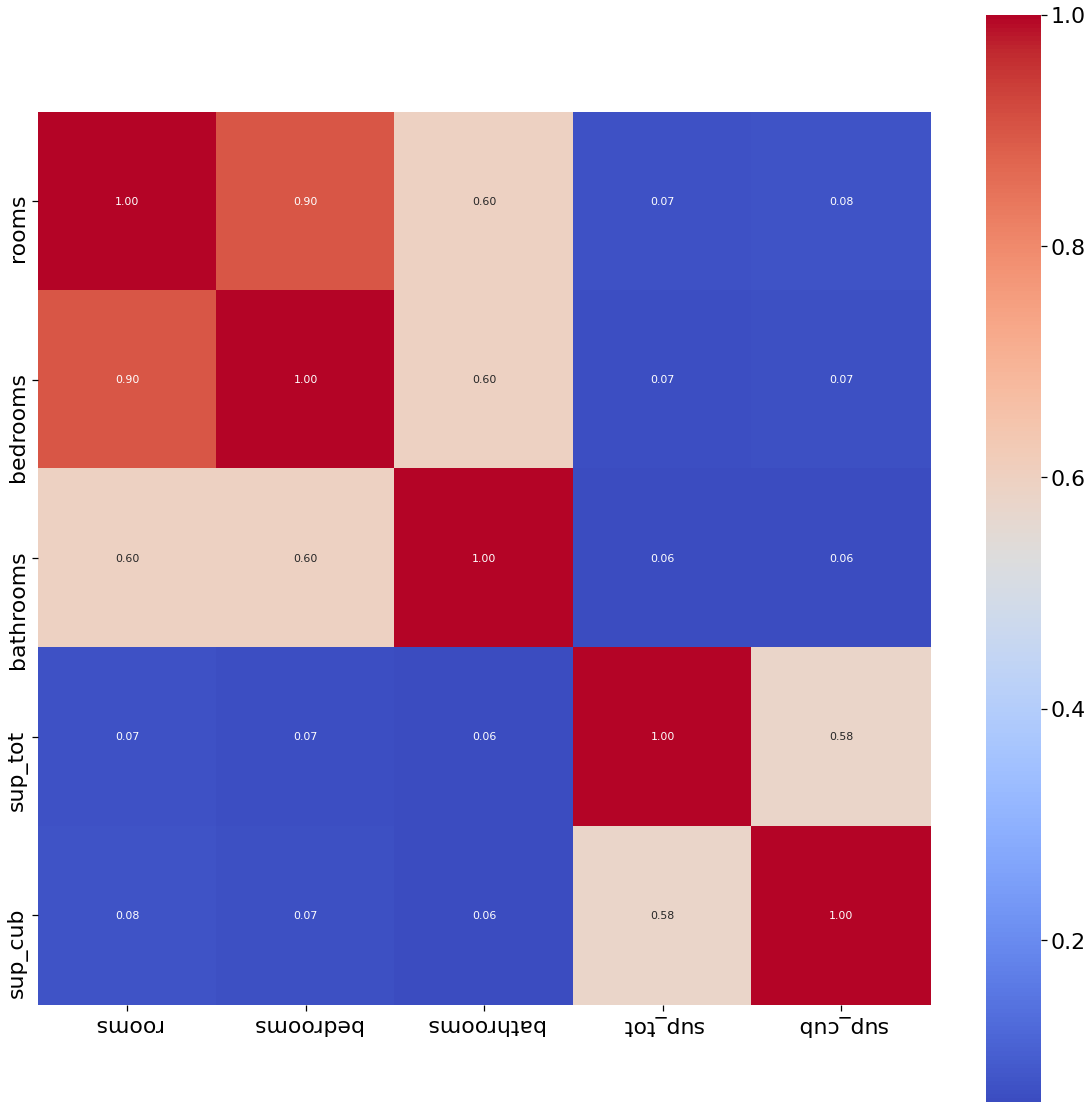

In [ ]:
corr = data_depto.drop(columns = 'price').corr()
plt.figure(figsize=(20,20))
sea.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 11},
           xticklabels= data_depto.drop(columns = 'price').columns, 
           yticklabels= data_depto.drop(columns = 'price').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 180)
plt.yticks(rotation = 90)
plt.show()

Concluciones: Para el caso de los `Departamentos`, se observa que 

### Correlaciones según tipo: PH

In [ ]:
df = pd.DataFrame(data= data2) ##se convierte a dataframe sino queda como un array bool
data_ph = df.loc[df['tipo'] == 'PH']
data_ph.head()



rooms  bedrooms  bathrooms  sup_tot  sup_cub     price tipo
1    2.0       1.0        2.0     70.0     58.0  159000.0   PH
2    2.0       1.0        1.0     45.0     45.0  125000.0   PH
3    2.0       1.0        1.0     85.0     50.0  295000.0   PH
4    2.0       1.0        1.0     50.0     35.0   40000.0   PH
5    2.0       1.0        1.0     56.0     56.0  150000.0   PH

In [ ]:
data_ph = data_ph.loc[:,['rooms', 'bedrooms', 'bathrooms', 'sup_tot', 'sup_cub', 'price']]

#volvemos a sacar la columna de tipo para que se visualice correctamente el heatmap 

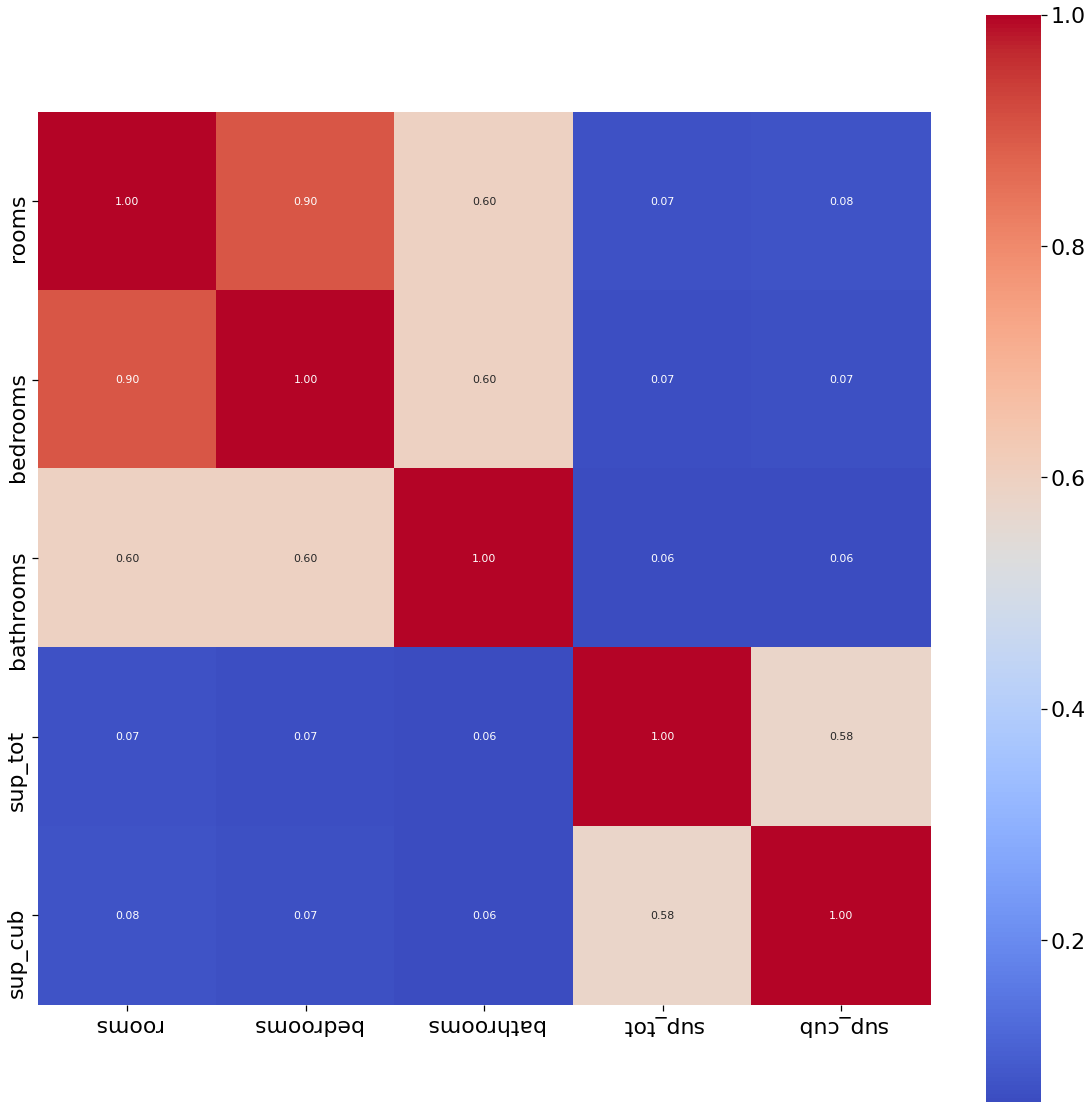

In [ ]:
corr = data_ph.drop(columns = 'price').corr()
plt.figure(figsize=(20,20))
sea.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 11},
           xticklabels= data_ph.drop(columns = 'price').columns, 
           yticklabels= data_ph.drop(columns = 'price').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 180)
plt.yticks(rotation = 90)
plt.show()

Conclusiones:

### Correlaciones según tipo: Casa


In [ ]:
df = pd.DataFrame(data= data2) ##se convierte a dataframe sino queda como un array bool
data_casa = df.loc[df['tipo'] == 'Casa']
data_casa.head()


rooms  bedrooms  bathrooms  sup_tot  sup_cub     price  tipo
137    3.0       2.0        2.0     89.0     79.0  219000.0  Casa
138    3.0       2.0        1.0    292.0     90.0  110000.0  Casa
252    7.0       3.0        2.0    325.0    325.0  120000.0  Casa
253    7.0       3.0        3.0   1023.0    360.0  650000.0  Casa
254    6.0       3.0        3.0   1000.0    190.0  370000.0  Casa

In [ ]:
data_casa = data_casa.loc[:,['rooms', 'bedrooms', 'bathrooms', 'sup_tot', 'sup_cub', 'price']]

#volvemos a sacar la columna de tipo para que se visualice correctamente el heatmap

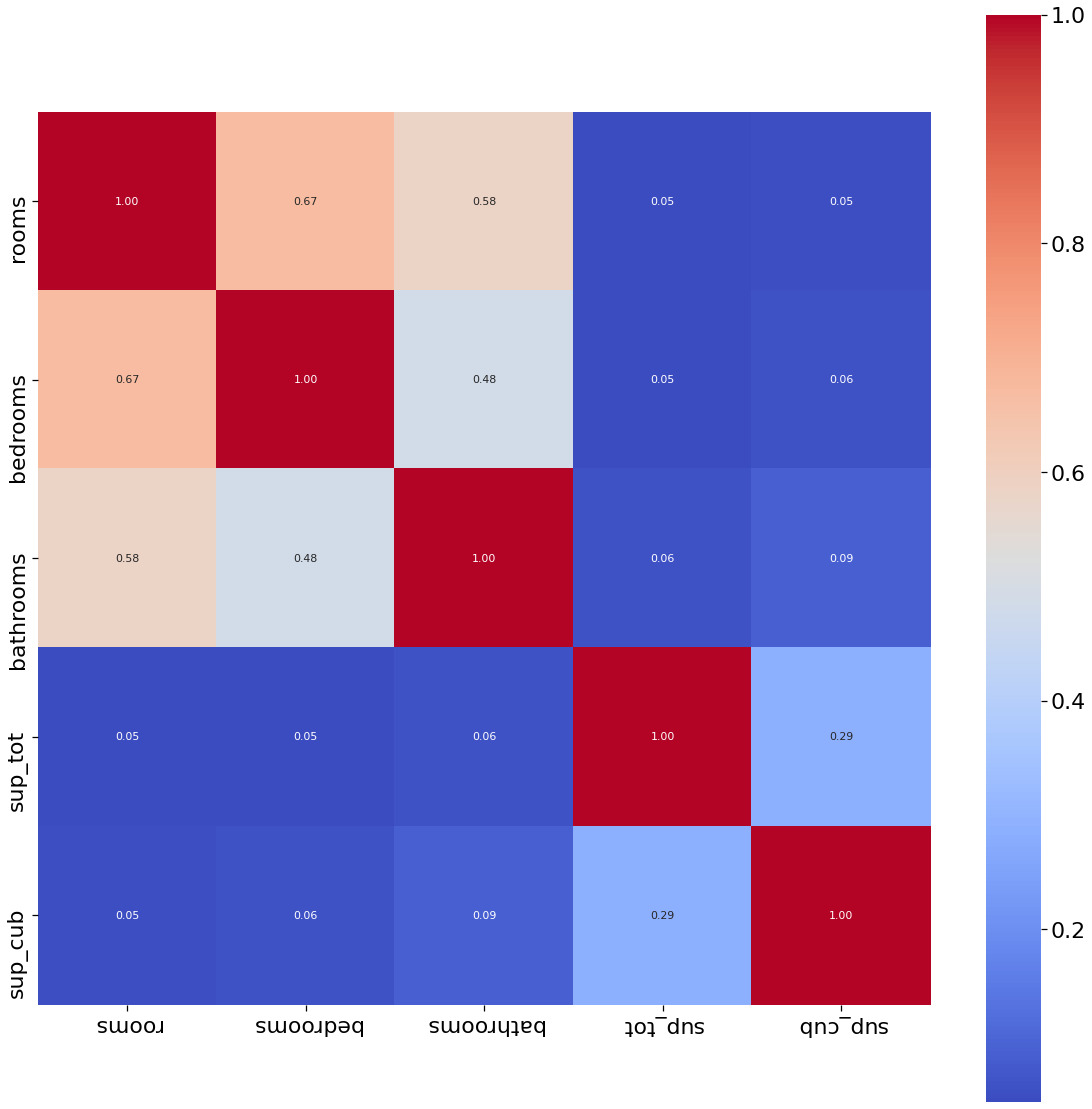

In [ ]:
corr = data_casa.drop(columns = 'price').corr()
plt.figure(figsize=(20,20))
sea.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 11},
           xticklabels= data_casa.drop(columns = 'price').columns, 
           yticklabels= data_casa.drop(columns = 'price').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 180)
plt.yticks(rotation = 90)
plt.show()

Conclusiones: 

# 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


# 3.1 Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

Seleccionamos las propiedas que cumplan la condición de ser un Departamento, Casa o PH y que se encuentre en Capital Federal. Las guardamos en la selección que usaremos para el modelo: `data_modelo`.

In [ ]:
import pandas as pd
data_modelo = data[data.tipo.isin(['Departamento', 'Casa', 'PH']) & data.zona.isin(['Capital Federal'])]


Seleccionamos aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
Aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2, y donde su precio es menor a 4000000 dólares. Y seleccionamos los features (X) que vamos a utilizar para predecir: `rooms`, `bedrooms`, `bathrooms`, `surface_covered`, `surface_total`, y la variable a predecir (y): `price`.


In [ ]:
data_modelo[data.tipo.isin(['Departamento', 'Casa', 'PH']) & data.zona.isin(['Capital Federal'])]
data_modelo.price = data_modelo.price.astype(int)
data_modelo.sup_tot = data_modelo.sup_tot #.astype(int)
data_modelo.sup_cub = data_modelo.sup_cub #.astype(int)
data_modelo[data.price > 4000000]
data_modelo[(data.sup_tot > 15) & (data.sup_tot < 1000)]
inplace= True
data_modelo.shape
data_modelo.head()
data_modelo.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(91485, 13)

In [ ]:
data_modelo.drop(columns= ['tipo', 'barrio','zona', 'lat', 'lon', 'title', 'description'],inplace=True)
data_modelo.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


rooms  bedrooms  bathrooms  sup_tot  sup_cub   price
0    7.0       7.0        2.0    140.0    140.0  153000
1    2.0       1.0        2.0     70.0     58.0  159000
2    2.0       1.0        1.0     45.0     45.0  125000
3    2.0       1.0        1.0     85.0     50.0  295000
5    2.0       1.0        1.0     56.0     56.0  150000

In [ ]:
data_modelo.shape

(91485, 6)

Eliminamos los valores nulos:

In [ ]:
data_modelo.isna().sum()

rooms           0
bedrooms        0
bathrooms    2171
sup_tot      8917
sup_cub      9235
price           0
dtype: int64

In [ ]:
data_modelo.dropna()
data_modelo = data_modelo.dropna()
data_modelo.shape

(81210, 6)

In [ ]:
data_modelo.head()

rooms  bedrooms  bathrooms  sup_tot  sup_cub   price
0    7.0       7.0        2.0    140.0    140.0  153000
1    2.0       1.0        2.0     70.0     58.0  159000
2    2.0       1.0        1.0     45.0     45.0  125000
3    2.0       1.0        1.0     85.0     50.0  295000
5    2.0       1.0        1.0     56.0     56.0  150000

Verificamos que no queden valores nulos con el siguiente gráfico:

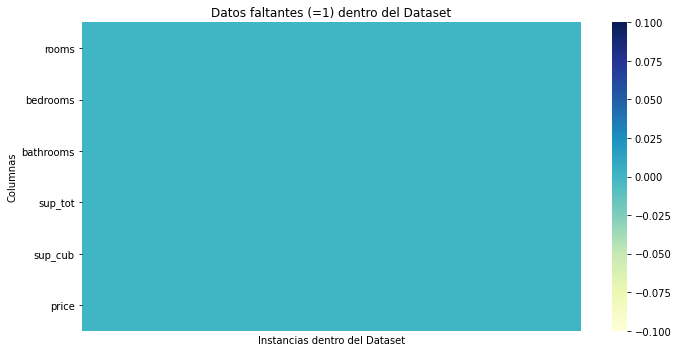

In [ ]:
import seaborn as sns

datos_nulos_modelo = data_modelo.isnull()
fig, axs = plt.subplots(1, figsize=(10, 5))
heat = sns.heatmap(datos_nulos_modelo.T, cmap="YlGnBu",xticklabels=False)
plt.title("Datos faltantes (=1) dentro del Dataset")
plt.xlabel("Instancias dentro del Dataset")
plt.ylabel("Columnas")
plt.tight_layout()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

## 3.1.1 Modelo Arboles de desición

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix
#from sklearn.metrics import predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
## agregamos la columna nueva de target
import pandas as pd
import numpy as np 


#data_modelo.insert(6, "target", np.zeros) ## el 6 indica la posición en las columnas, para agregarlo al ultimo en este caso. Se cuenta desde el 0.
data_modelo.head()

rooms  bedrooms  bathrooms  sup_tot  sup_cub   price
0    7.0       7.0        2.0    140.0    140.0  153000
1    2.0       1.0        2.0     70.0     58.0  159000
2    2.0       1.0        1.0     45.0     45.0  125000
3    2.0       1.0        1.0     85.0     50.0  295000
5    2.0       1.0        1.0     56.0     56.0  150000

In [ ]:
##AGREGAMOS UNA COLUMNA TARGET CON NULOS Y LOS REEMPLAZAMOS CON UN VALOR 0
data_modelo.insert(6, "target", np.nan) ## el 6 indica la posición en las columnas, para agregarlo al ultimo en este caso. Se cuenta desde el 0.
data_modelo.head()

rooms  bedrooms  bathrooms  sup_tot  sup_cub   price  target
0    7.0       7.0        2.0    140.0    140.0  153000     NaN
1    2.0       1.0        2.0     70.0     58.0  159000     NaN
2    2.0       1.0        1.0     45.0     45.0  125000     NaN
3    2.0       1.0        1.0     85.0     50.0  295000     NaN
5    2.0       1.0        1.0     56.0     56.0  150000     NaN

In [ ]:
#reemplazamos los nulos con 0 para la columna de target
df = pd.DataFrame(data_modelo)
nan_replaced = df.replace(np.nan,0)
print(nan_replaced)


        rooms  bedrooms  bathrooms  sup_tot  sup_cub    price  target
0         7.0       7.0        2.0    140.0    140.0   153000     0.0
1         2.0       1.0        2.0     70.0     58.0   159000     0.0
2         2.0       1.0        1.0     45.0     45.0   125000     0.0
3         2.0       1.0        1.0     85.0     50.0   295000     0.0
5         2.0       1.0        1.0     56.0     56.0   150000     0.0
...       ...       ...        ...      ...      ...      ...     ...
146554    4.0       3.0        3.0    175.0    111.0   570000     0.0
146555    3.0       2.0        2.0    144.0    134.0   480000     0.0
146556    4.0       2.0        2.0    317.0    143.0   530000     0.0
146557    3.0       2.0        2.0    145.0    145.0   420000     0.0
146558    4.0       3.0        5.0    220.0    210.0  1470000     0.0

[81210 rows x 7 columns]


In [ ]:
data_modelo = nan_replaced 
data_modelo

rooms  bedrooms  bathrooms  sup_tot  sup_cub    price  target
0         7.0       7.0        2.0    140.0    140.0   153000     0.0
1         2.0       1.0        2.0     70.0     58.0   159000     0.0
2         2.0       1.0        1.0     45.0     45.0   125000     0.0
3         2.0       1.0        1.0     85.0     50.0   295000     0.0
5         2.0       1.0        1.0     56.0     56.0   150000     0.0
...       ...       ...        ...      ...      ...      ...     ...
146554    4.0       3.0        3.0    175.0    111.0   570000     0.0
146555    3.0       2.0        2.0    144.0    134.0   480000     0.0
146556    4.0       2.0        2.0    317.0    143.0   530000     0.0
146557    3.0       2.0        2.0    145.0    145.0   420000     0.0
146558    4.0       3.0        5.0    220.0    210.0  1470000     0.0

[81210 rows x 7 columns]

In [ ]:
#convertimos el dataframe a un array
df=data_modelo.to_numpy()
df

array([[7.00e+00, 7.00e+00, 2.00e+00, ..., 1.40e+02, 1.53e+05, 0.00e+00],
       [2.00e+00, 1.00e+00, 2.00e+00, ..., 5.80e+01, 1.59e+05, 0.00e+00],
       [2.00e+00, 1.00e+00, 1.00e+00, ..., 4.50e+01, 1.25e+05, 0.00e+00],
       ...,
       [4.00e+00, 2.00e+00, 2.00e+00, ..., 1.43e+02, 5.30e+05, 0.00e+00],
       [3.00e+00, 2.00e+00, 2.00e+00, ..., 1.45e+02, 4.20e+05, 0.00e+00],
       [4.00e+00, 3.00e+00, 5.00e+00, ..., 2.10e+02, 1.47e+06, 0.00e+00]])

In [ ]:
#verificamos que este la columna target y los valores 
data_modelo.keys()

Index(['rooms', 'bedrooms', 'bathrooms', 'sup_tot', 'sup_cub', 'price',
       'target'],
      dtype='object')

In [ ]:
data_modelo 

rooms  bedrooms  bathrooms  sup_tot  sup_cub    price  target
0         7.0       7.0        2.0    140.0    140.0   153000     0.0
1         2.0       1.0        2.0     70.0     58.0   159000     0.0
2         2.0       1.0        1.0     45.0     45.0   125000     0.0
3         2.0       1.0        1.0     85.0     50.0   295000     0.0
5         2.0       1.0        1.0     56.0     56.0   150000     0.0
...       ...       ...        ...      ...      ...      ...     ...
146554    4.0       3.0        3.0    175.0    111.0   570000     0.0
146555    3.0       2.0        2.0    144.0    134.0   480000     0.0
146556    4.0       2.0        2.0    317.0    143.0   530000     0.0
146557    3.0       2.0        2.0    145.0    145.0   420000     0.0
146558    4.0       3.0        5.0    220.0    210.0  1470000     0.0

[81210 rows x 7 columns]

In [ ]:
#np.c_[data['data'], target['target']]

In [ ]:
data_modelo['price']

0          153000
1          159000
2          125000
3          295000
5          150000
           ...   
146554     570000
146555     480000
146556     530000
146557     420000
146558    1470000
Name: price, Length: 81210, dtype: int64

In [ ]:
##definimos una instancia a predecir antes de eliminar la columna de 'price'
#vamos a usar los 5 primeros valores

print(data_modelo['price'][0])

153000


In [ ]:
print(data_modelo['price'][2])


125000


In [ ]:
#0          153000
#1          159000
#2          125000
#3          295000
#5          150000

In [ ]:
data_modelo['target']

0         0.0
1         0.0
2         0.0
3         0.0
5         0.0
         ... 
146554    0.0
146555    0.0
146556    0.0
146557    0.0
146558    0.0
Name: target, Length: 81210, dtype: float64

In [ ]:
#data_modelo.values()

TypeError: ignored

In [ ]:
dataset = data_modelo

# Importamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Extraemos los atributos (X) y los valores objetivo (Y)
X = dataset['rooms'].reshape(-1,1)
Y = dataset['target']

# Entrenamos el modelo
lin_reg.fit(X, Y)

AttributeError: ignored

In [ ]:
X = data_modelo[['bathrooms','rooms']]
#X = data_modelo.drop("price", axis=1)
y = data_modelo.price

In [ ]:
X = data_modelo[['bedrooms', 'sup_tot', 'sup_cub', 'rooms', 'bathrooms']] ##seleccionamos los features
Y = data_modelo.target ##se selecciona la varible a predecir (y)

#X.head()
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
5    0.0
Name: target, dtype: float64

In [ ]:
#seleccionamos 2 de los features para predecir
y_real = data_modelo.price
y_predicted = data_modelo.target


# Mostramos la predicción para un ejemplo del dataset
print(lin_reg.predict([X[10]]))
# Mostramos el valor real que tiene el inmueble en nuestro dataset
print(Y[10])

NotFittedError: ignored

In [ ]:
#definimos las x
x1 = data_modelo['rooms']
x2 = data_modelo['bedrooms']

In [ ]:
#convertimos el dataframe a un array


array([[7., 7.],
       [2., 1.],
       [2., 1.],
       ...,
       [4., 2.],
       [3., 2.],
       [4., 3.]])

In [ ]:
df=data_modelo.to_numpy()
df

array([[7.00e+00, 7.00e+00, 2.00e+00, ..., 1.40e+02, 1.53e+05, 0.00e+00],
       [2.00e+00, 1.00e+00, 2.00e+00, ..., 5.80e+01, 1.59e+05, 0.00e+00],
       [2.00e+00, 1.00e+00, 1.00e+00, ..., 4.50e+01, 1.25e+05, 0.00e+00],
       ...,
       [4.00e+00, 2.00e+00, 2.00e+00, ..., 1.43e+02, 5.30e+05, 0.00e+00],
       [3.00e+00, 2.00e+00, 2.00e+00, ..., 1.45e+02, 4.20e+05, 0.00e+00],
       [4.00e+00, 3.00e+00, 5.00e+00, ..., 2.10e+02, 1.47e+06, 0.00e+00]])

In [ ]:
from sklearn.model_selection import train_test_split


X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

AttributeError: ignored

In [ ]:
##separamos en train y test
X = np.vstack((x1,x2)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56847, 2) (56847,) (24363, 2) (24363,)


In [ ]:
X

array([[7., 7.],
       [2., 1.],
       [2., 1.],
       ...,
       [4., 2.],
       [3., 2.],
       [4., 3.]])

In [ ]:
#definimos los modelos para regresión
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [ ]:
 tree_regressor.fit(X, Y)

def accuracy(y_predicted, y_real):
    mask = np.array(y_predicted) == np.array(y_real)
    return mask.sum()/len(y_real)

In [ ]:
#ENTRENAMOS LOS MODELOS

linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# Mostramos la predicción para un ejemplo del dataset
print(linear_model.predict([X[1]]))
# Mostramos el valor real que tiene el inmueble en nuestro dataset
print(Y[1])

[155099.44006861]
0.0


In [ ]:
# Mostramos la predicción para un ejemplo del dataset
print(linear_model.predict([X[2]]))
# Mostramos el valor real que tiene el inmueble en nuestro dataset
print(Y[2])

[155099.44006861]
0.0


In [ ]:
print(linear_model.coef_, linear_model.intercept_)

[121183.70825513 -11588.60863504] -75679.36780661682


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
preds = lin_reg.predict(X)

# Calculamos el error medio entre las predicciones del modelo con los valores reales
mse = mean_squared_error(Y, preds)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

NotFittedError: ignored

In [ ]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

NameError: ignored

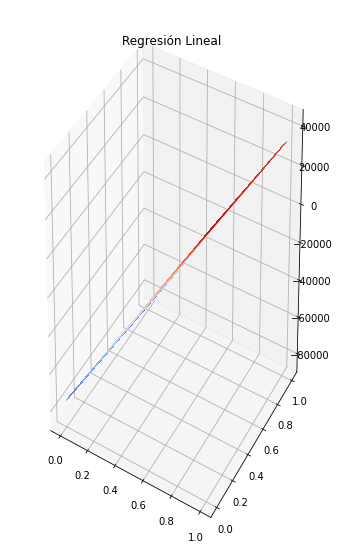

In [ ]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)


Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 310233.8108878818
Raíz del error cuadrático medio en Test: 273524.4806925388


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


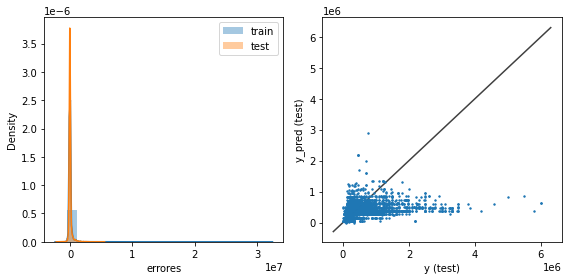

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 306792.3159061164
Raíz del error cuadrático medio en Test: 268438.52655829926


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


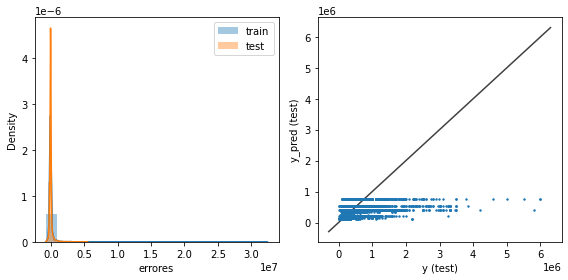

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 318288.73772989685
Raíz del error cuadrático medio en Test: 280503.4100758295


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


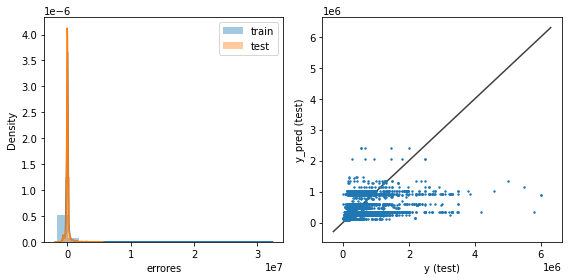

In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

ValueError: ignored

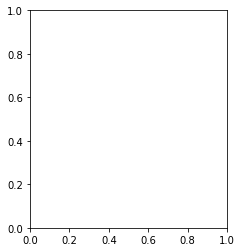

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show

In [ ]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
print(linear_model.coef_, linear_model.intercept_)

[0. 0.] 0.0


In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn_regressor.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

ValueError: ignored

In [ ]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Exactitud')

ValueError: ignored

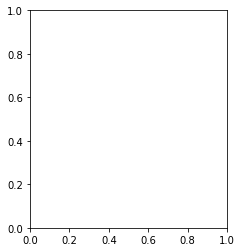

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X,Y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X,Y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X,Y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

## 3.1.2 Modelo KNN